Igor Stančin, igor.stancin@fer.hr

# Vizualizacija podataka  
  
U sklopu treće laboratorijske vježbe upoznat ćemo vas s dvije biblioteke za vizualizaciju podataka - matplotlib i seaborn. Koristit ćemo skup podataka koji smo kreirali u sklopu druge laboratorijske vježbe, dakle Titanic s novim značajkama koje smo stvorili.

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
X = pd.read_csv('our_titanic.csv')

In [53]:
X.columns.values

array(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'AgeBand',
       'Age*Pclass', 'FamilySize', 'IsAlone'], dtype=object)

# Matplotlib.pyplot
U nastavku ćemo vas upoznati s glavnim grafovima i funkcionalnostima biblioteke matplotlib.pyplot.

### Histogram
Dokumentacija: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

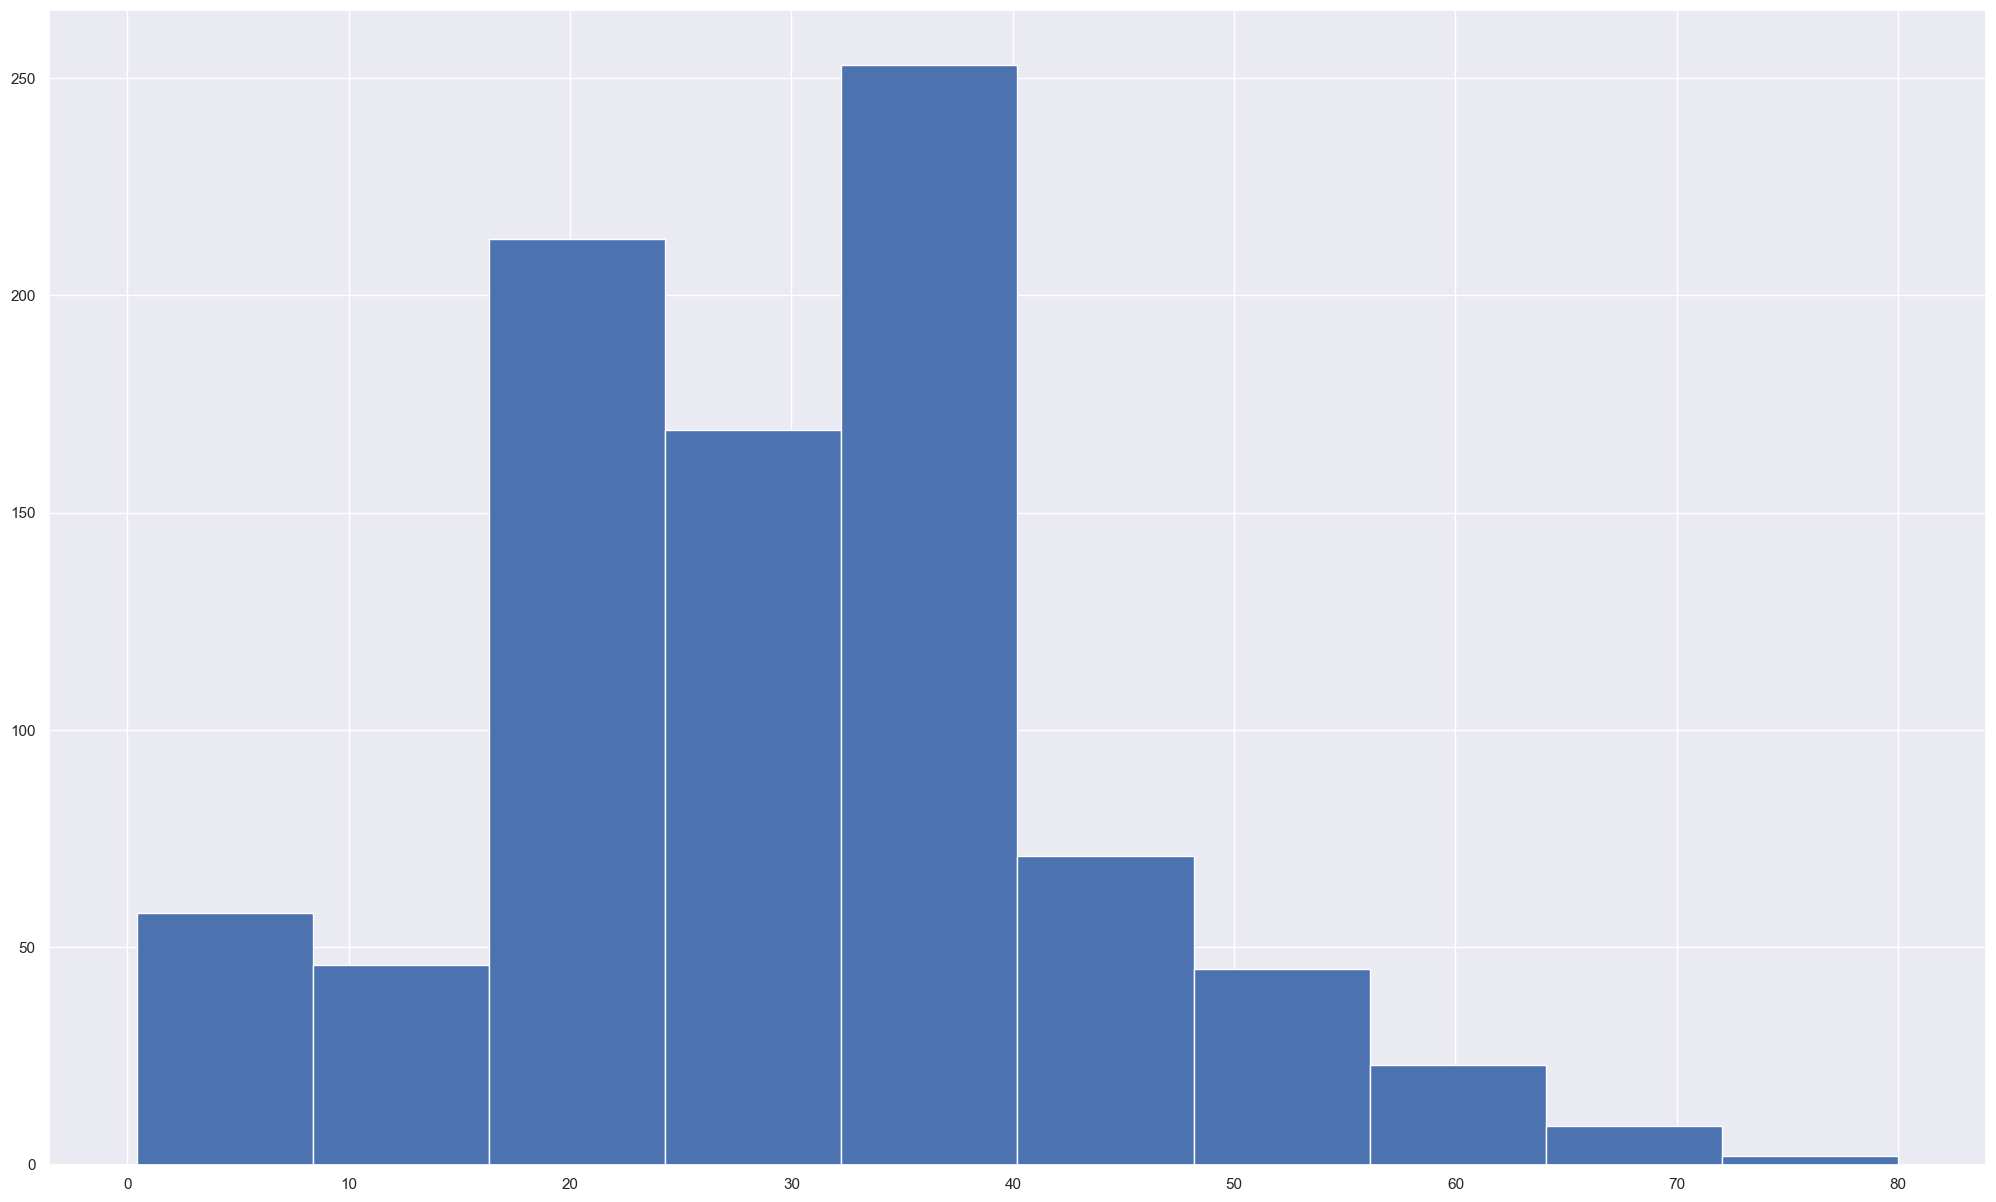

In [54]:
plt.hist(X.Age)
plt.show()

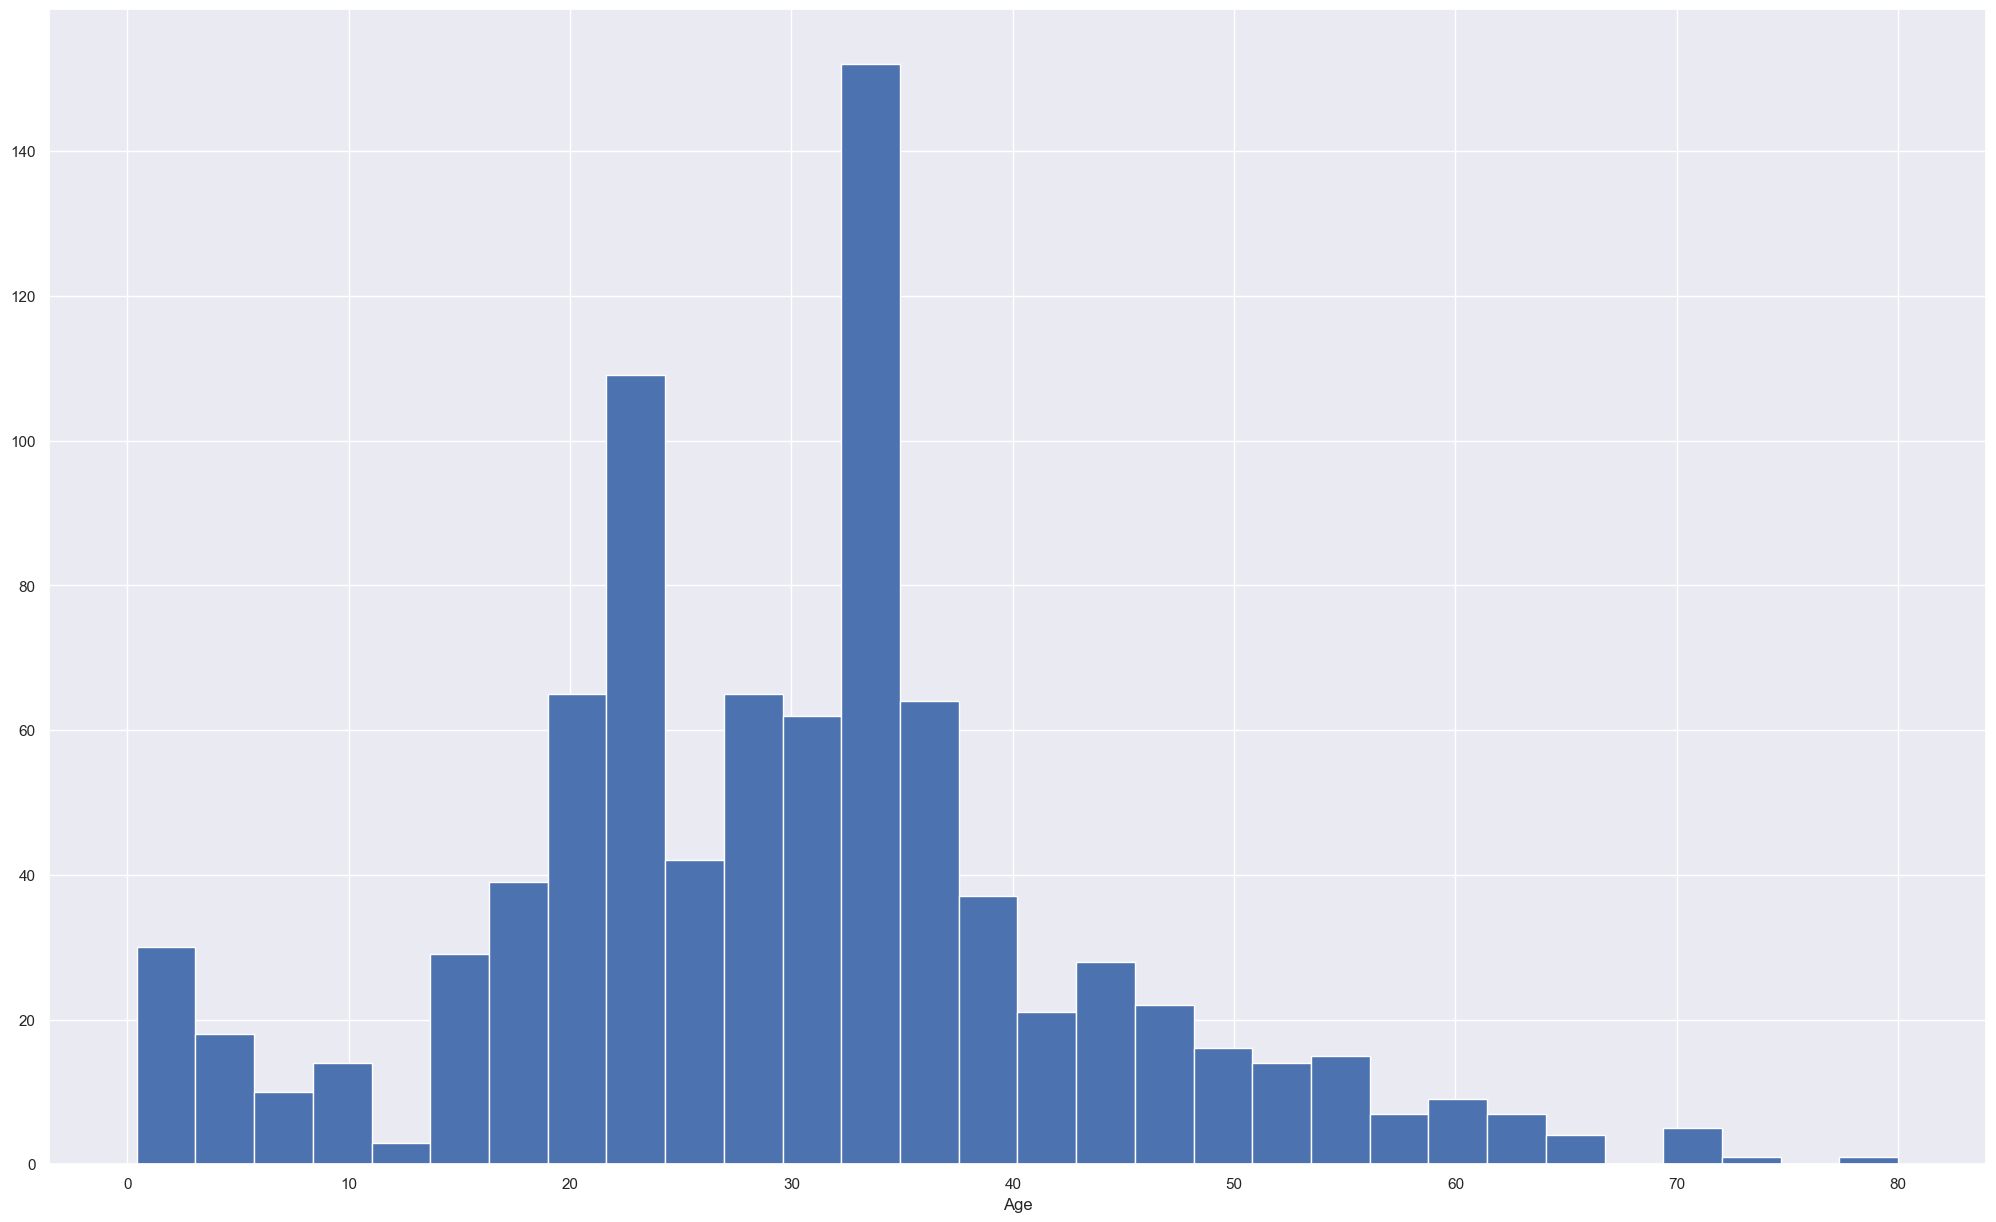

In [55]:
plt.hist(X.Age, bins=30)
plt.xlabel('Age')
plt.show()

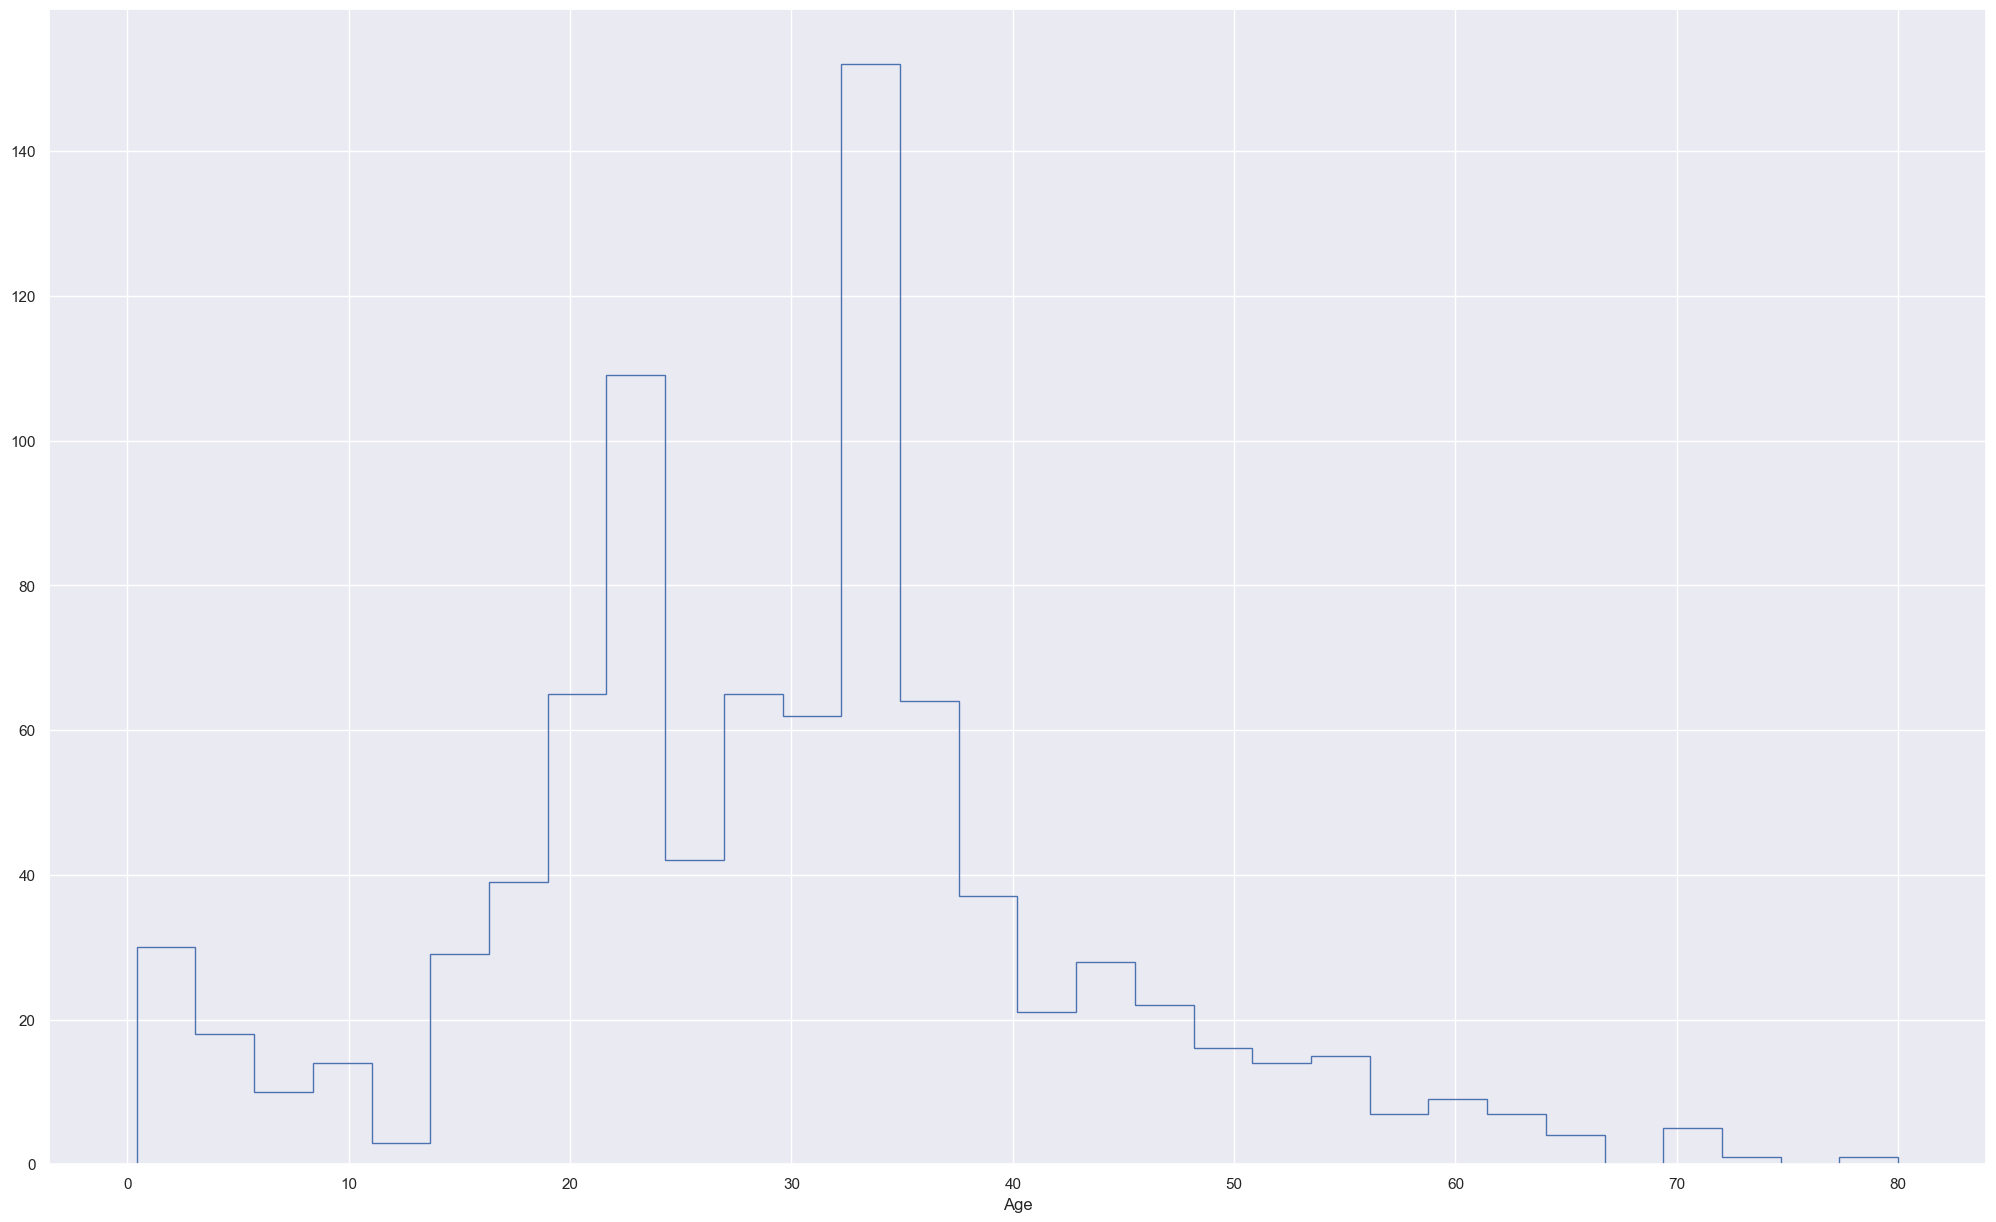

In [56]:
plt.hist(X.Age, bins=30, histtype='step')
plt.xlabel('Age')
plt.show()

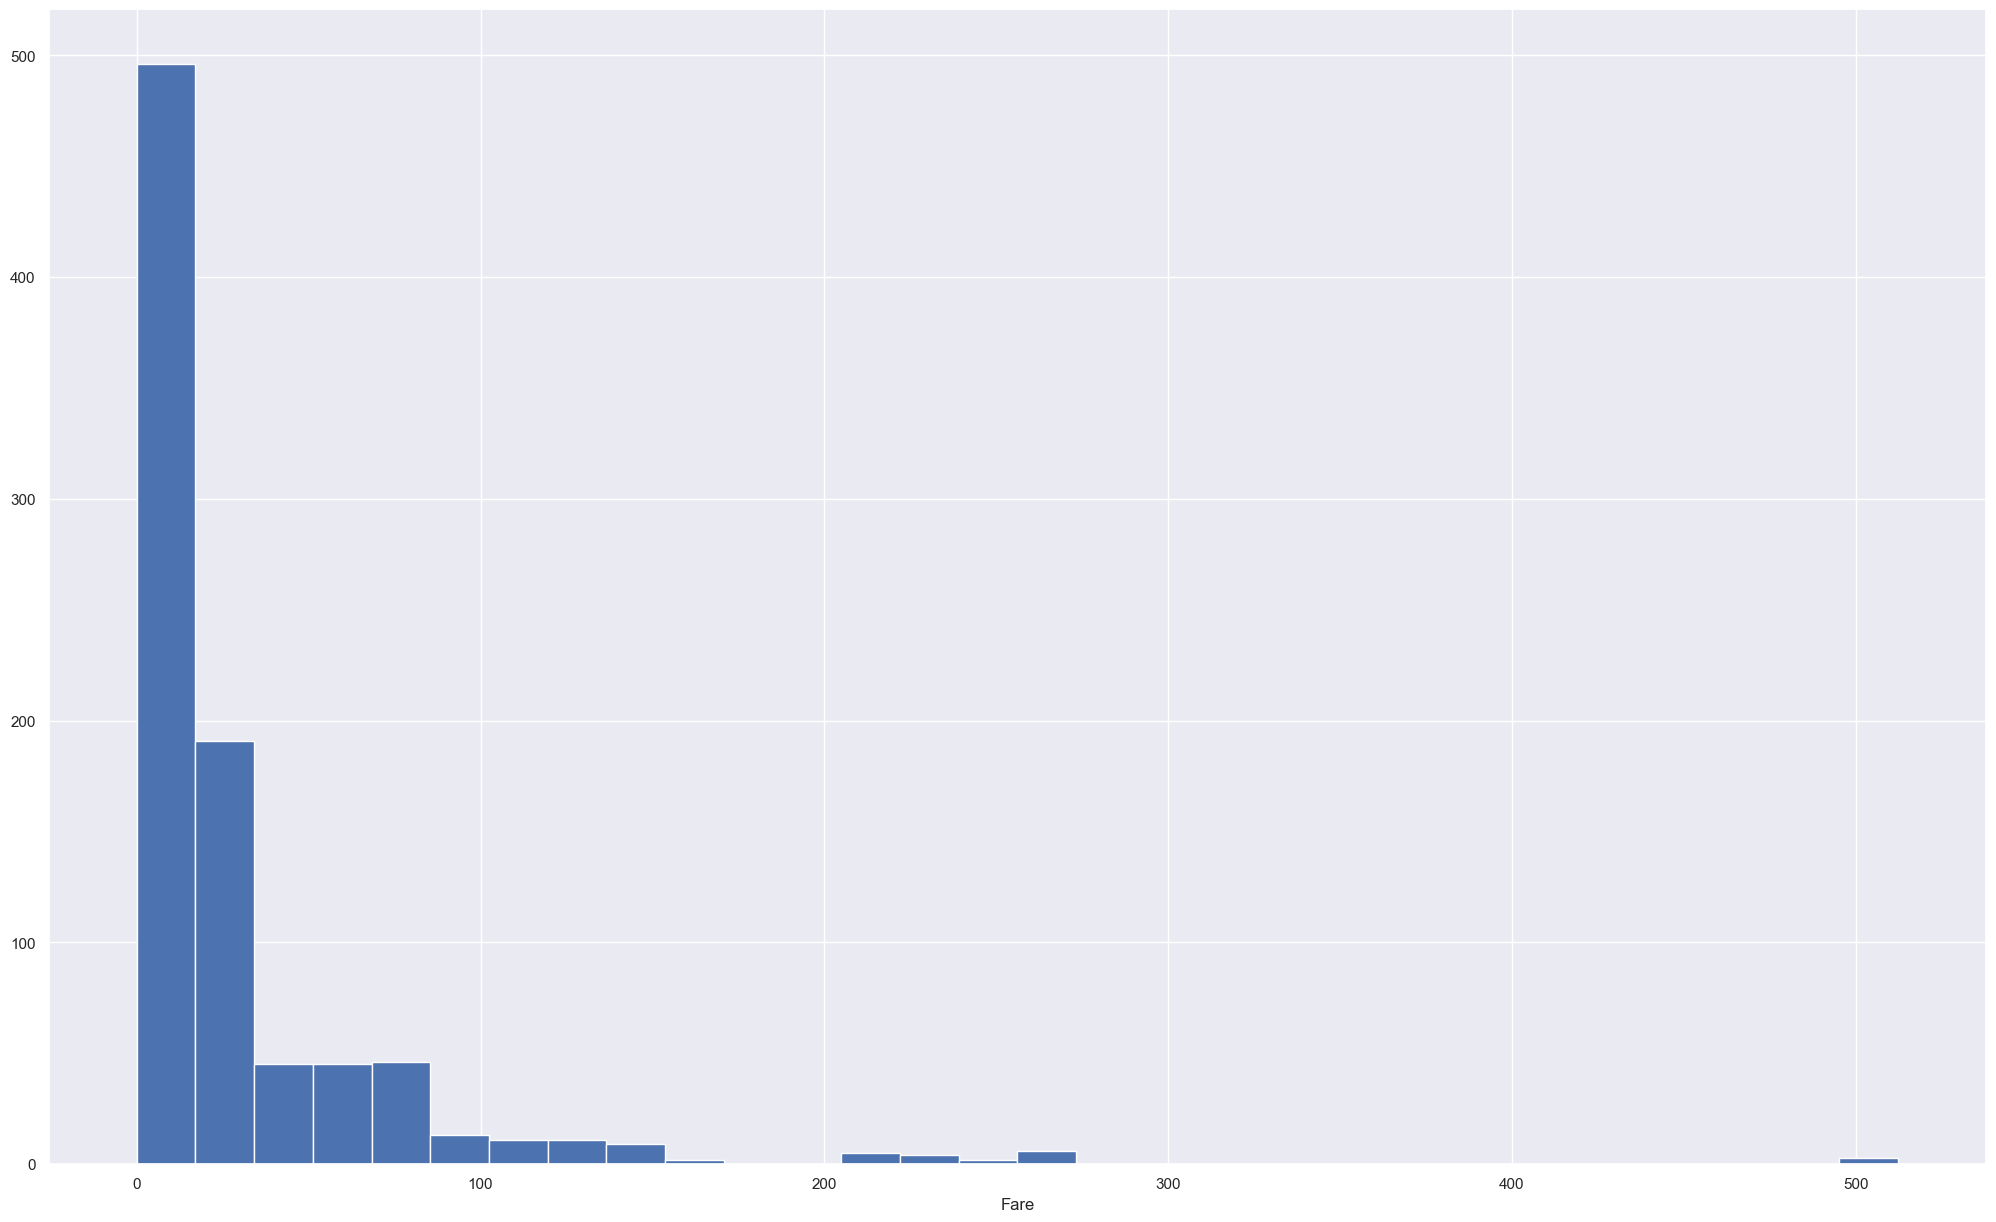

In [57]:
plt.hist(X.Fare, bins=30)
plt.xlabel('Fare')
plt.show()

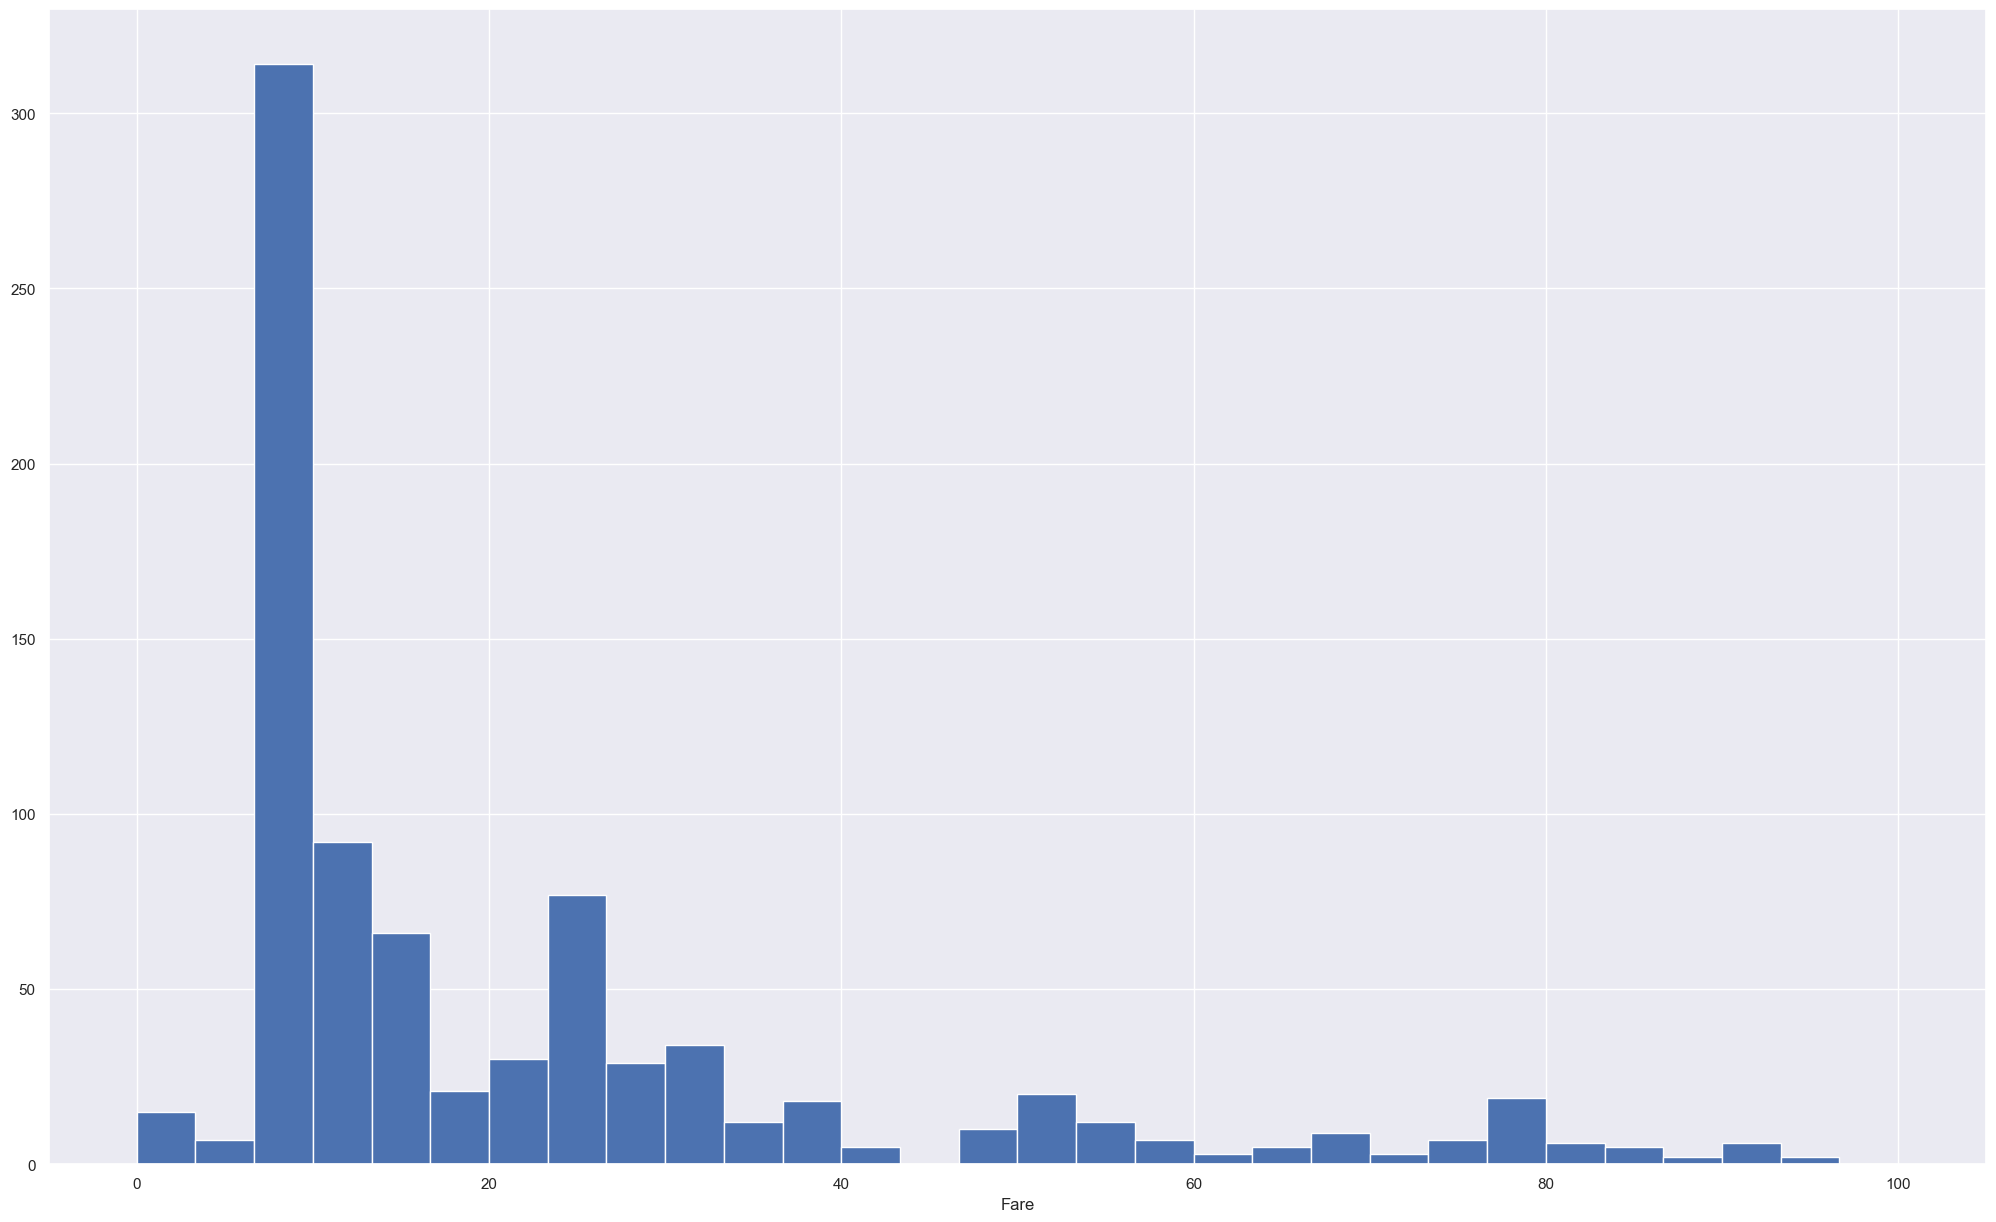

In [58]:
plt.hist(X.Fare, bins=30, range=(0,100))
plt.xlabel('Fare')
plt.show()

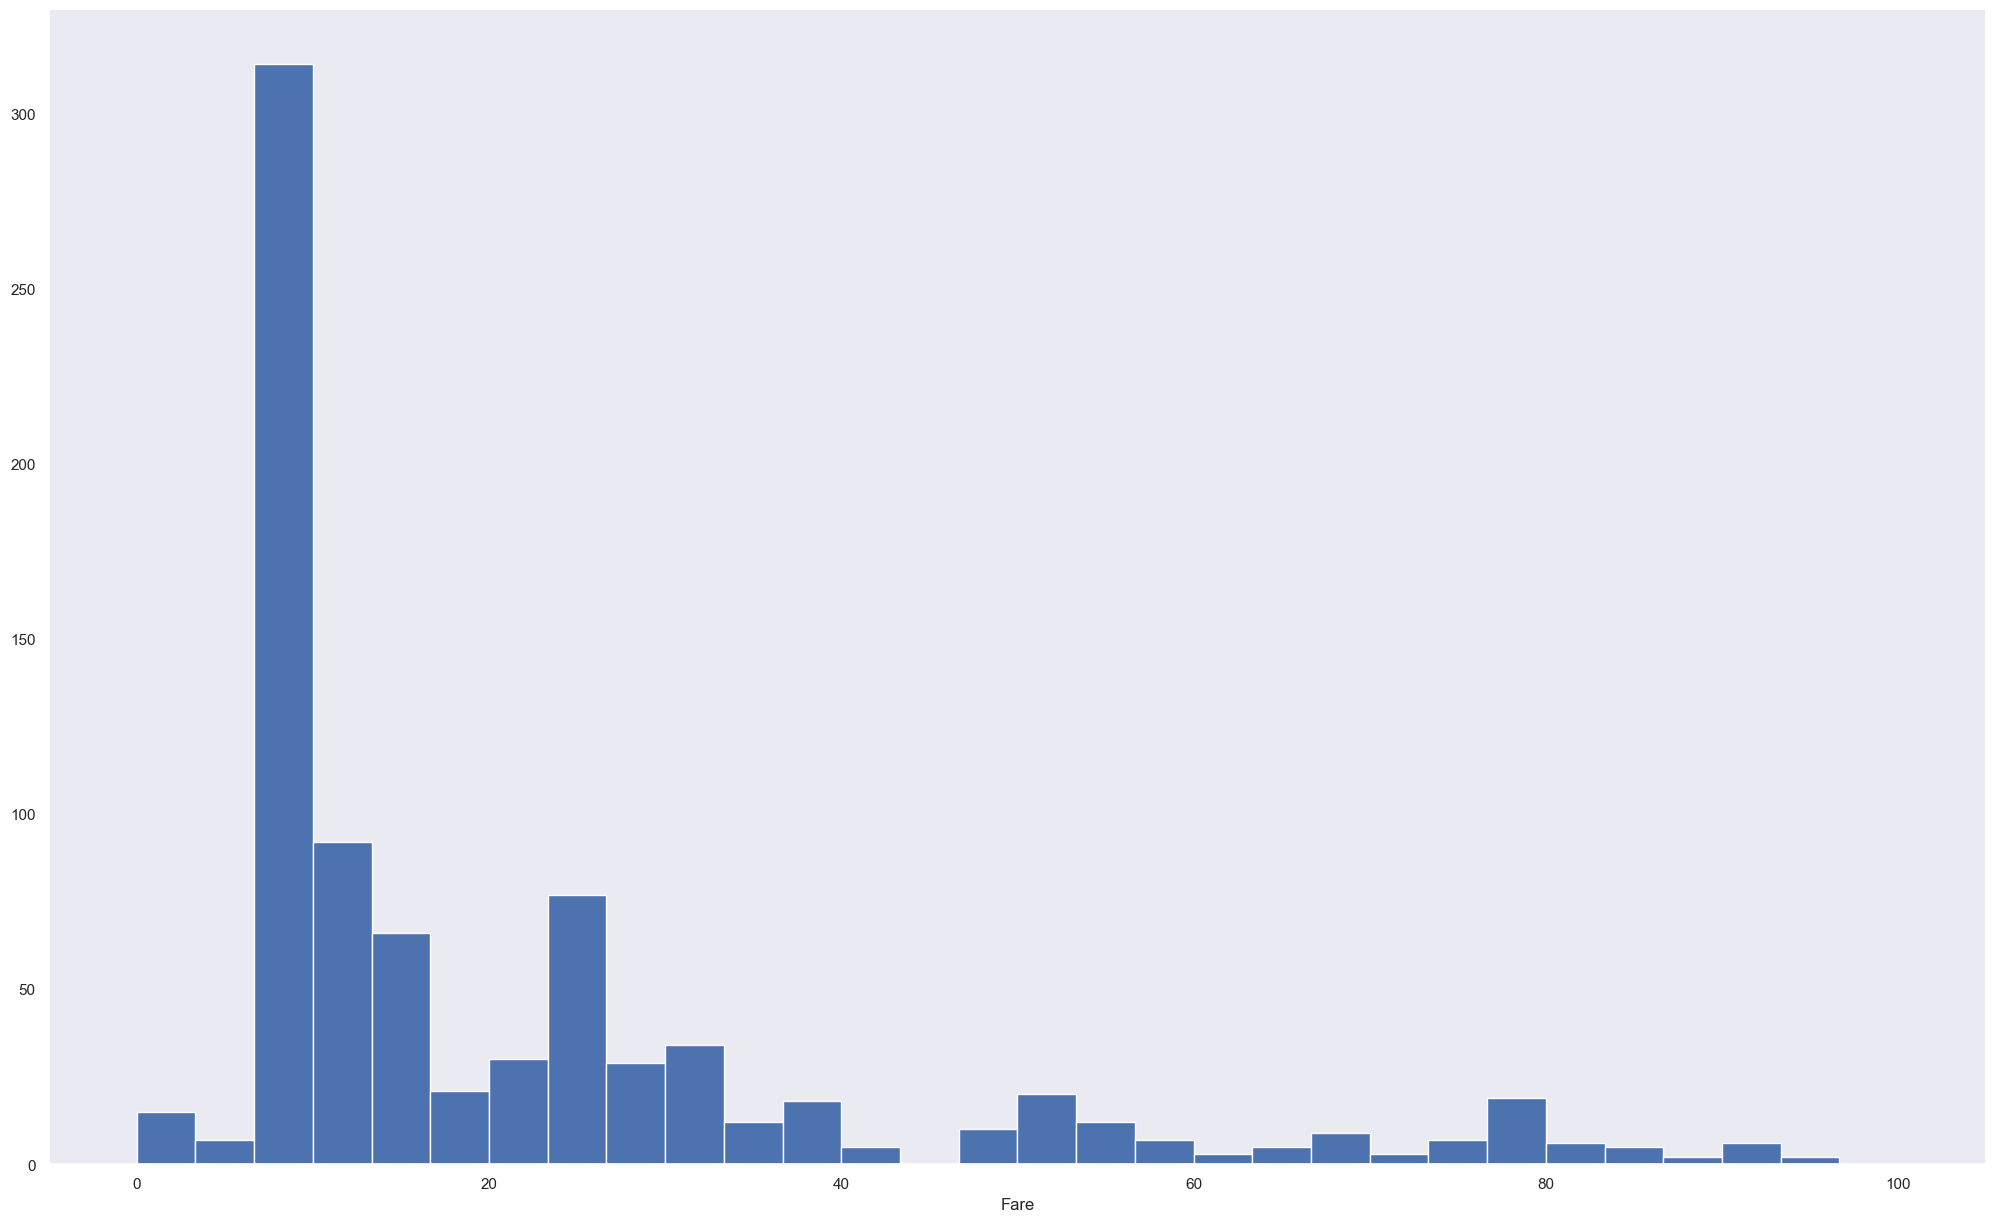

In [59]:
plt.hist(X.Fare, bins=30, range=(0,100))
plt.xlabel('Fare')
plt.grid()
plt.show()

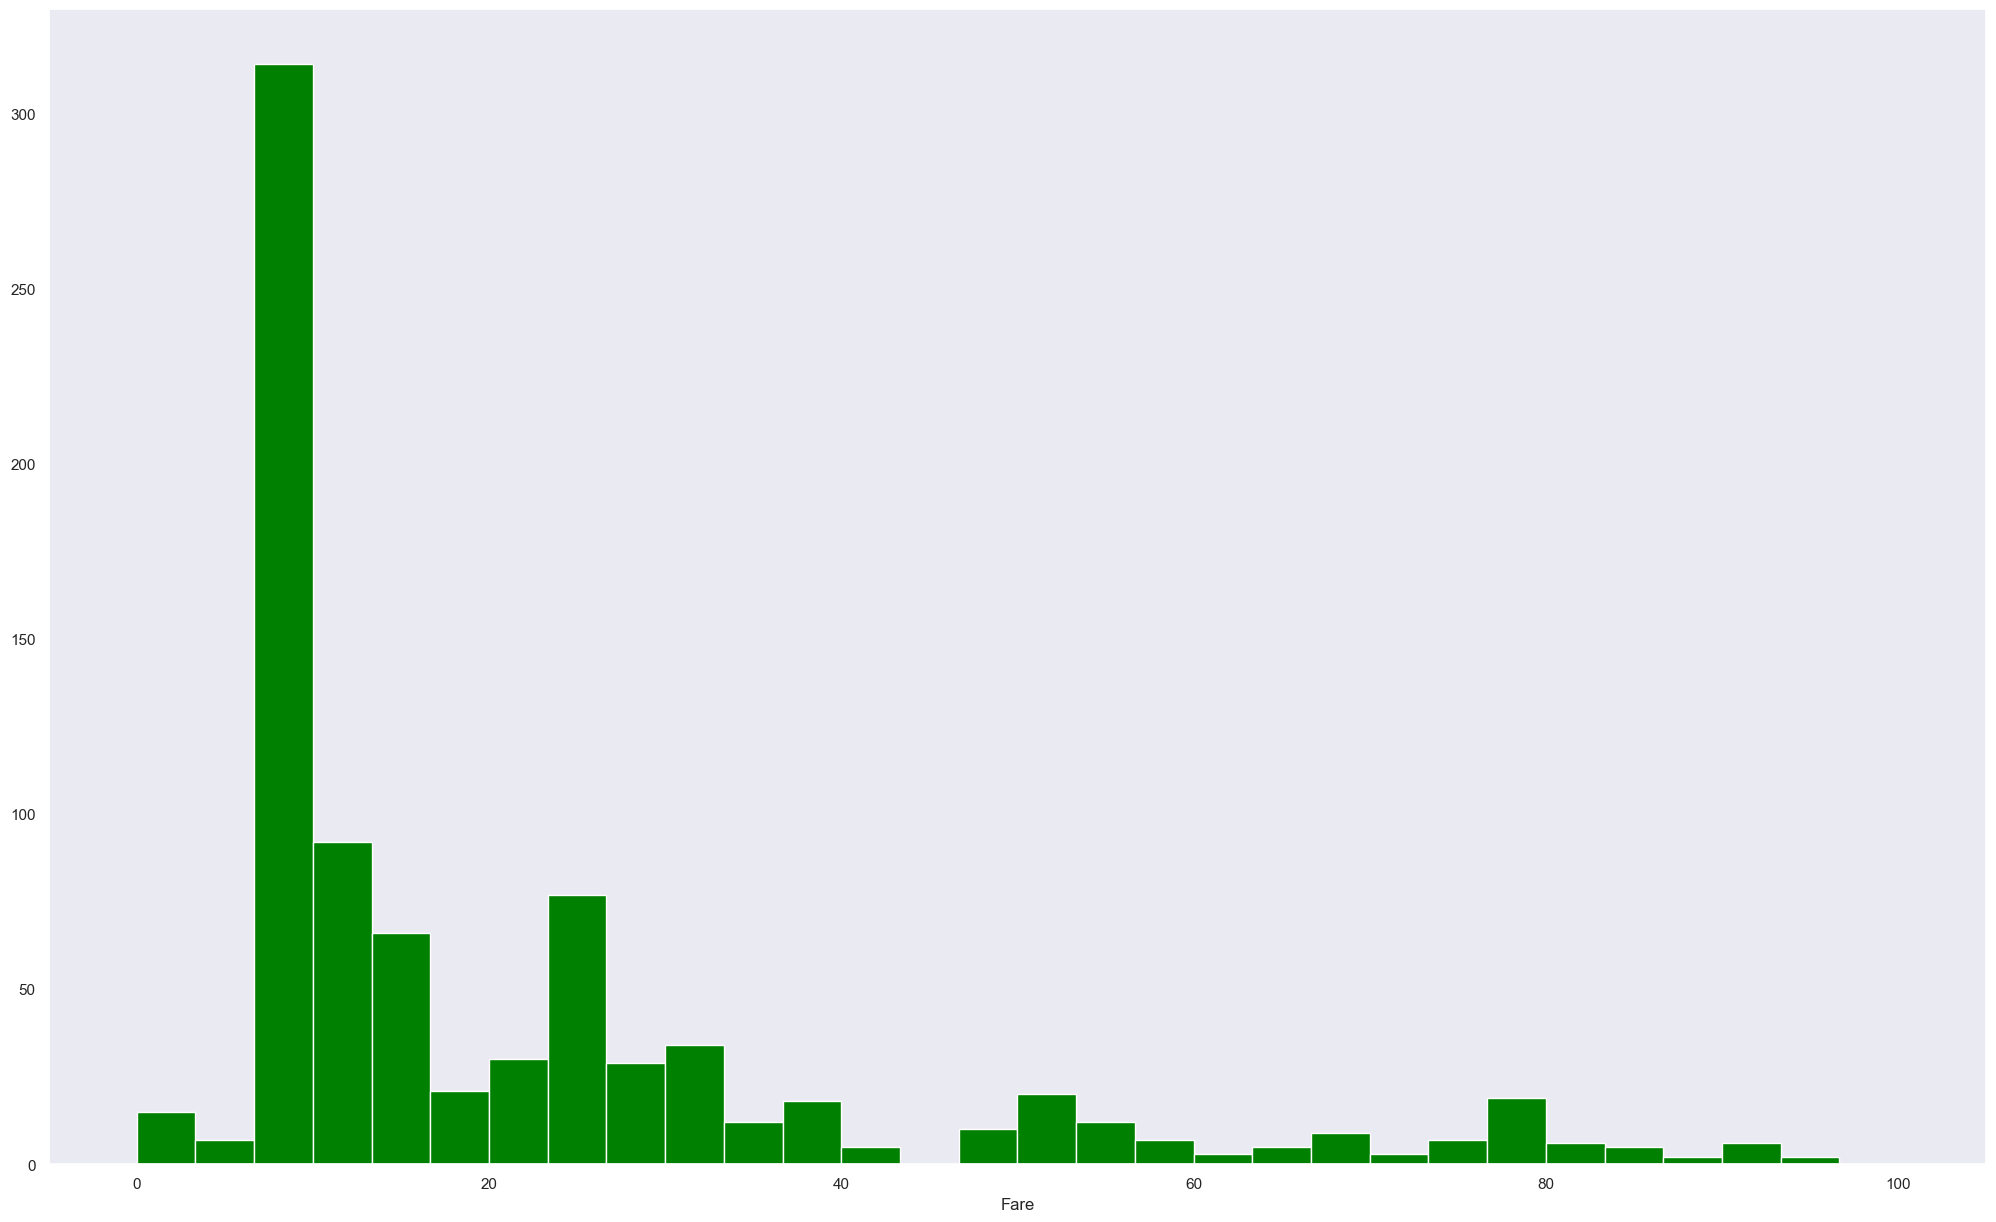

In [60]:
plt.hist(X.Fare, bins=30, range=(0,100), color='green')
plt.xlabel('Fare')
plt.grid()
plt.show()

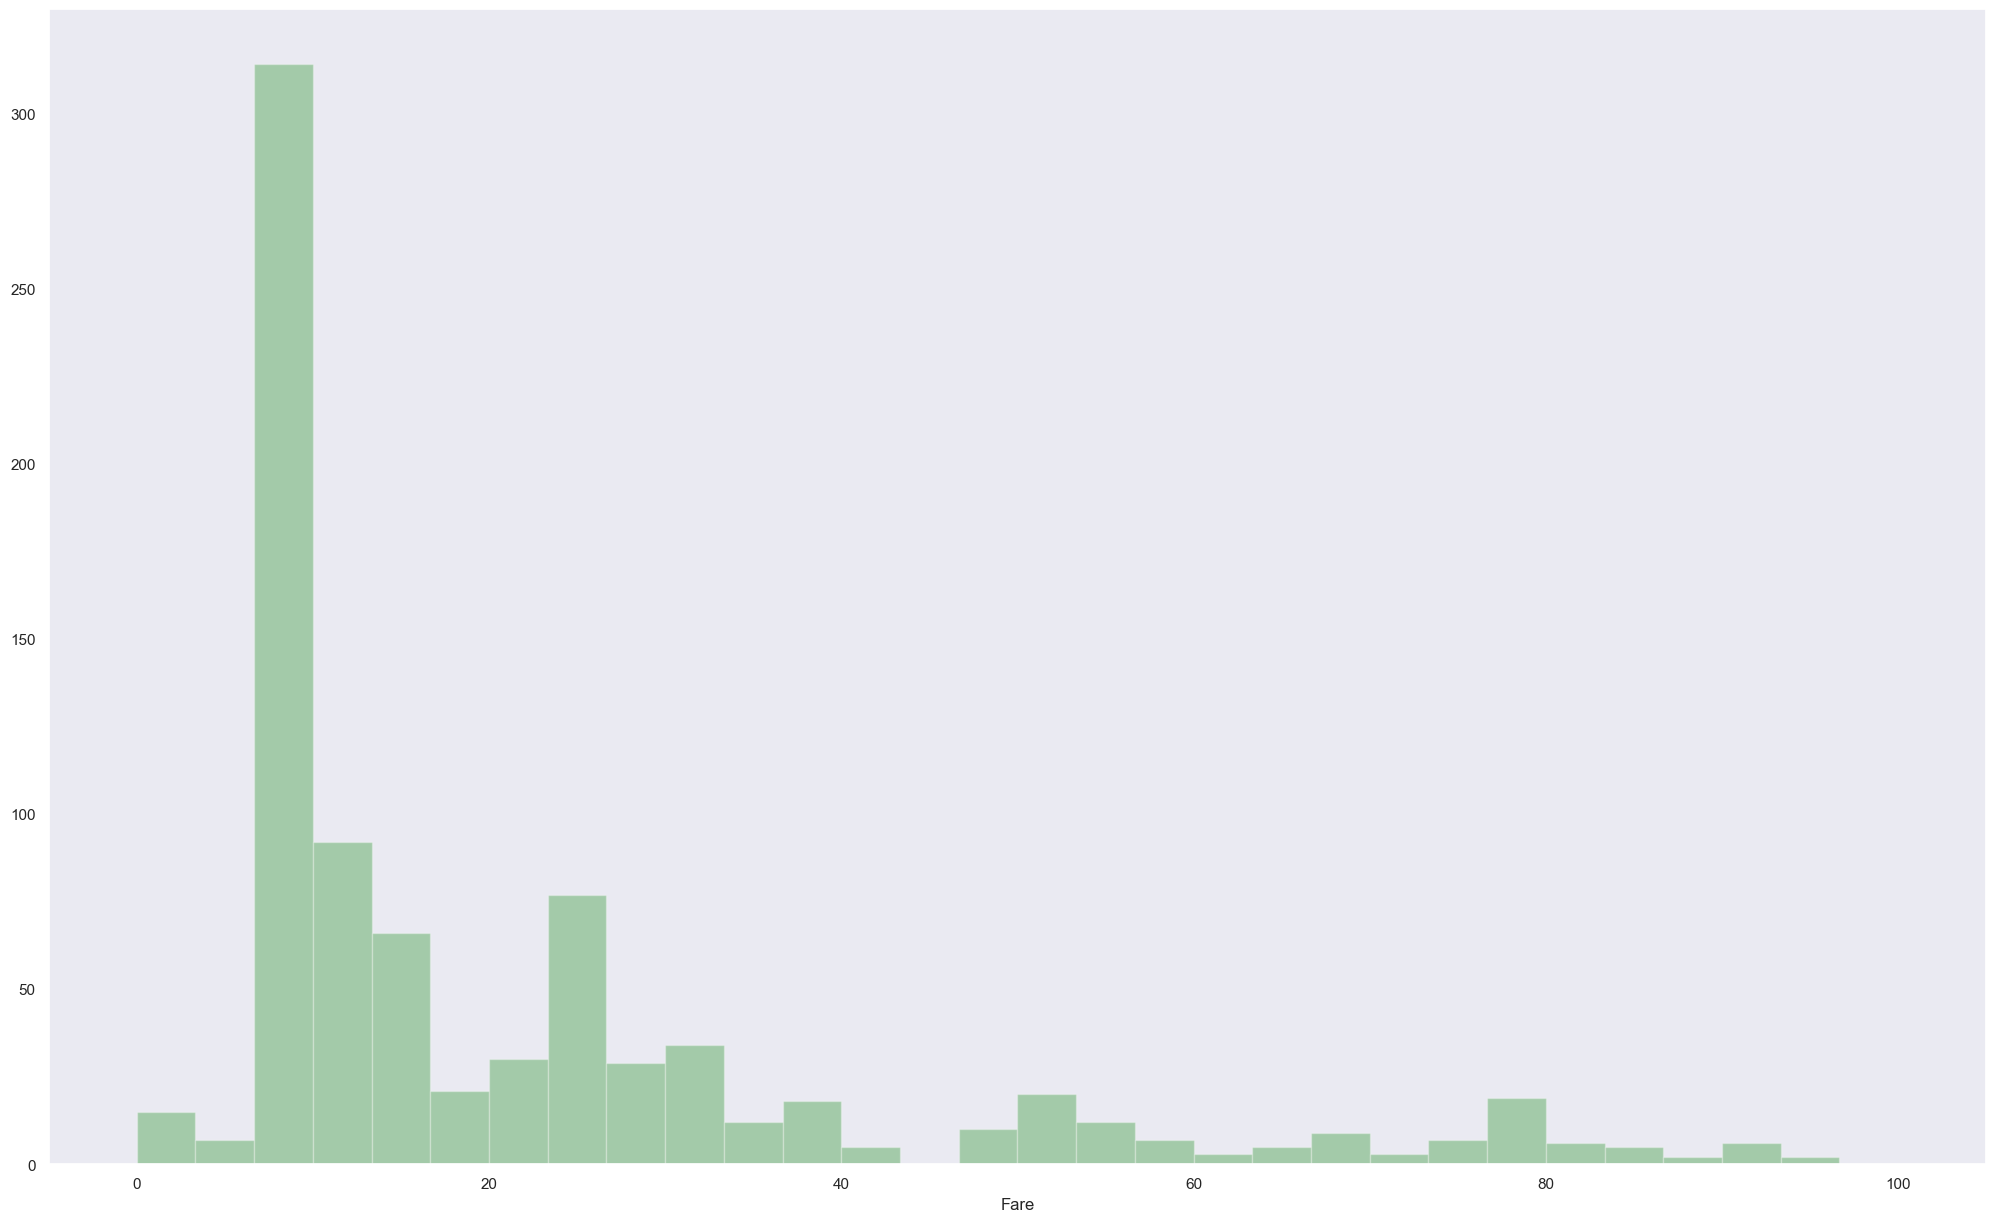

In [61]:
plt.hist(X.Fare, bins=30, range=(0,100), color='green', alpha=0.3)
plt.xlabel('Fare')
plt.grid()
plt.show()

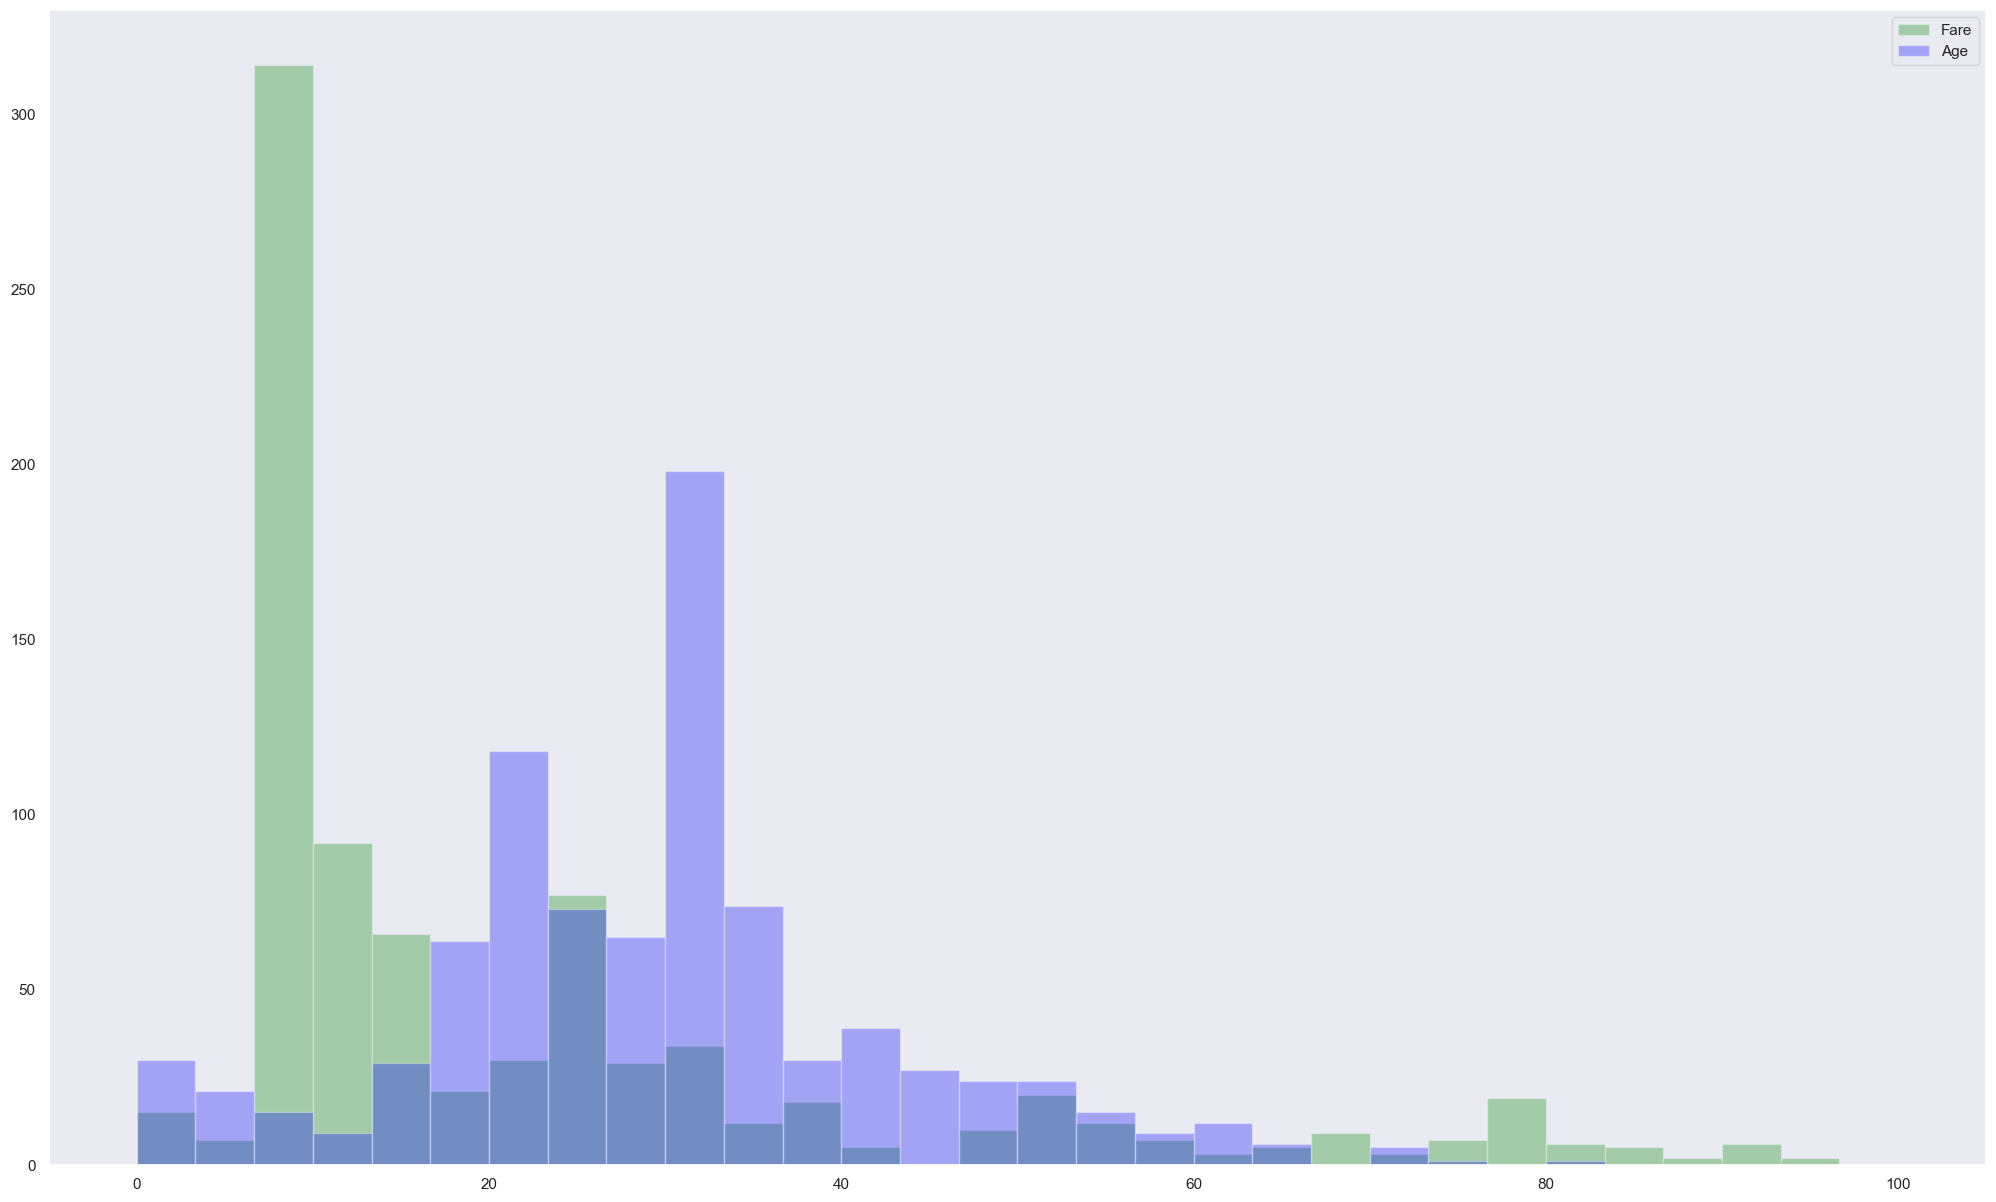

In [62]:
plt.hist(X.Fare, bins=30, range=(0,100), label='Fare', color='green', alpha=0.3)
plt.hist(X.Age, bins=30, range=(0,100), label='Age', color='blue', alpha=0.3)
plt.legend(loc='best')
plt.grid()
plt.show()

### Boje u matplotlibu
Dokumentacija: https://matplotlib.org/stable/api/colors_api.html#module-matplotlib.colors  
Lista svih imenovanih boja: https://matplotlib.org/stable/gallery/color/named_colors.html  
  
Atribut alpha može biti iz intervala [0, 1] i predstavlja prozirnost boje.  
Gornja dva primjera prikazuju promjenu parametra boje i atributa alpha.

### Pitni graf
Dokumentacija: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html

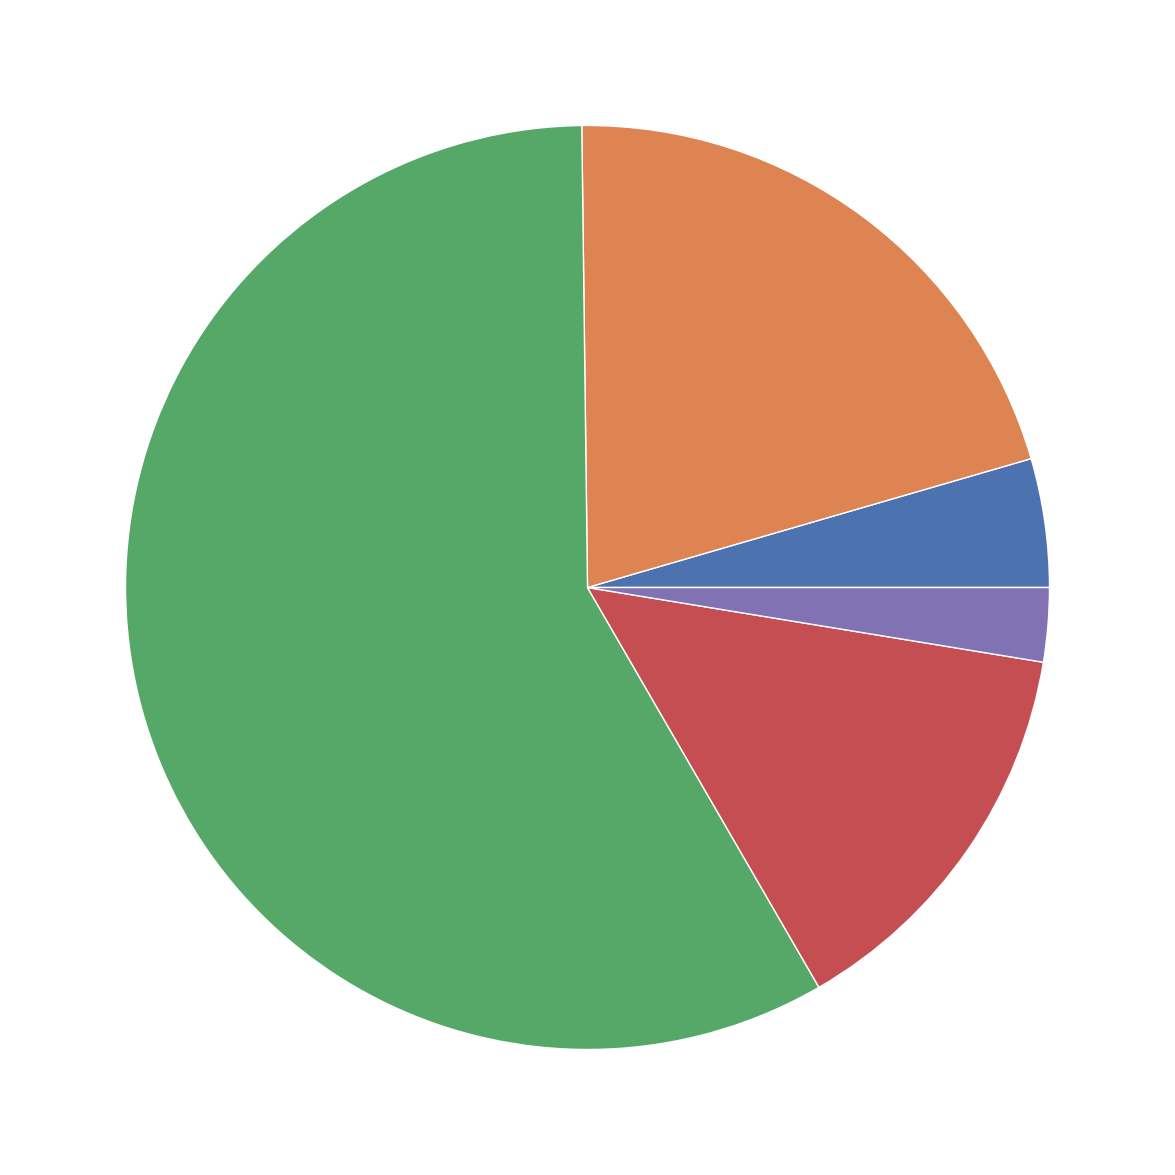

In [63]:
count_per_title = X.groupby('Title').count().loc[:,'Name'].values
percent = (count_per_title/len(X))*100

plt.pie(percent)
plt.show()

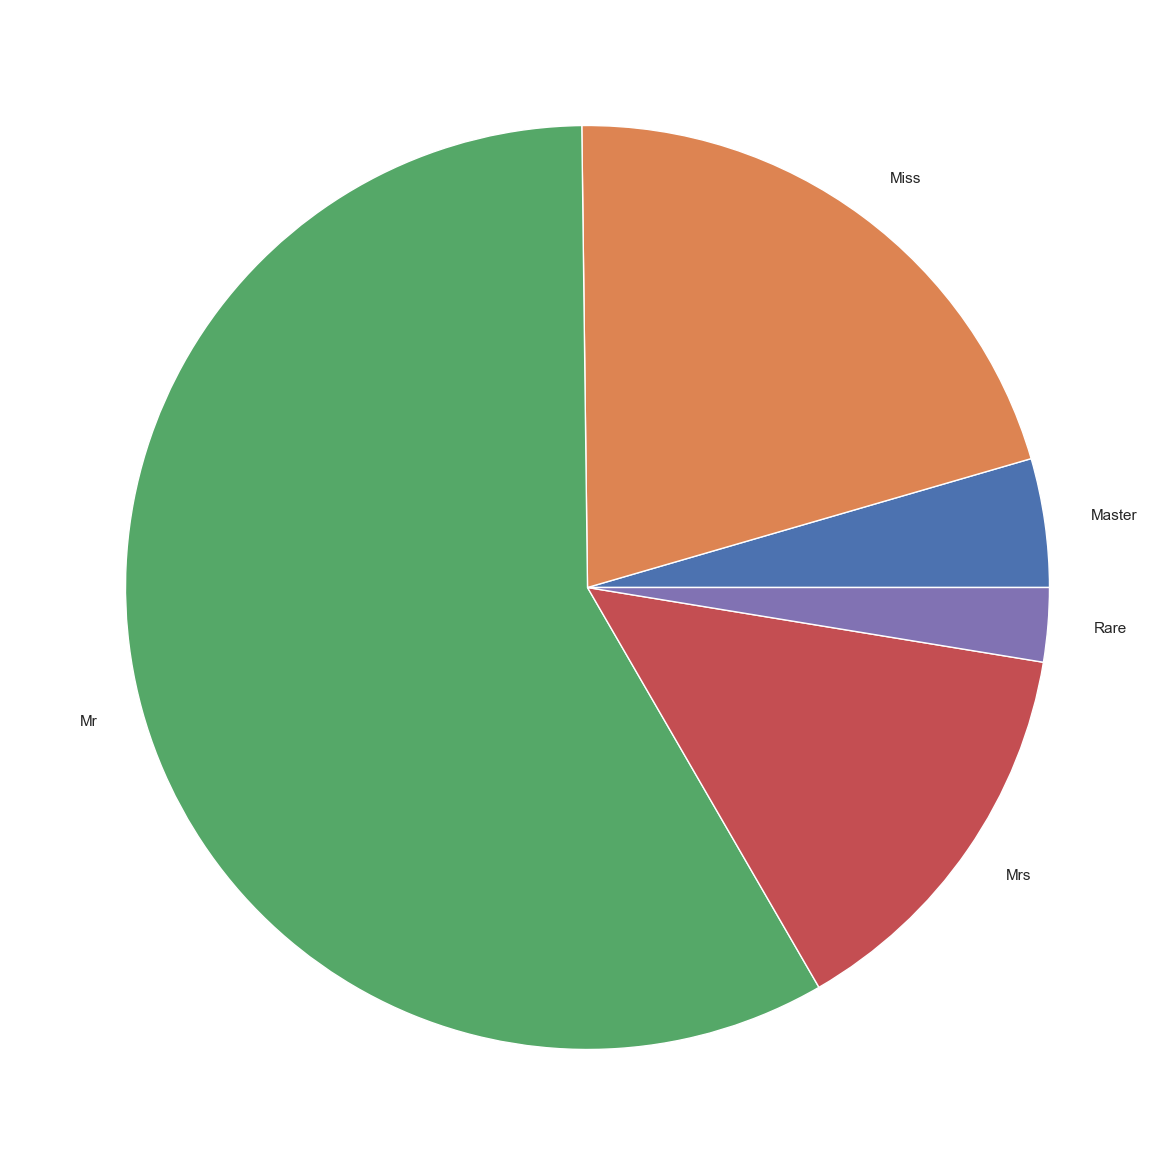

In [64]:
count_per_title = X.groupby('Title').count().loc[:,'Name'].values
title_name = X.groupby('Title').count().index.values
percent = (count_per_title/len(X))*100

plt.pie(percent, labels=title_name)
plt.show()

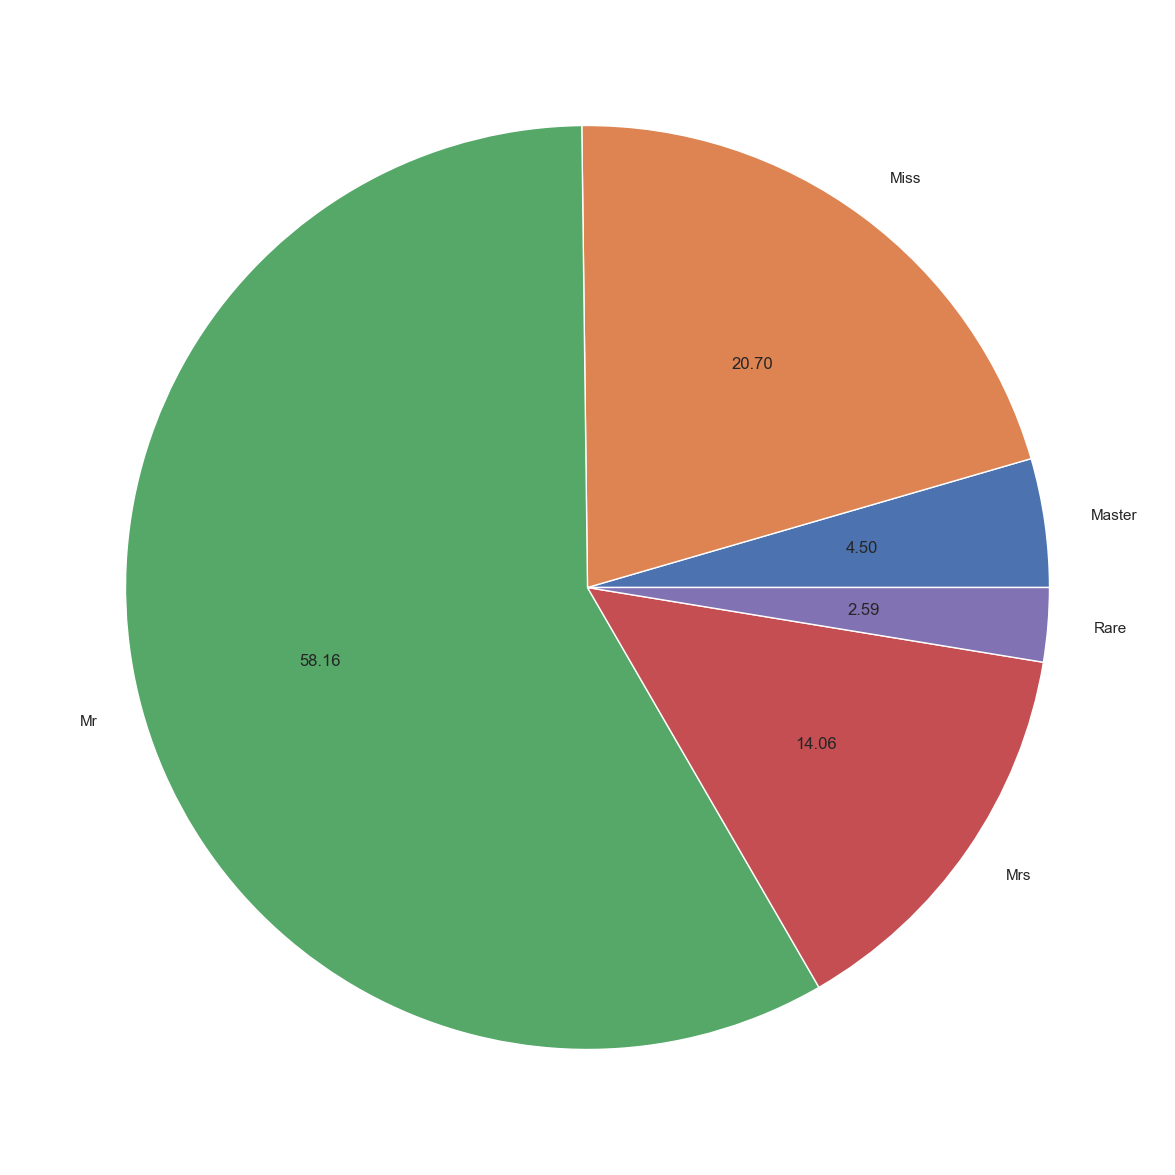

In [65]:
count_per_title = X.groupby('Title').count().loc[:,'Name'].values
title_name = X.groupby('Title').count().index.values

plt.pie(count_per_title, labels=title_name, autopct='%.2f')
plt.show()

### Stupčasti graf
Dokumentacija: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

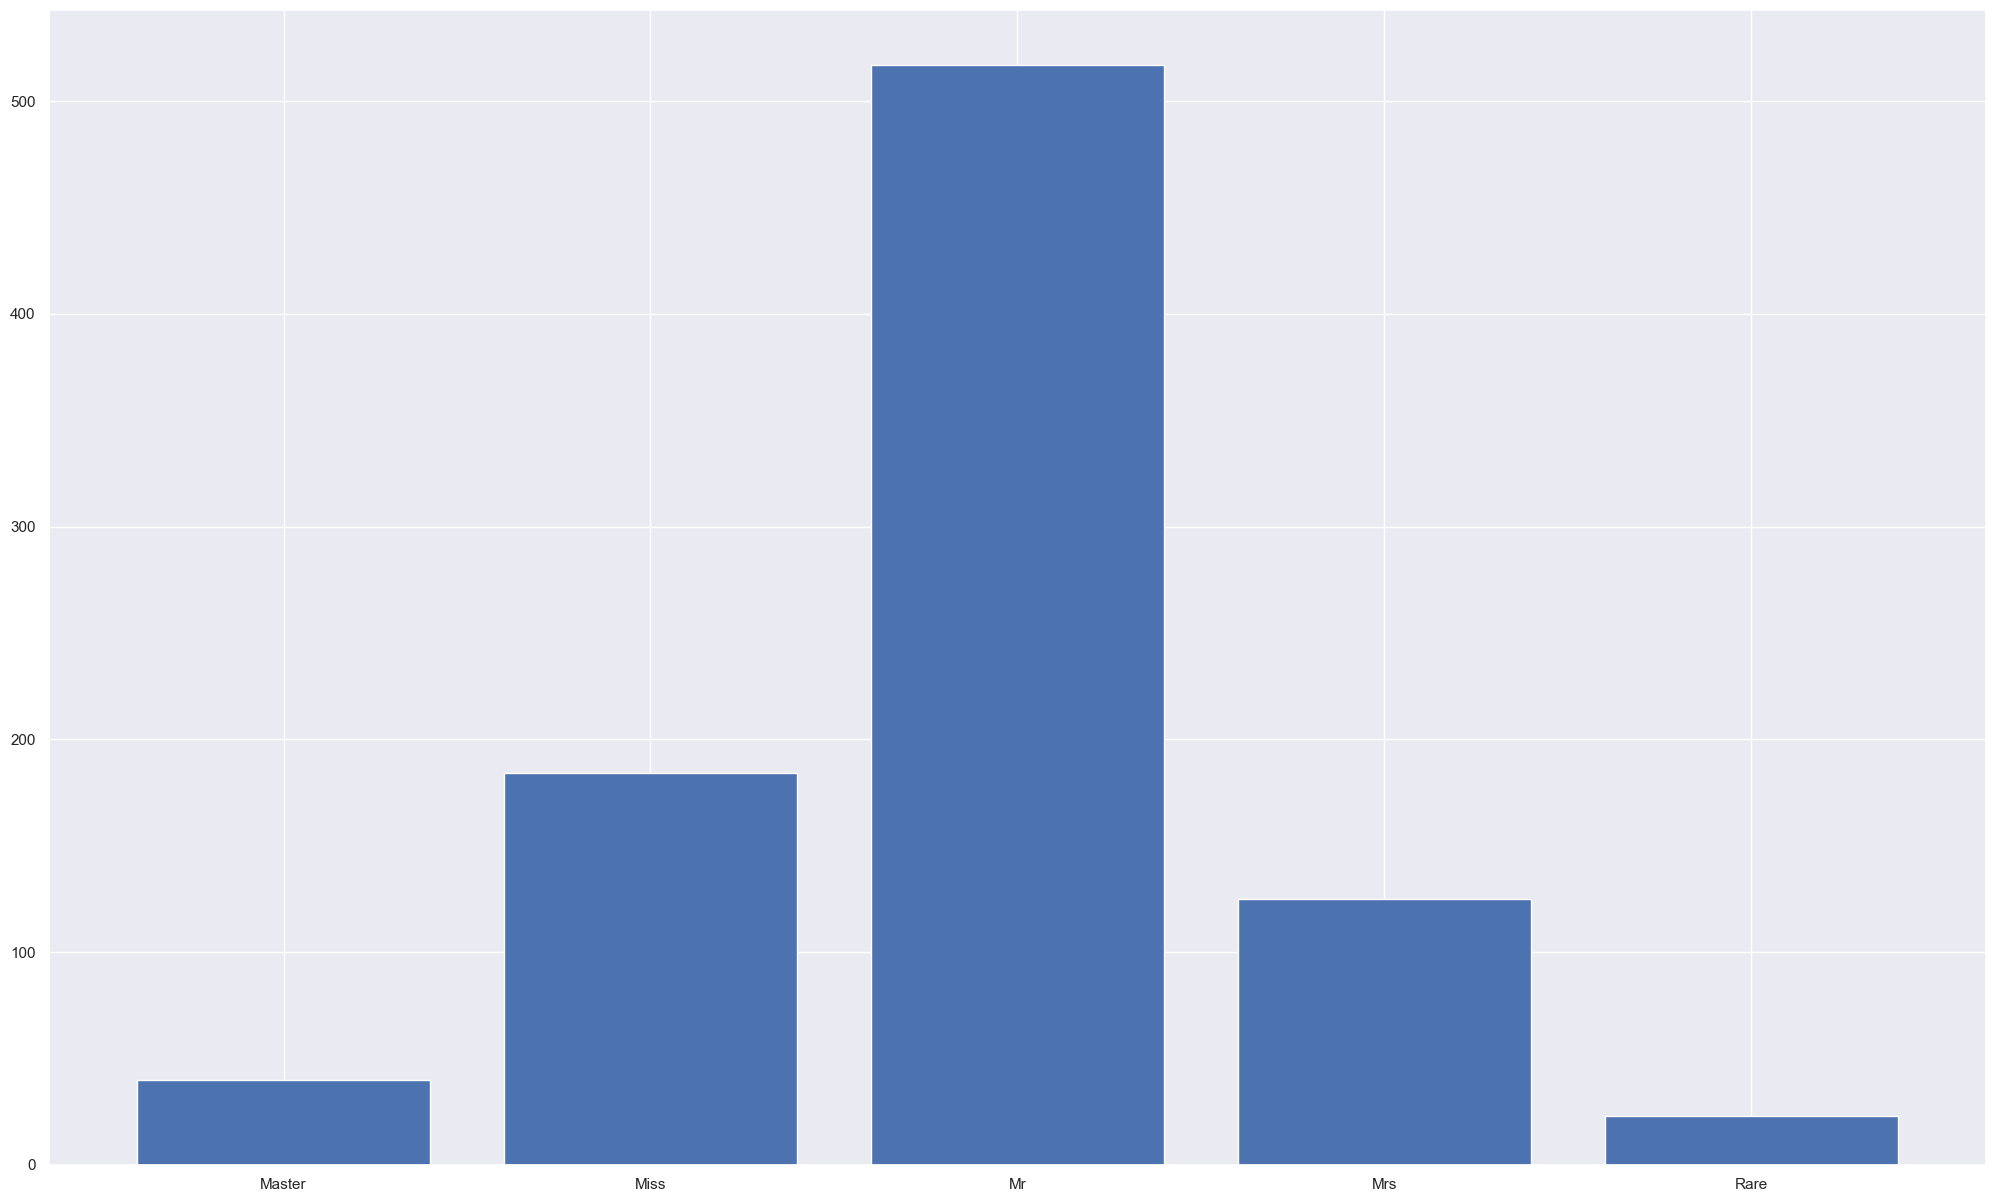

In [66]:
count_per_title = X.groupby('Title').count().loc[:,'Name'].values
title_name = X.groupby('Title').count().index.values

plt.bar(title_name, count_per_title)
plt.show()

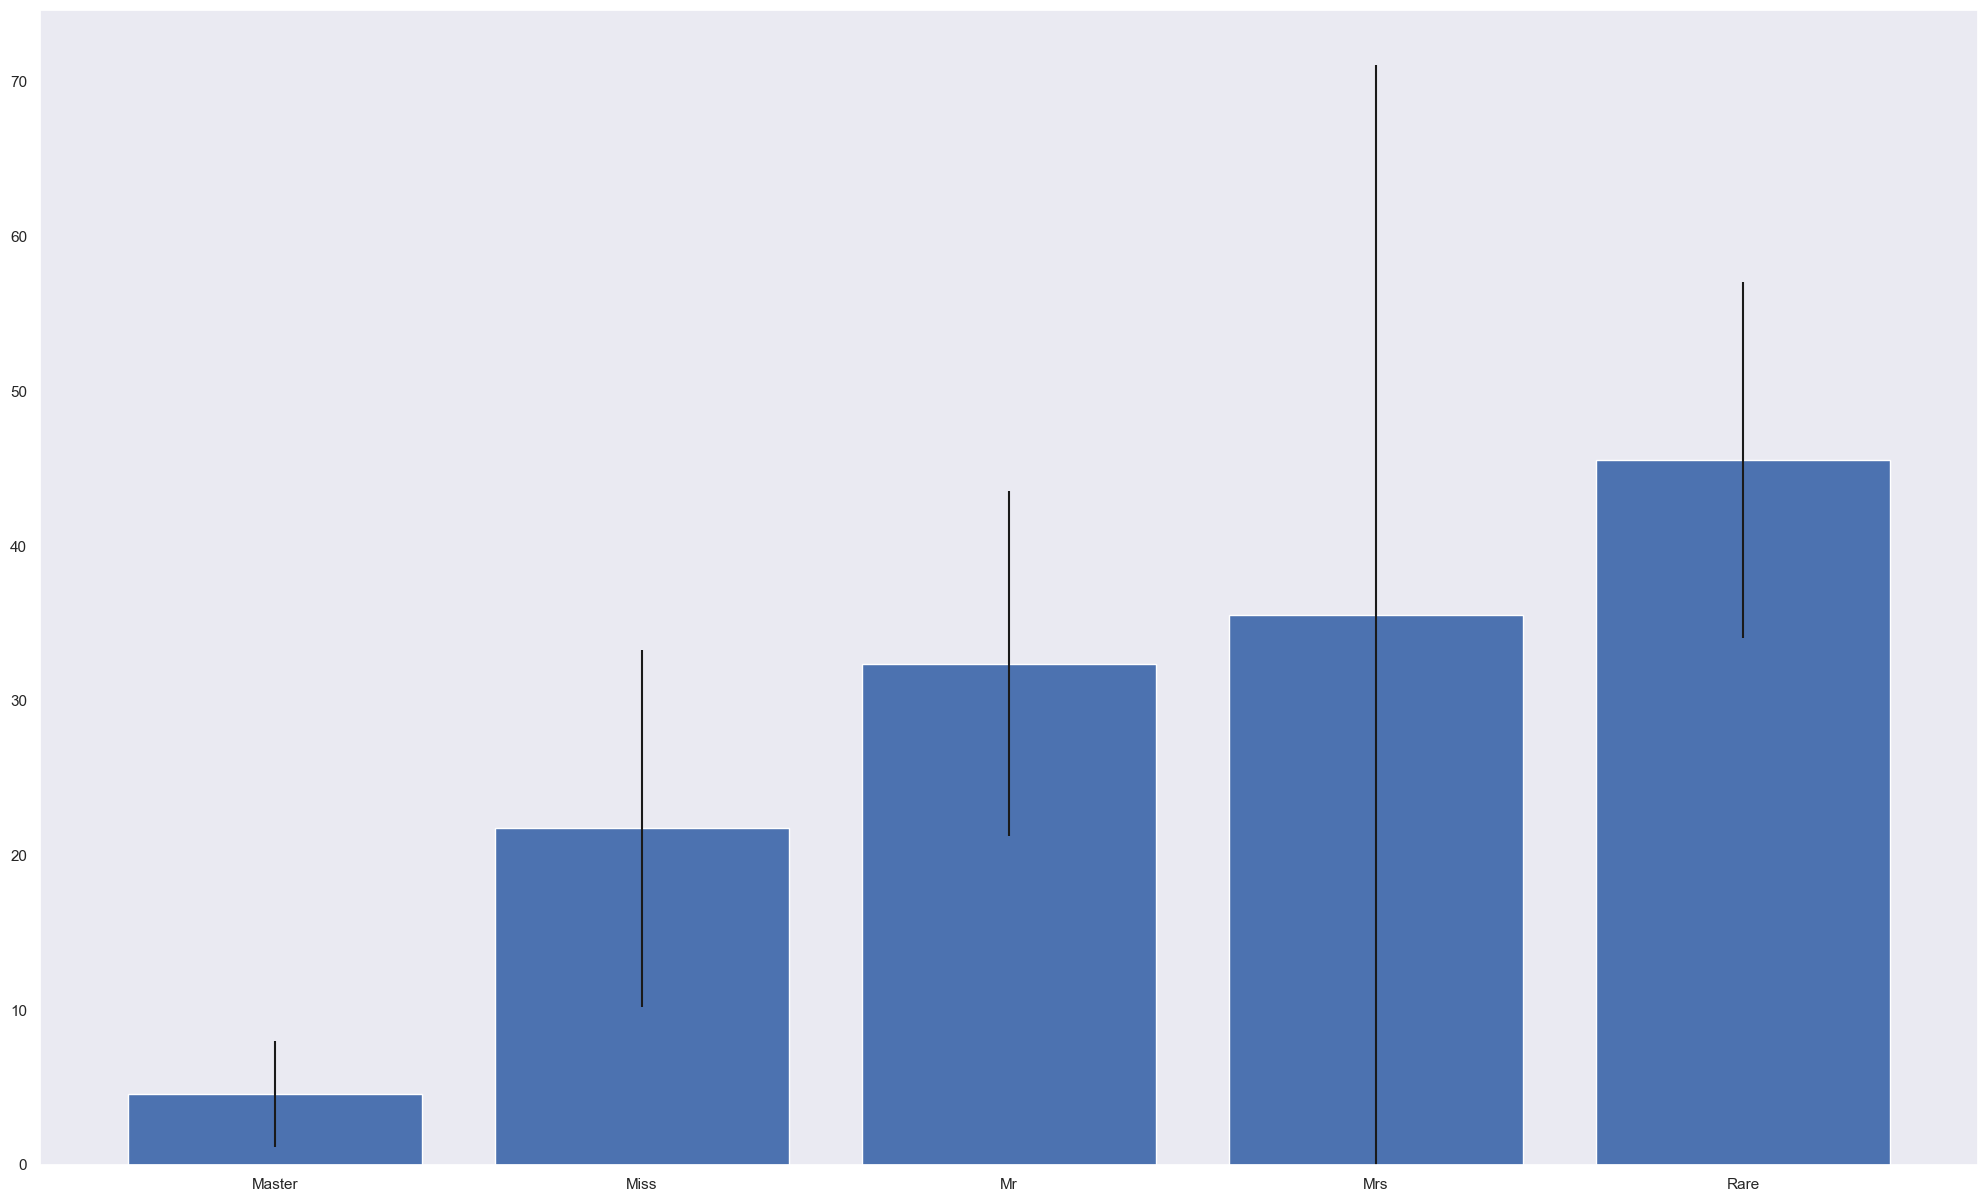

In [67]:
# data
master_mean = X.loc[X.loc[:,'Title'] == 'Master', 'Age'].mean()
master_std = X.loc[X.loc[:,'Title'] == 'Master', 'Age'].std()
miss_mean = X.loc[X.loc[:,'Title'] == 'Miss', 'Age'].mean()
miss_std = X.loc[X.loc[:,'Title'] == 'Miss', 'Age'].std()
mr_mean = X.loc[X.loc[:,'Title'] == 'Mr', 'Age'].mean()
mr_std = X.loc[X.loc[:,'Title'] == 'Mr', 'Age'].std()
mrs_mean = X.loc[X.loc[:,'Title'] == 'Mrs', 'Age'].mean()
mrs_std = X.loc[X.loc[:,'Title'] == 'Mrs', 'Age'].std()
rare_mean = X.loc[X.loc[:,'Title'] == 'Rare', 'Age'].mean()
rare_std = X.loc[X.loc[:,'Title'] == 'Rare', 'Age'].std()

age_per_title = [master_mean, miss_mean, mr_mean, mrs_mean, rare_mean]
age_per_title_std = [master_std, miss_std, mr_std, mrs_mean, rare_std]

title_name = X.groupby('Title').count().index.values

# plot
plt.bar(title_name, age_per_title, yerr=age_per_title_std)
plt.grid()
plt.show()

### Posloženi dijagram

        Survived  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  Fare  Cabin  \
Title                                                                         
Master        17      17    17   17   17     17     17      17    17      0   
Miss          55      55    55   55   55     55     55      55    55      3   
Mr           436     436   436  436  436    436    436     436   436     59   
Mrs           26      26    26   26   26     26     26      26    26      3   
Rare          15      15    15   15   15     15     15      15    15      3   

        Embarked  Title_Master  Title_Miss  Title_Mr  Title_Mrs  Title_Rare  \
Title                                                                         
Master        17            17          17        17         17          17   
Miss          55            55          55        55         55          55   
Mr           436           436         436       436        436         436   
Mrs           26            26          26        2

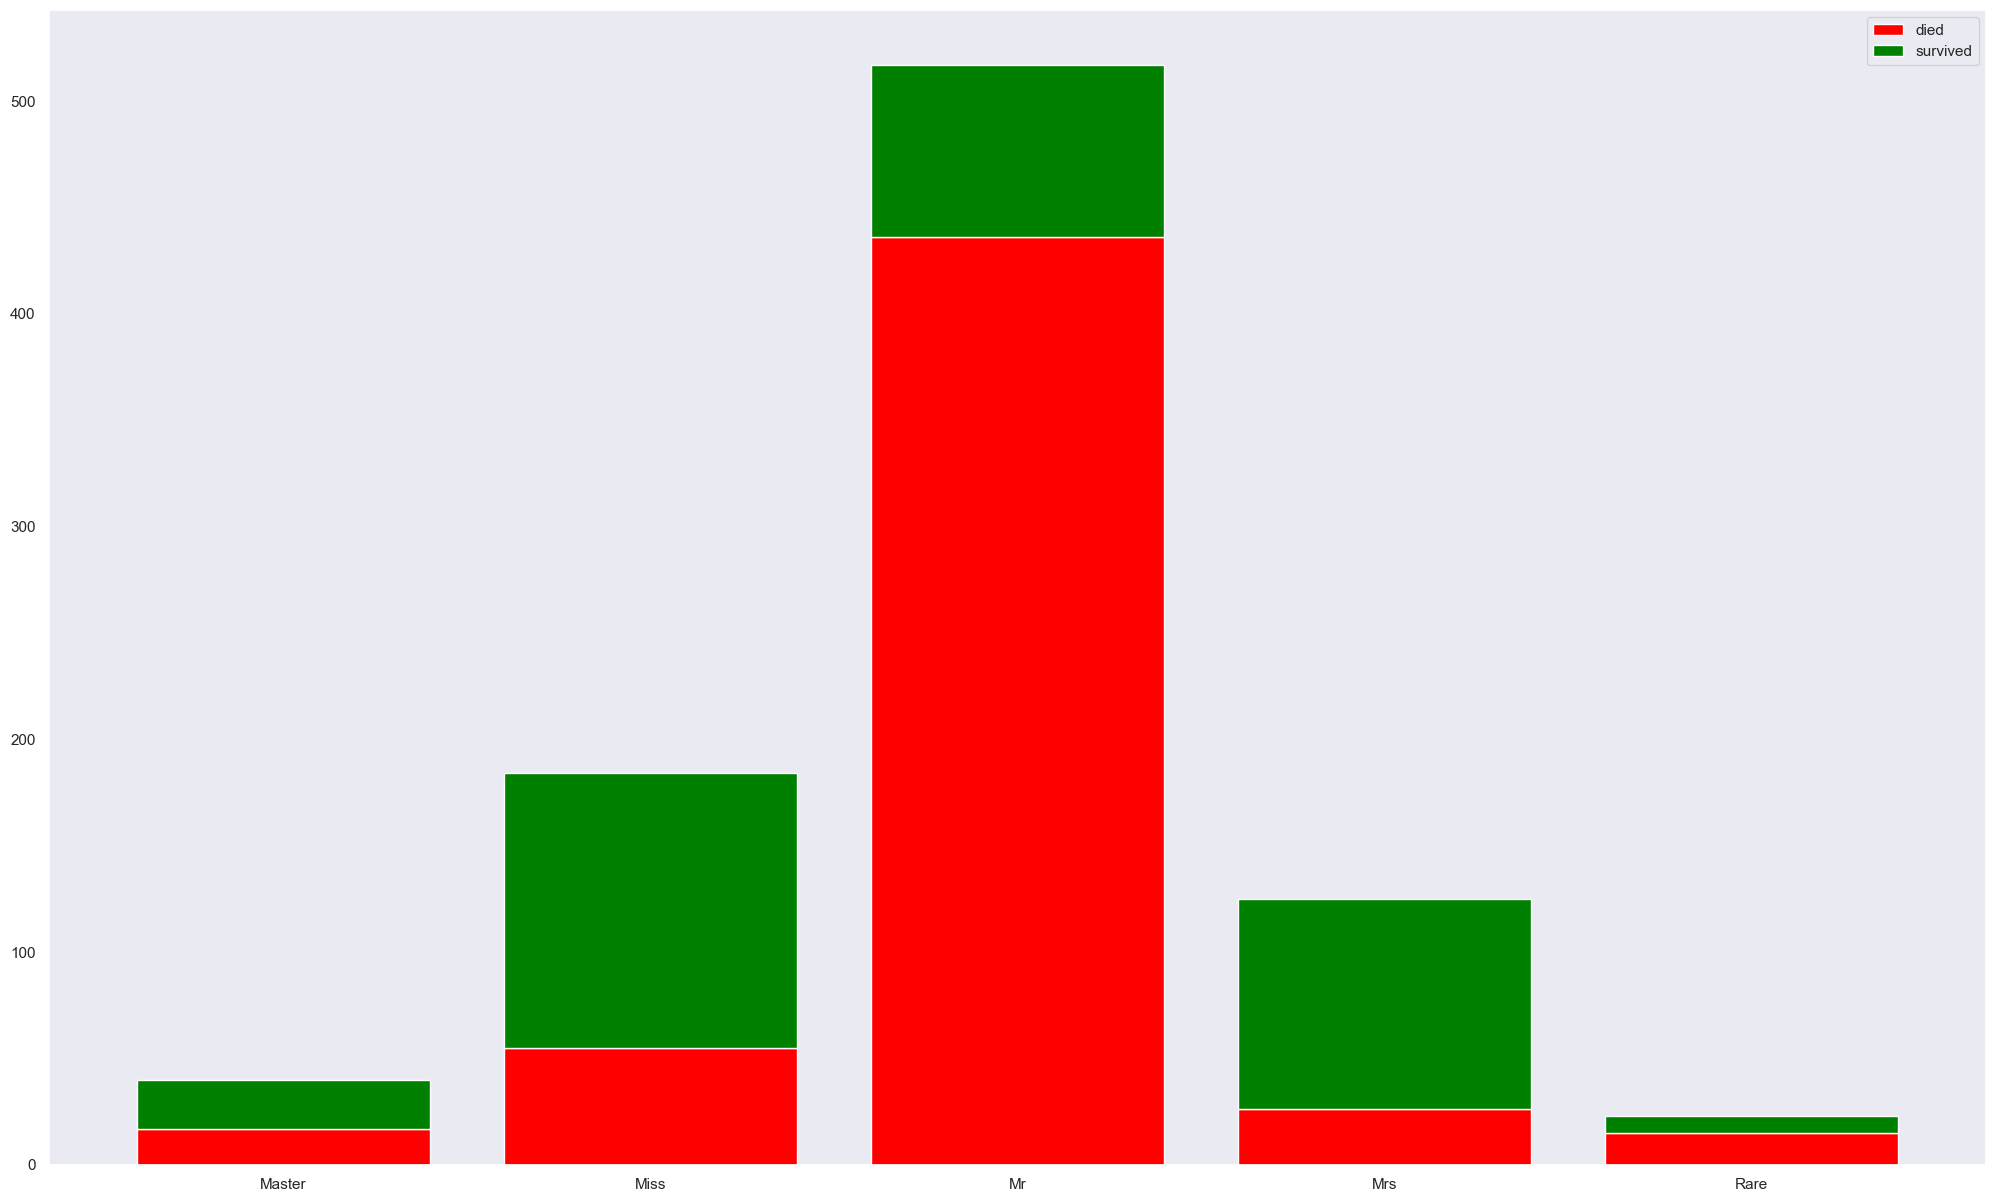

In [68]:
# mask
mask_survived = X.Survived == 1

count_per_title_died = X.loc[~mask_survived,:].groupby('Title').count().loc[:,'Name'].values
print(X.loc[~mask_survived,:].groupby('Title').count())
count_per_title_survived = X.loc[mask_survived,:].groupby('Title').count().loc[:,'Name'].values
title_name = X.groupby('Title').count().index.values

# plot
plt.bar(title_name, count_per_title_died, color='red', label='died')
plt.bar(title_name, count_per_title_survived, color='green', label='survived', bottom=count_per_title_died)
plt.legend(loc='best')
plt.grid()
plt.show()

### Kutijasti graf
Dokumentacija: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html

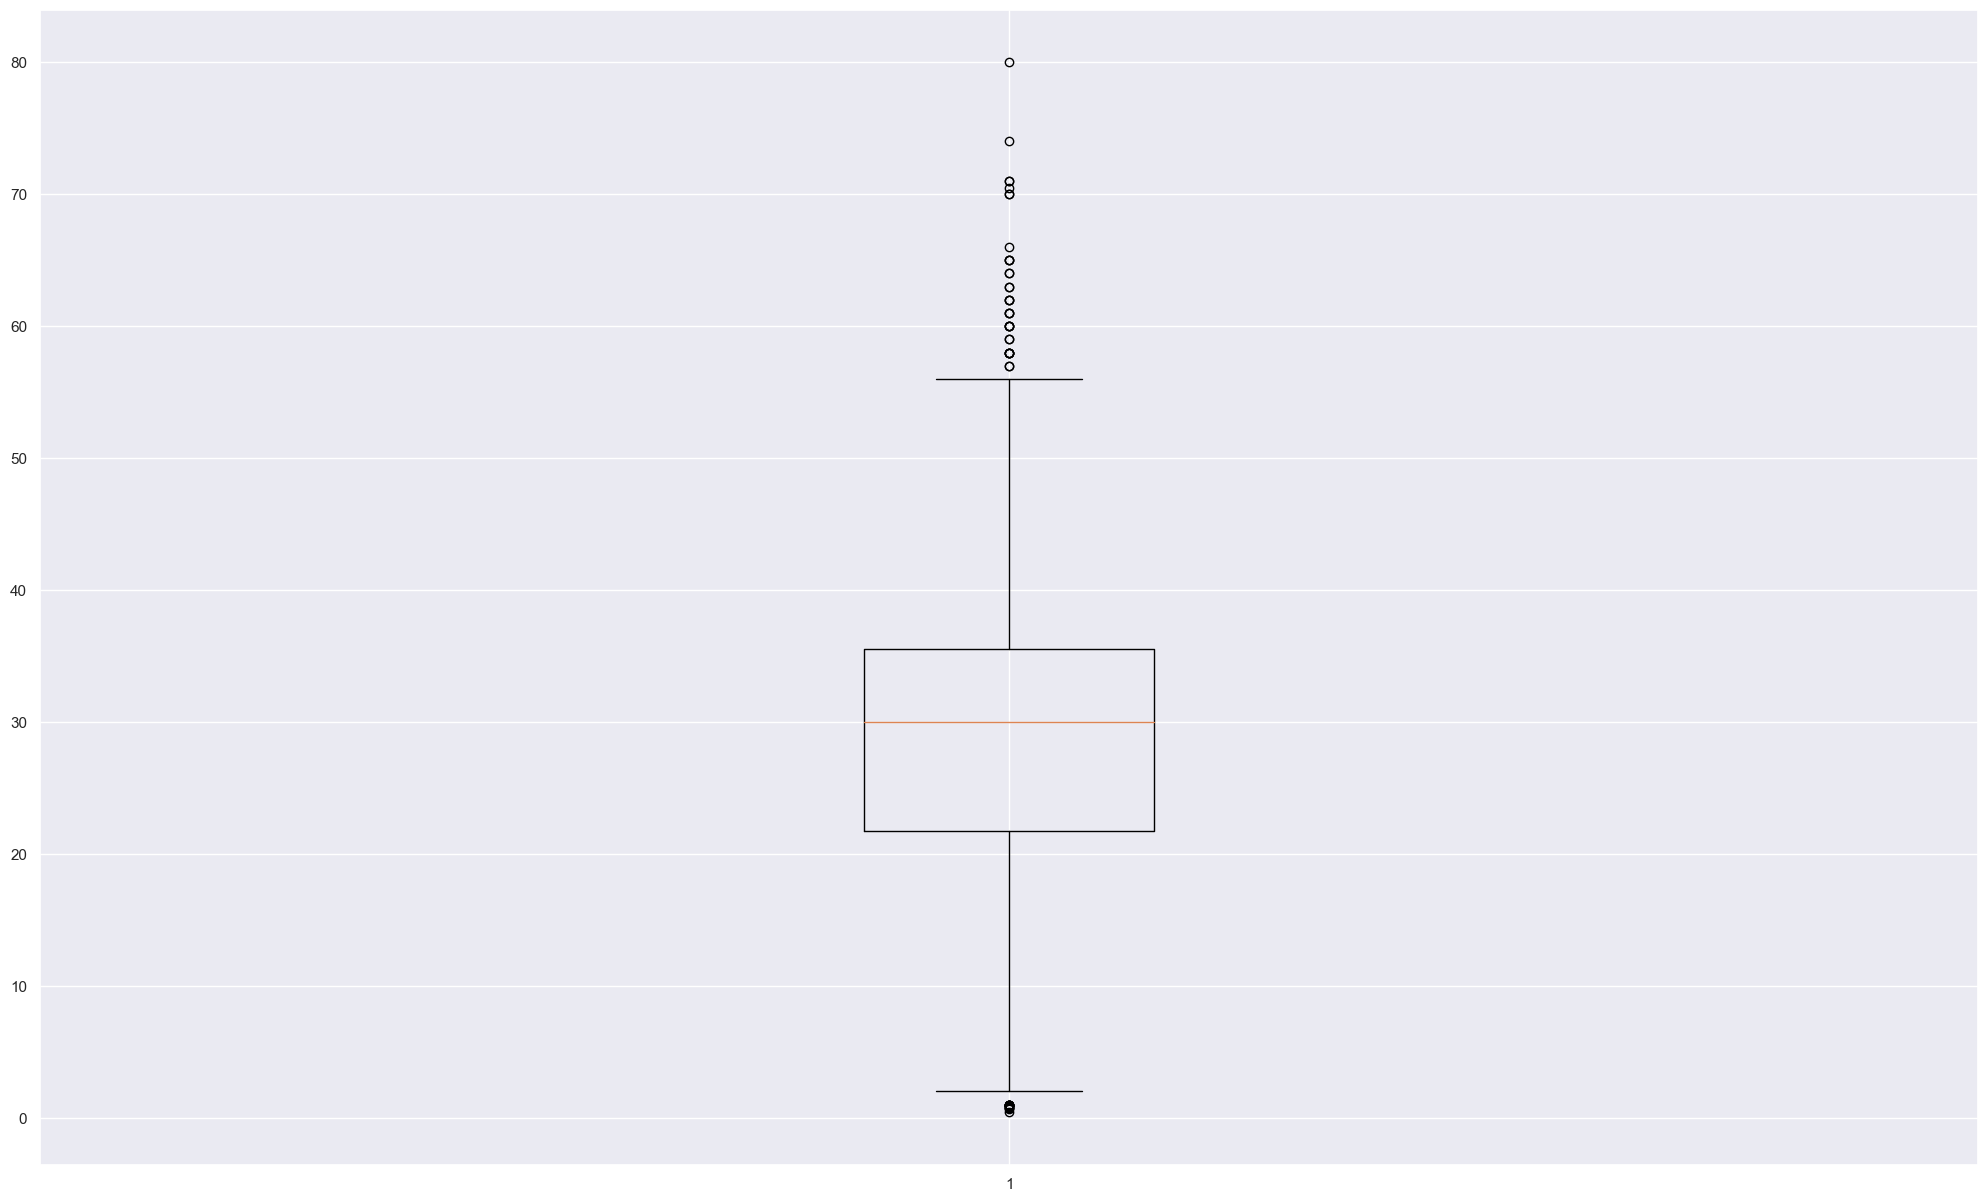

In [69]:
plt.boxplot(X.Age)
plt.show()

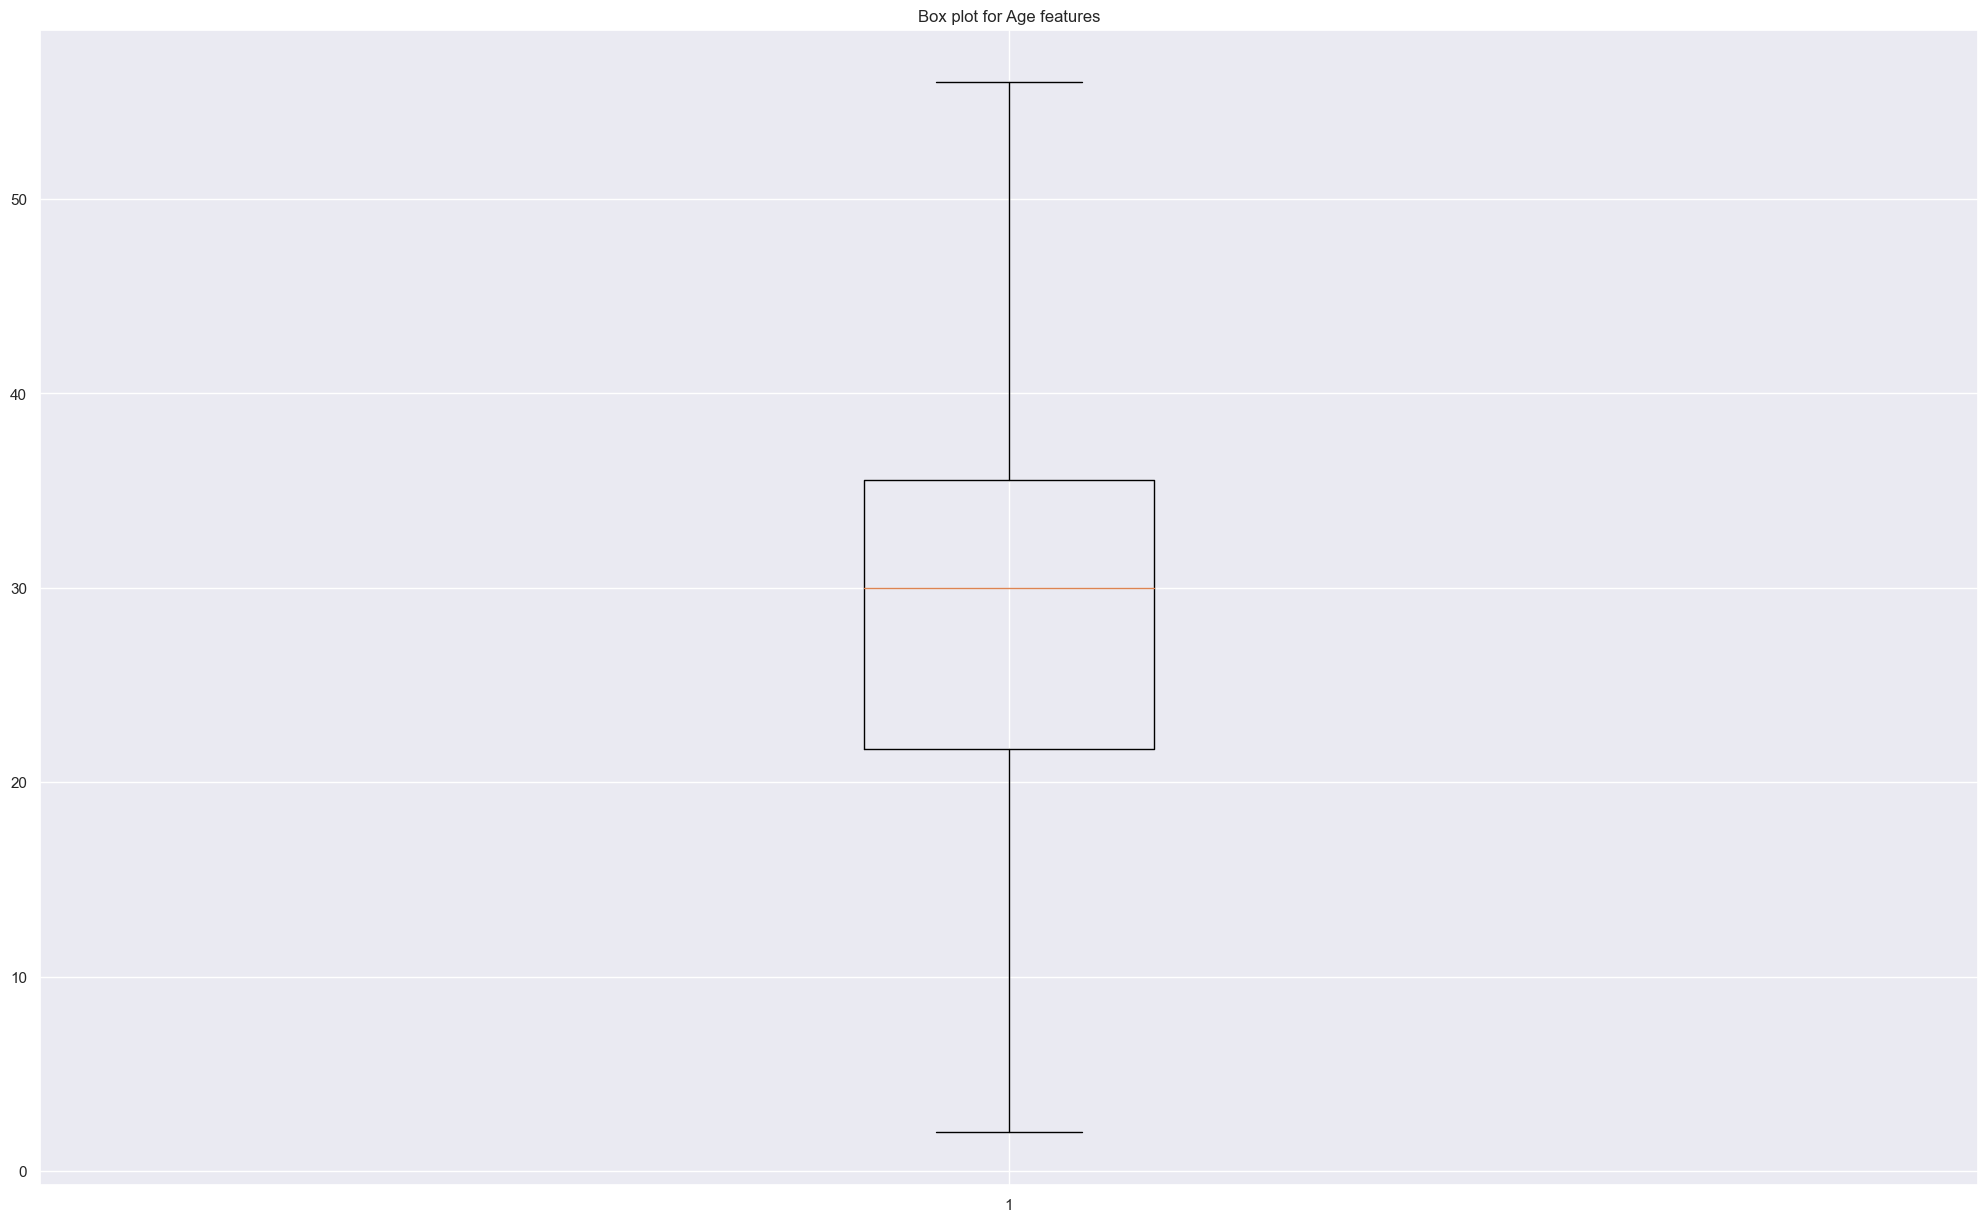

In [70]:
plt.boxplot(X.Age, showfliers=False)
plt.title('Box plot for Age features')
plt.show()

### Linijski graf
Dokumentacija: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

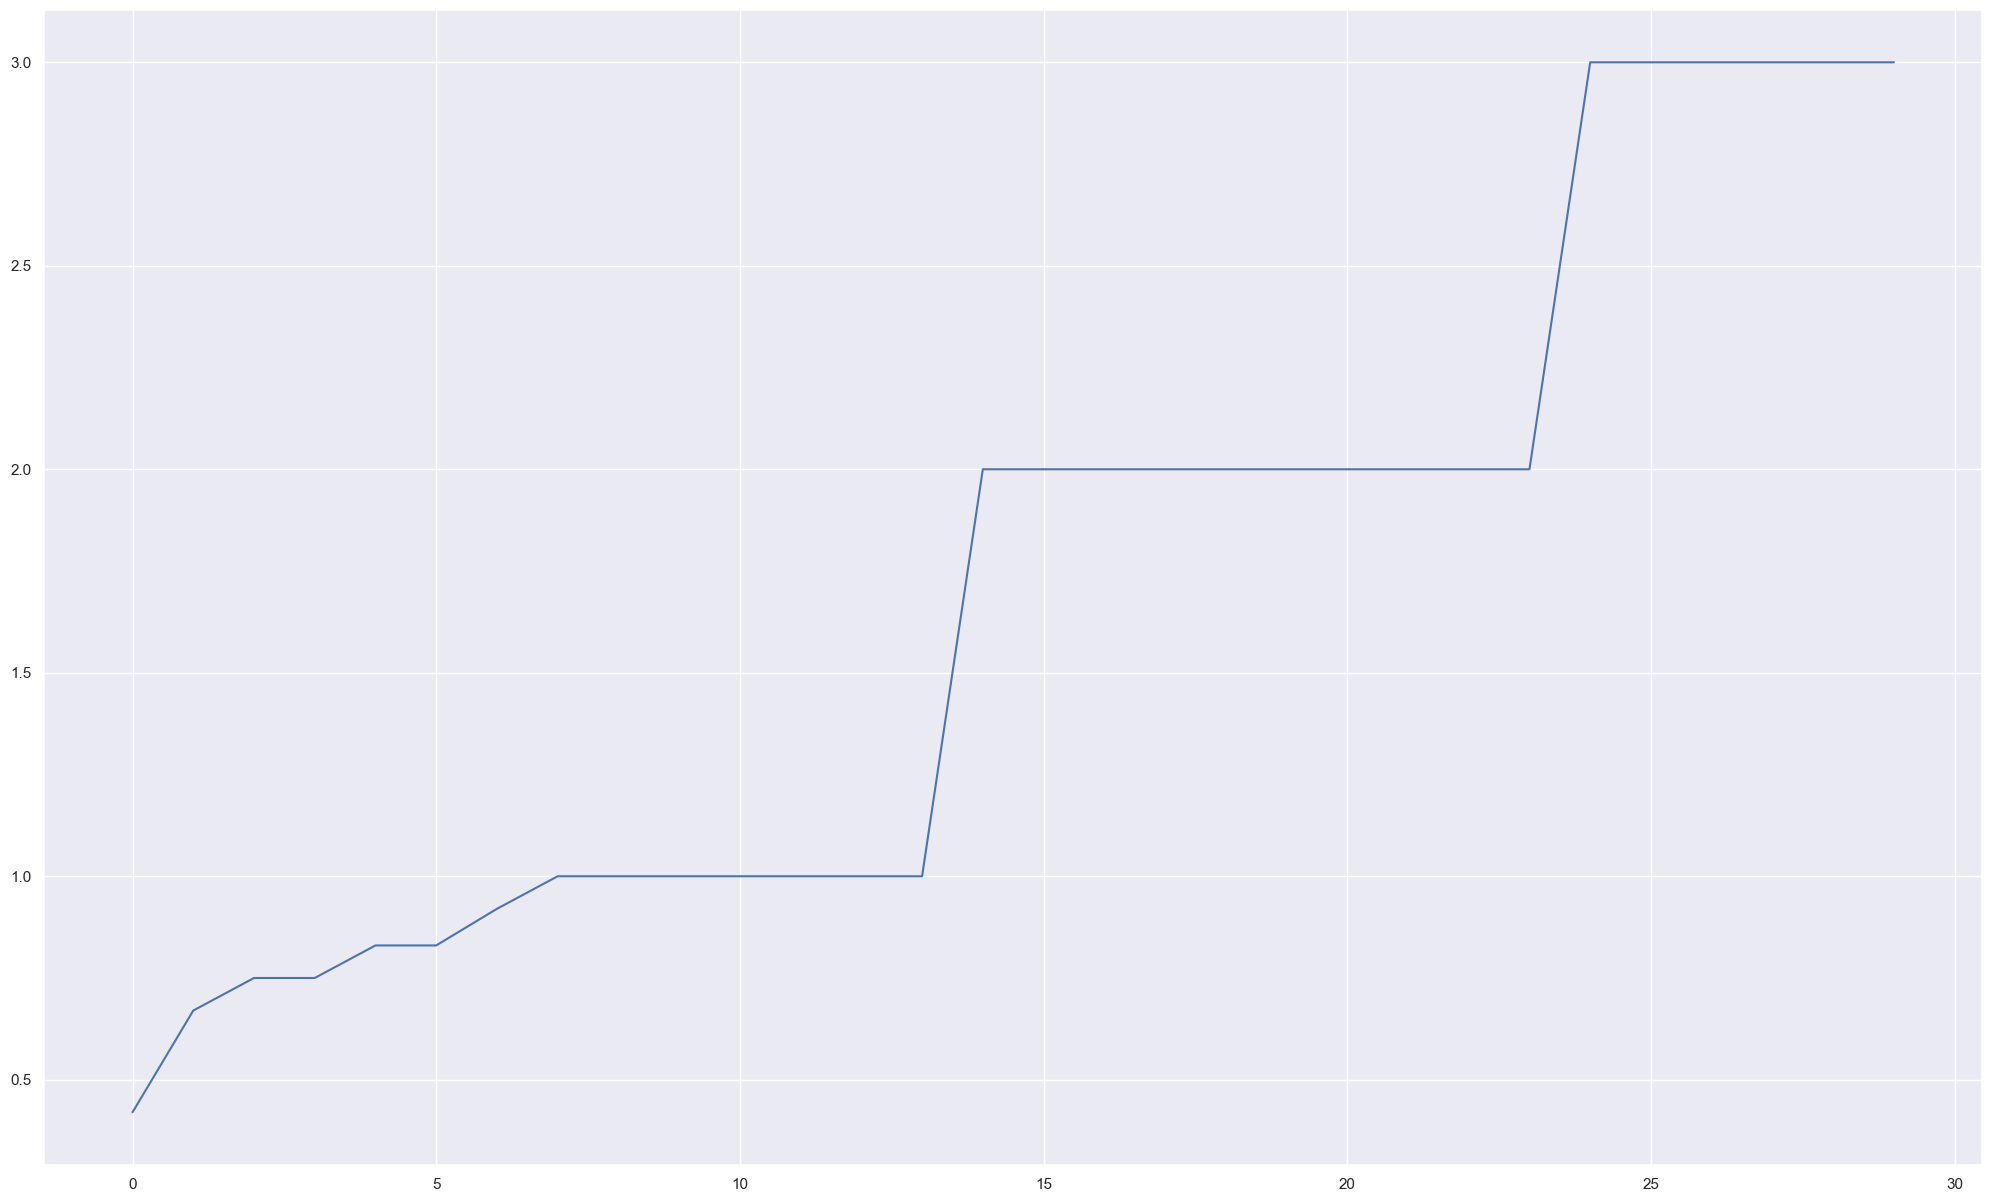

In [71]:
# show 30 youngest passengers
X_tmp = X.copy()
sorted_age = X_tmp.sort_values(by=['Age']).Age.values[:30]
person = [x for x in range(30)]

# plot
plt.plot(person, sorted_age)
plt.show()

Lista dodatnih atributa koji se mogu proslijediti linijskom grafu: https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D  
  
Pokažimo neke od njih.

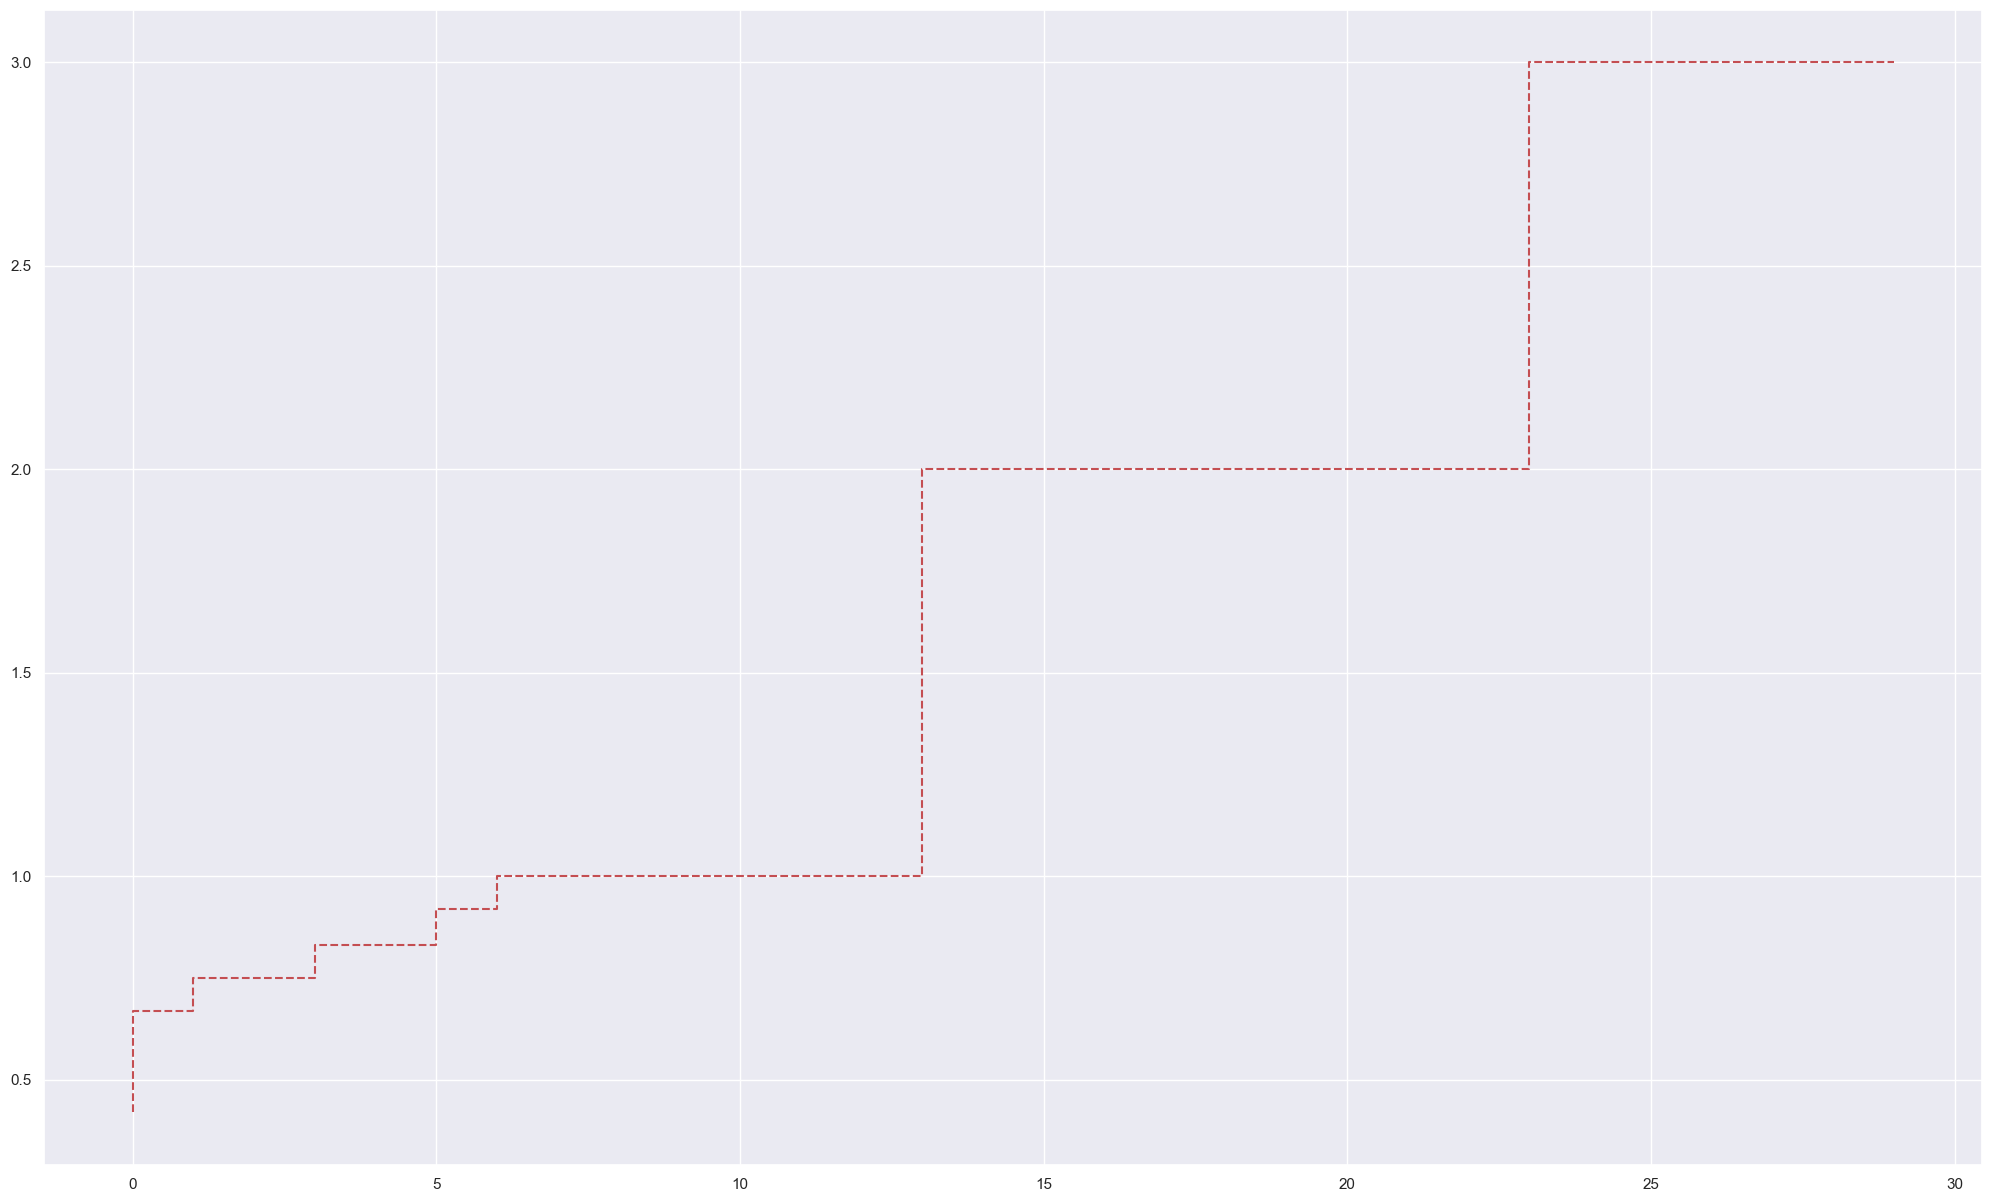

In [72]:
# show 30 youngest passengers
sorted_age = X_tmp.sort_values(by=['Age']).Age.values[:30]
person = [x for x in range(30)]

# plot
plt.plot(person, sorted_age, c='r', linestyle='--', ds='steps')
plt.show()

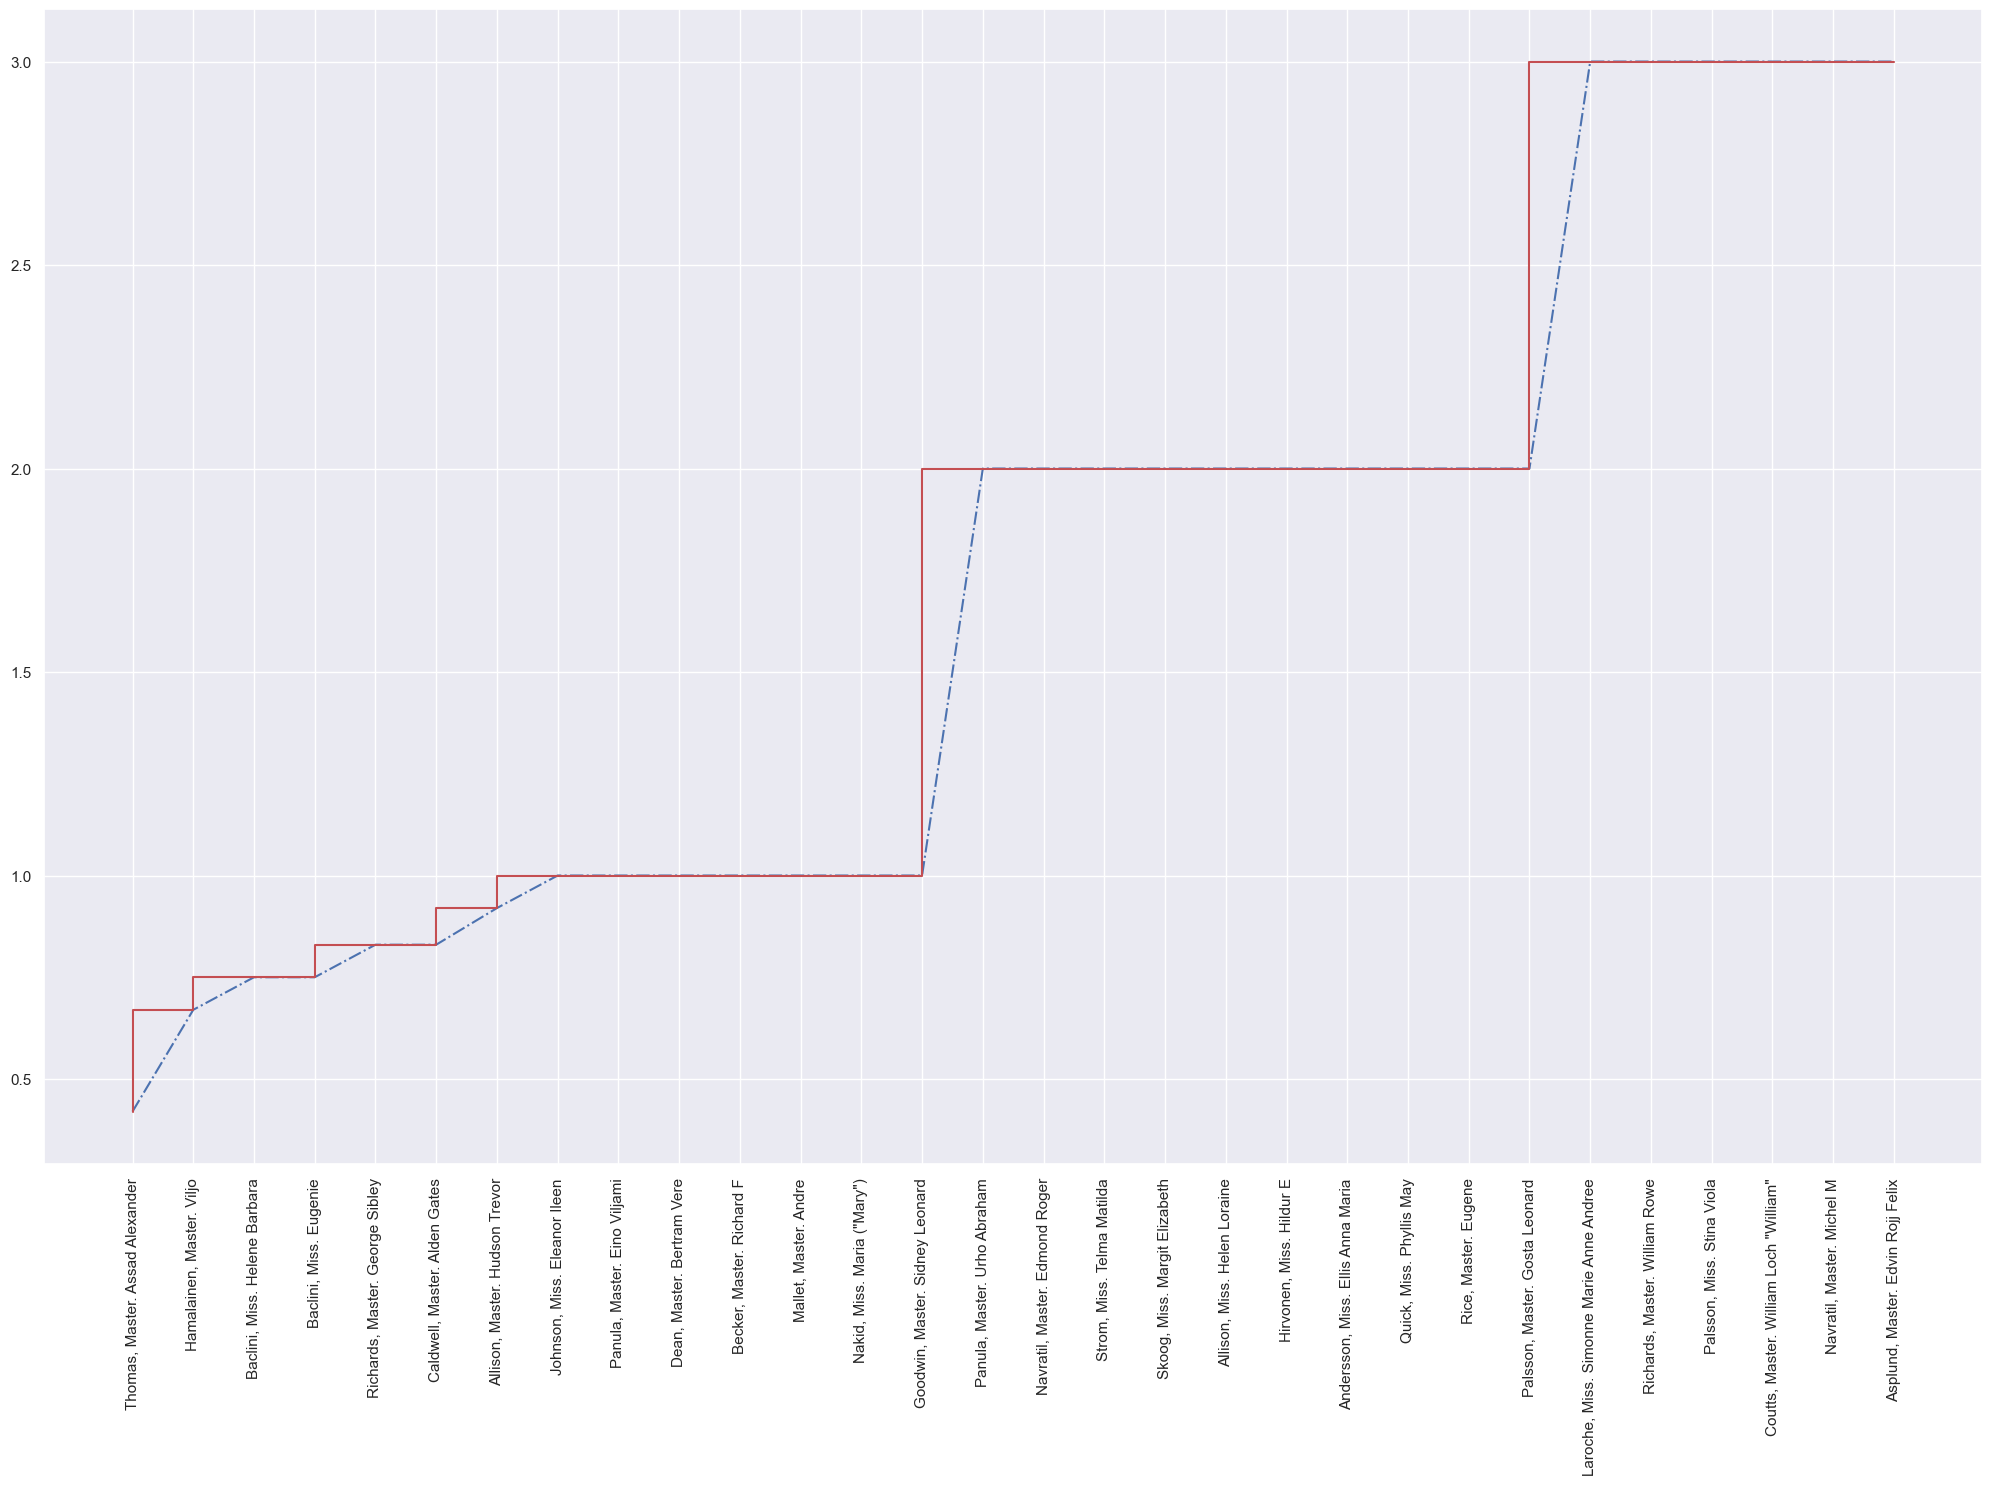

In [73]:
# show 30 youngest passengers
sorted_age = X_tmp.sort_values(by=['Age']).Age.values[:30]
names = X_tmp.sort_values(by=['Age']).Name.values[:30]

# plot
plt.plot(names, sorted_age, c='b', linestyle='-.')
plt.plot(names, sorted_age, c='r', ds='steps')
plt.xticks(rotation=90)
plt.show()

### Graf raspršenja
Dokumentacija: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

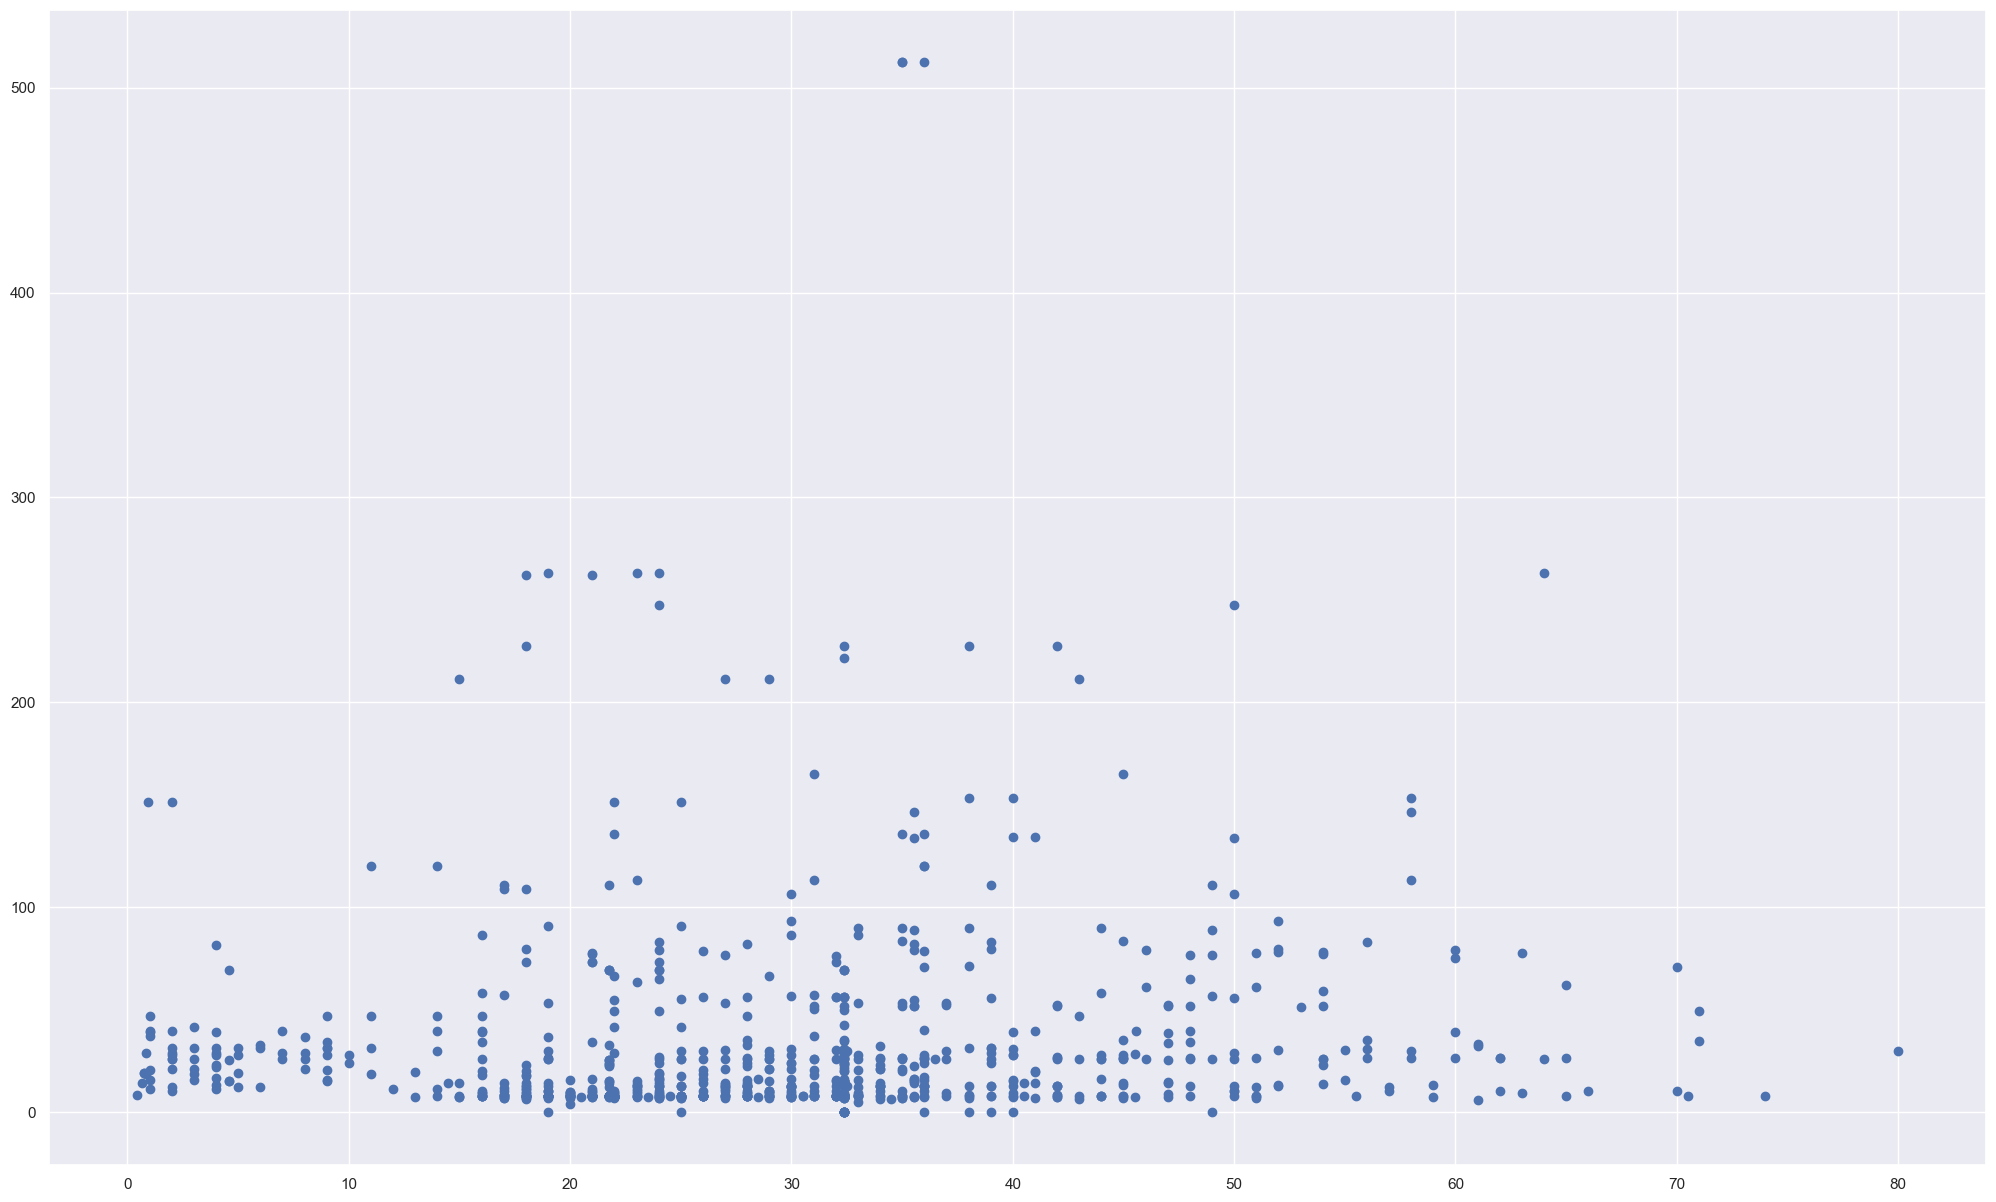

In [74]:
plt.scatter(X.Age, X.Fare)
plt.show()

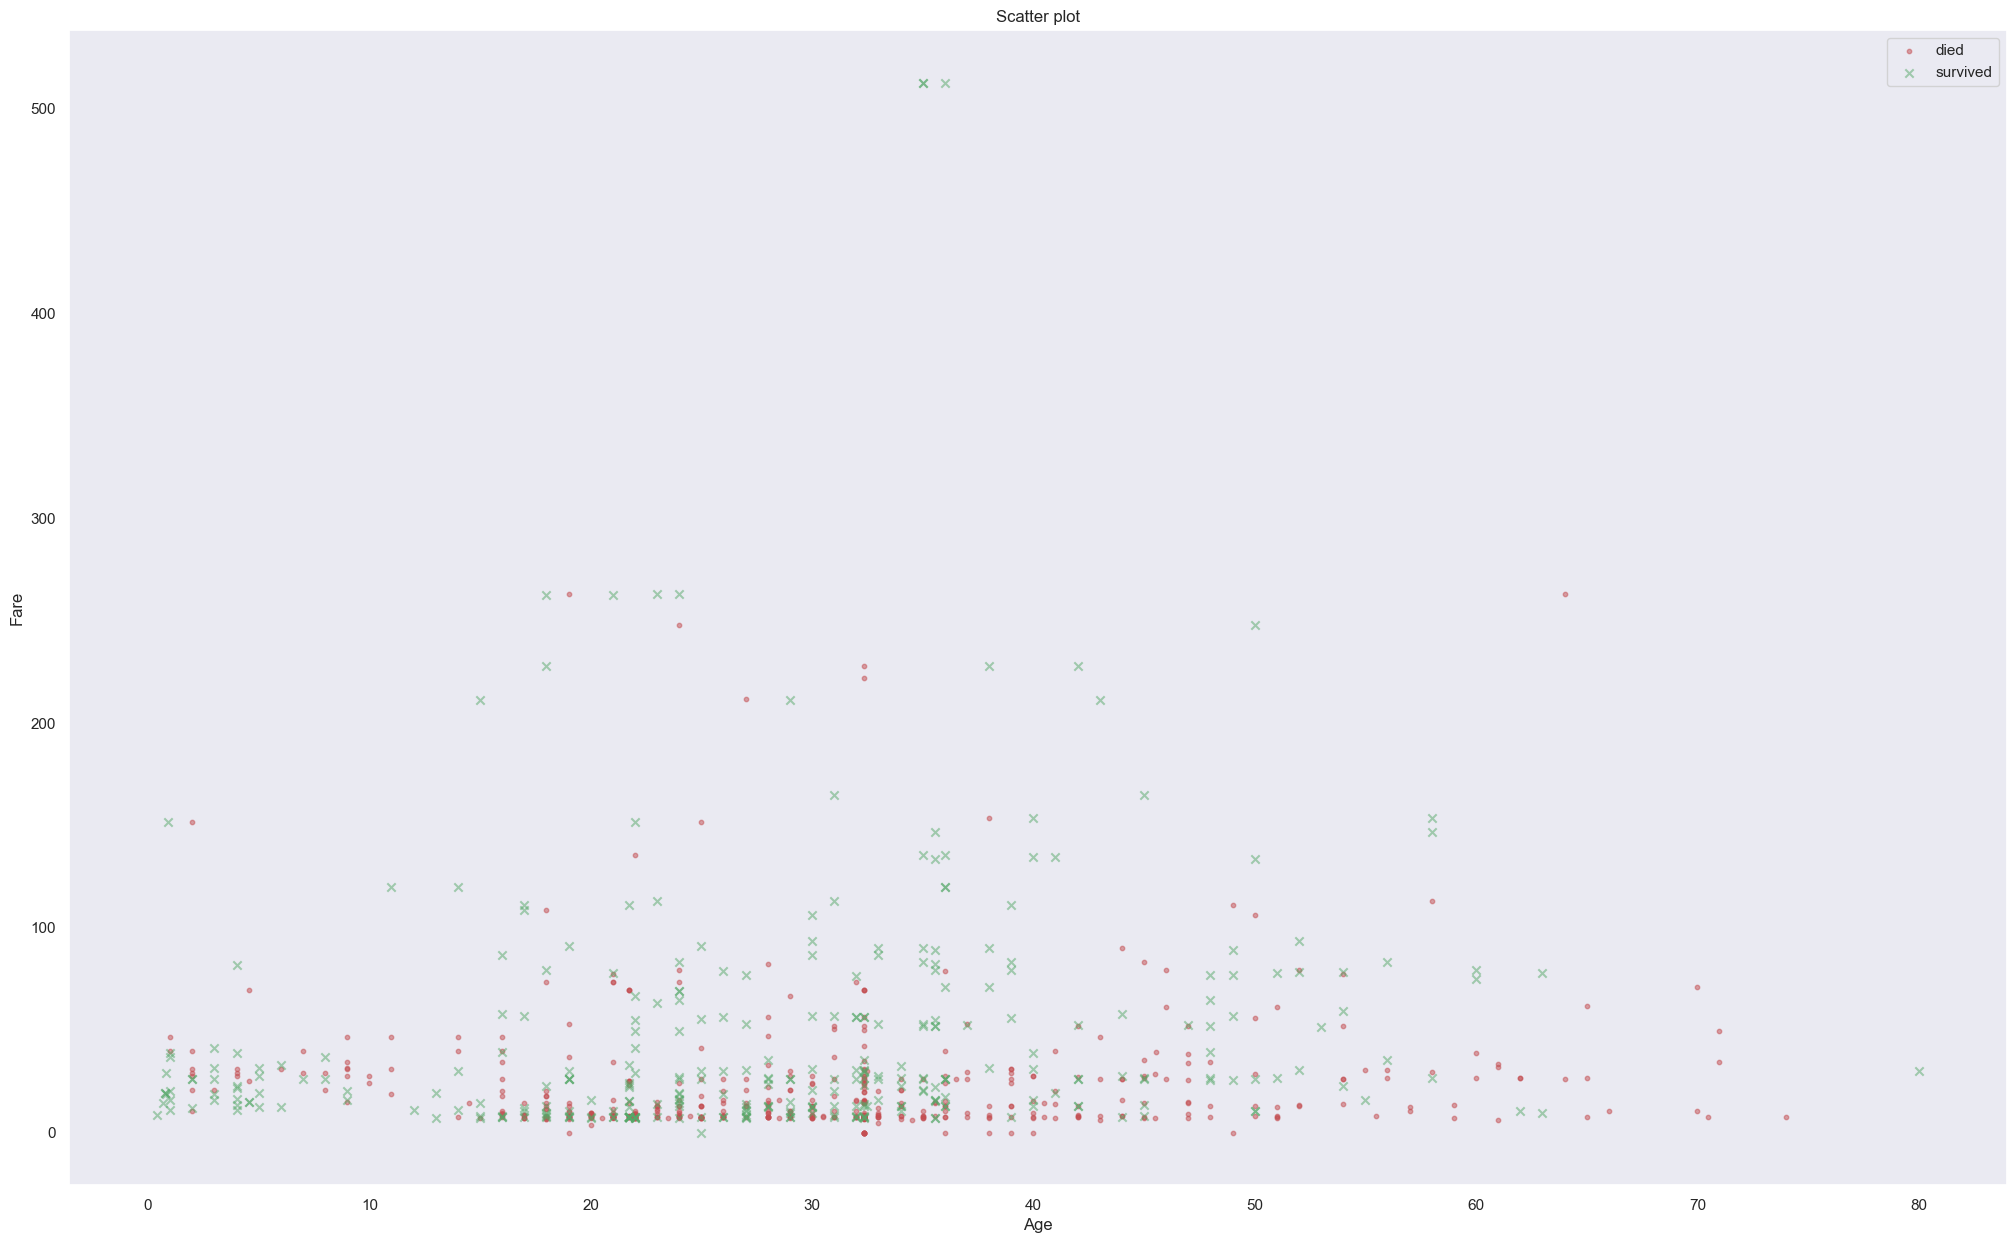

In [75]:
# mask
mask_survived = X.Survived == 1

# plot
plt.scatter(X.loc[~mask_survived,'Age'], X.loc[~mask_survived,'Fare'], s=10, alpha=0.5, c='r', label='died')
plt.scatter(X.loc[mask_survived,'Age'], X.loc[mask_survived,'Fare'], alpha=0.5, marker='x', c='g', label='survived')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter plot')
plt.grid()
plt.legend(loc='best')
plt.show()

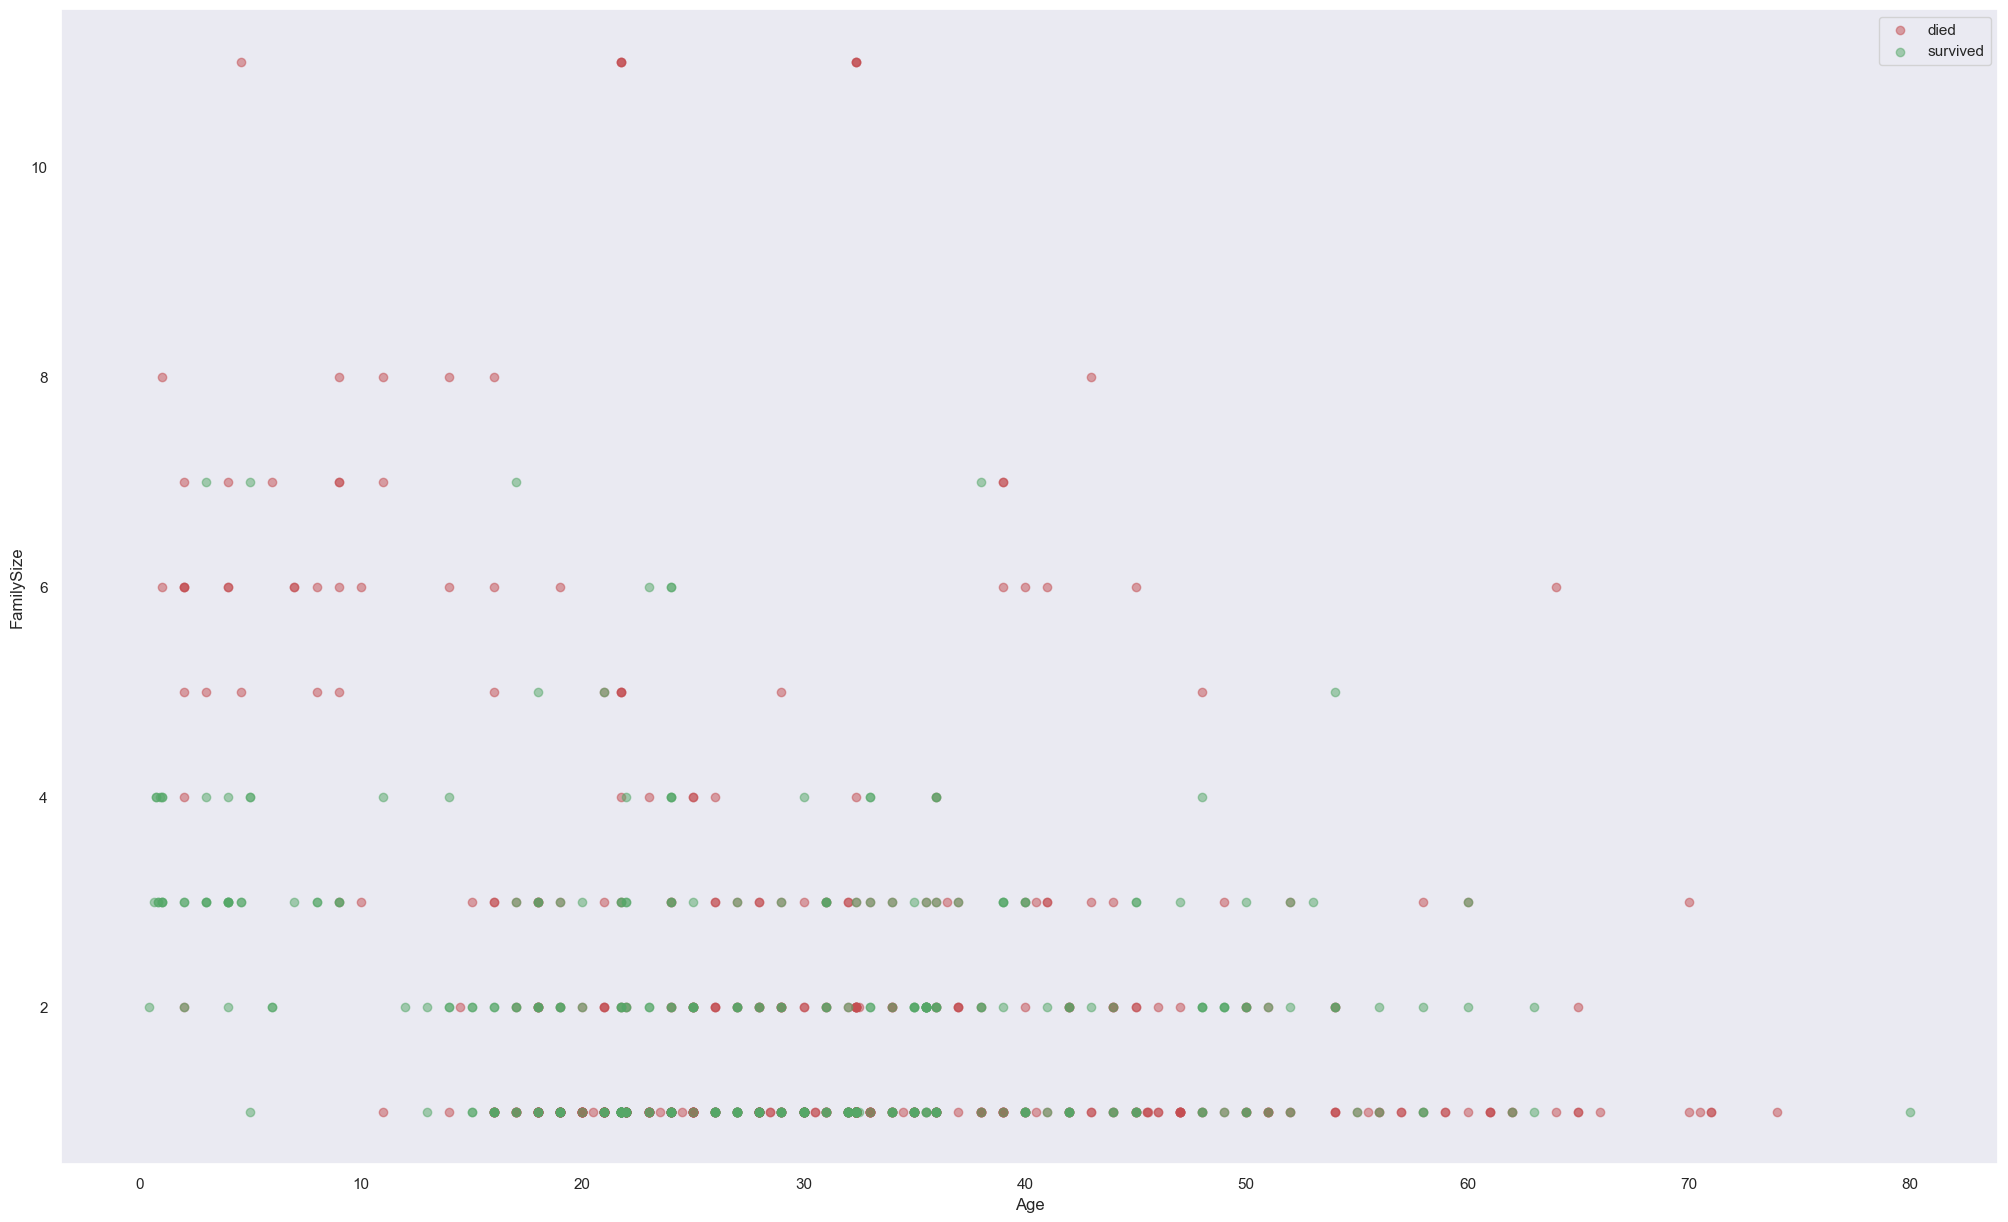

In [76]:
# mask
mask_survived = X.Survived == 1

# plot
plt.scatter(X.loc[~mask_survived,'Age'], X.loc[~mask_survived,'FamilySize'], alpha=0.5, c='r', label='died')
plt.scatter(X.loc[mask_survived,'Age'], X.loc[mask_survived,'FamilySize'], alpha=0.5, c='g', label='survived')
plt.xlabel('Age')
plt.ylabel('FamilySize')
plt.legend(loc='best')
plt.grid()
plt.show()

### Mjehuričasti graf
Radi se korištenjem scatter plota i specificiranjem atributa s (size).

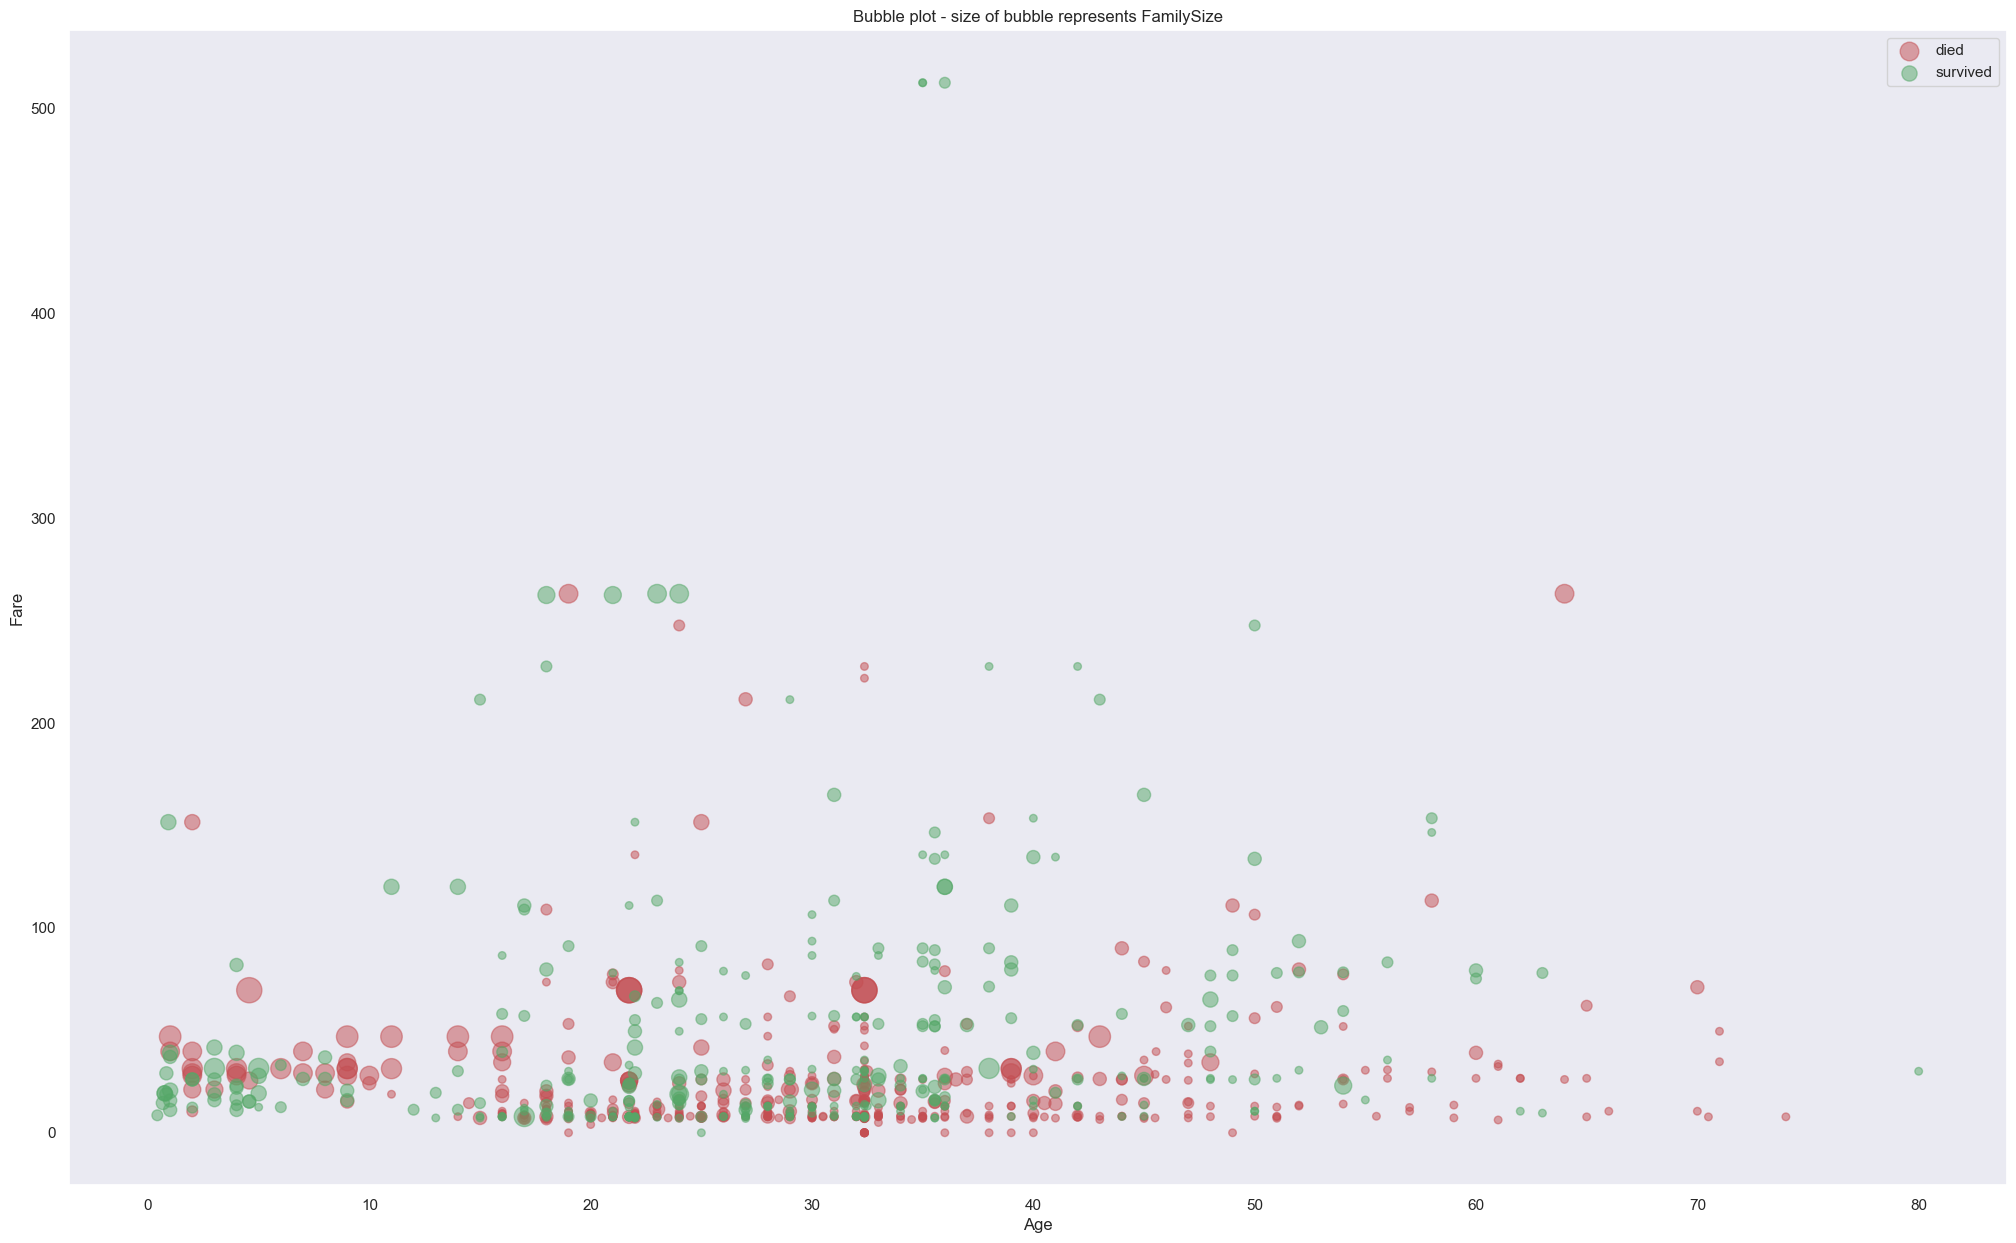

In [77]:
# mask
mask_survived = X.Survived == 1

# sizes
sizes = X.FamilySize*30

# plot
plt.scatter(X.loc[~mask_survived,'Age'], X.loc[~mask_survived,'Fare'], s=sizes[~mask_survived], alpha=0.5, c='r', label='died')
plt.scatter(X.loc[mask_survived,'Age'], X.loc[mask_survived,'Fare'], s=sizes[mask_survived], alpha=0.5, c='g', label='survived')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Bubble plot - size of bubble represents FamilySize')
plt.grid()
plt.legend(loc='best')
plt.show()

### Više grafova u istom prikazu - subplot
Dokumentacija: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

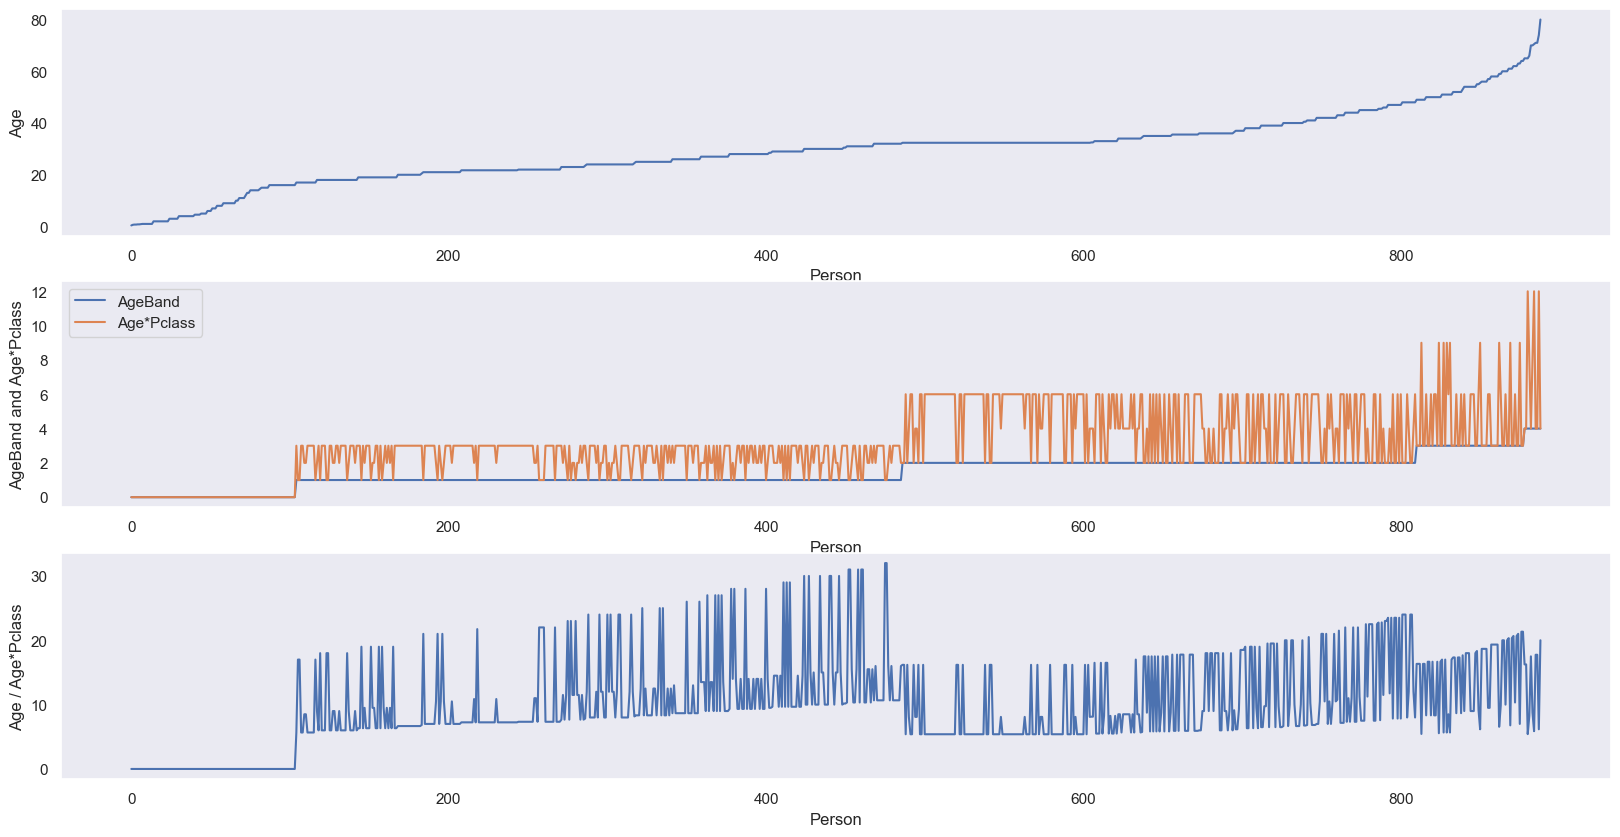

In [78]:
# data
X_tmp = X.copy()
X_tmp = X_tmp.sort_values(by=['Age'])

# plot

# define axes
fig, ax = plt.subplots(3,1, figsize=(20,10)) 

# fill axis 0
ax[0].plot([x for x in range(len(X_tmp))], X_tmp.Age)
ax[0].grid()
ax[0].set_ylabel('Age')
ax[0].set_xlabel('Person')

# fill axis 1
ax[1].plot([x for x in range(len(X_tmp))], X_tmp.AgeBand, label='AgeBand')
ax[1].plot([x for x in range(len(X_tmp))], X_tmp.loc[:,'Age*Pclass'], label='Age*Pclass')
ax[1].grid()
ax[1].legend(loc='best')
ax[1].set_ylabel('AgeBand and Age*Pclass')
ax[1].set_xlabel('Person')

# fill axis 2
ax[2].plot([x for x in range(len(X_tmp))],  np.where(X_tmp.loc[:,'Age*Pclass']== 0, 0, X_tmp.Age / X_tmp.loc[:,'Age*Pclass']))
ax[2].grid()
ax[2].set_ylabel('Age / Age*Pclass')
ax[2].set_xlabel('Person')

plt.show()

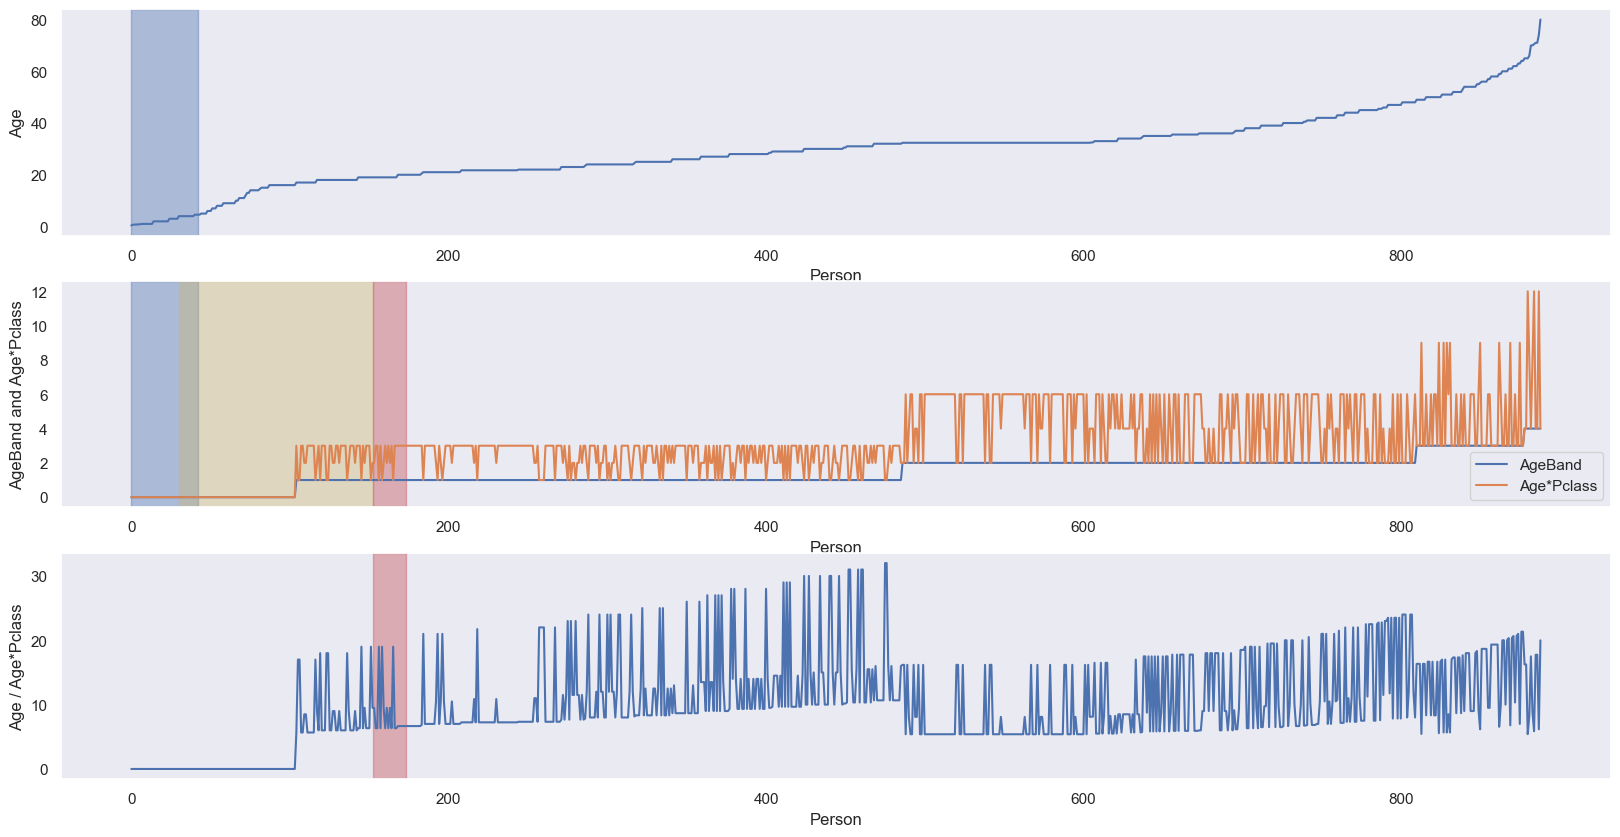

In [79]:
# define axes
fig, ax = plt.subplots(3,1, figsize=(20,10)) 

# plot to axis 0
ax[0].plot([x for x in range(len(X_tmp))], X_tmp.Age)
ax[0].grid()
ax[0].set_ylabel('Age')
ax[0].set_xlabel('Person')

# plot to axis 1
ax[1].plot([x for x in range(len(X_tmp))], X_tmp.AgeBand, label='AgeBand')
ax[1].plot([x for x in range(len(X_tmp))], X_tmp.loc[:,'Age*Pclass'], label='Age*Pclass')
ax[1].grid()
ax[1].legend(loc='best')
ax[1].set_ylabel('AgeBand and Age*Pclass')
ax[1].set_xlabel('Person')

# plot to axis 2
ax[2].plot([x for x in range(len(X_tmp))], np.where(X_tmp.loc[:,'Age*Pclass']== 0, 0, X_tmp.Age / X_tmp.loc[:,'Age*Pclass']))
ax[2].grid()
ax[2].set_ylabel('Age / Age*Pclass')
ax[2].set_xlabel('Person')

# fill (random) area
ax[0].axvspan(0, 42, color='b', alpha=0.4)
ax[1].axvspan(0, 42, color='b', alpha=0.4)
ax[1].axvspan(30, 152, color='y', alpha=0.4)
ax[1].axvspan(152, 173, color='r', alpha=0.4)
ax[2].axvspan(152, 173, color='r', alpha=0.4)

plt.show()

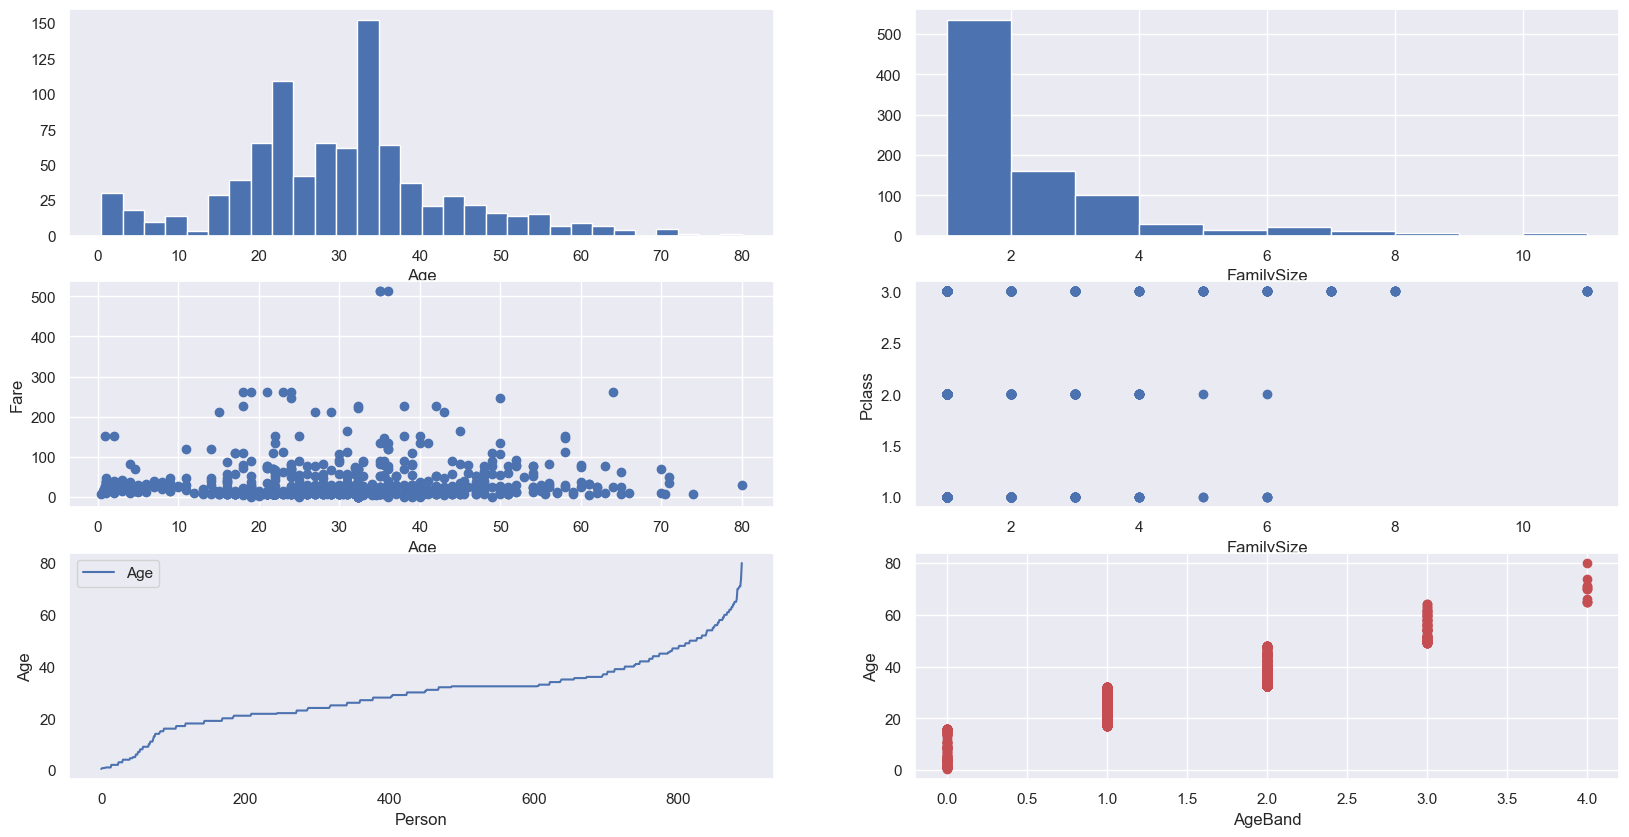

In [80]:
# define axes
fig, ax = plt.subplots(3,2, figsize=(20,10)) 

ax[0,0].hist(X_tmp.Age, bins=30)
ax[0,0].grid()
ax[0,0].set_xlabel('Age')

ax[1,0].scatter(X_tmp.Age, X_tmp.Fare)
ax[1,0].set_xlabel('Age')
ax[1,0].set_ylabel('Fare')

ax[2,0].plot([x for x in range(len(X_tmp))], X_tmp.Age, label='Age')
ax[2,0].set_ylabel('Age')
ax[2,0].set_xlabel('Person')
ax[2,0].legend(loc='best')
ax[2,0].grid()

ax[0,1].hist(X_tmp.FamilySize)
ax[0,1].set_xlabel('FamilySize')

ax[1,1].scatter(X_tmp.FamilySize, X_tmp.Pclass)
ax[1,1].set_xlabel('FamilySize')
ax[1,1].set_ylabel('Pclass')
ax[1,1].grid()

ax[2,1].scatter(X_tmp.AgeBand, X_tmp.Age, color='r')
ax[2,1].set_xlabel('AgeBand')
ax[2,1].set_ylabel('Age')

plt.show()

### Konture
Dokumentacija: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html  
Kako bismo demonstrirali konture, kreirat ćemo sintetički skup podataka, napraviti klasifikaciju KNN algoritmom i prikazati granicu razdvajanja između dvaju razreda.

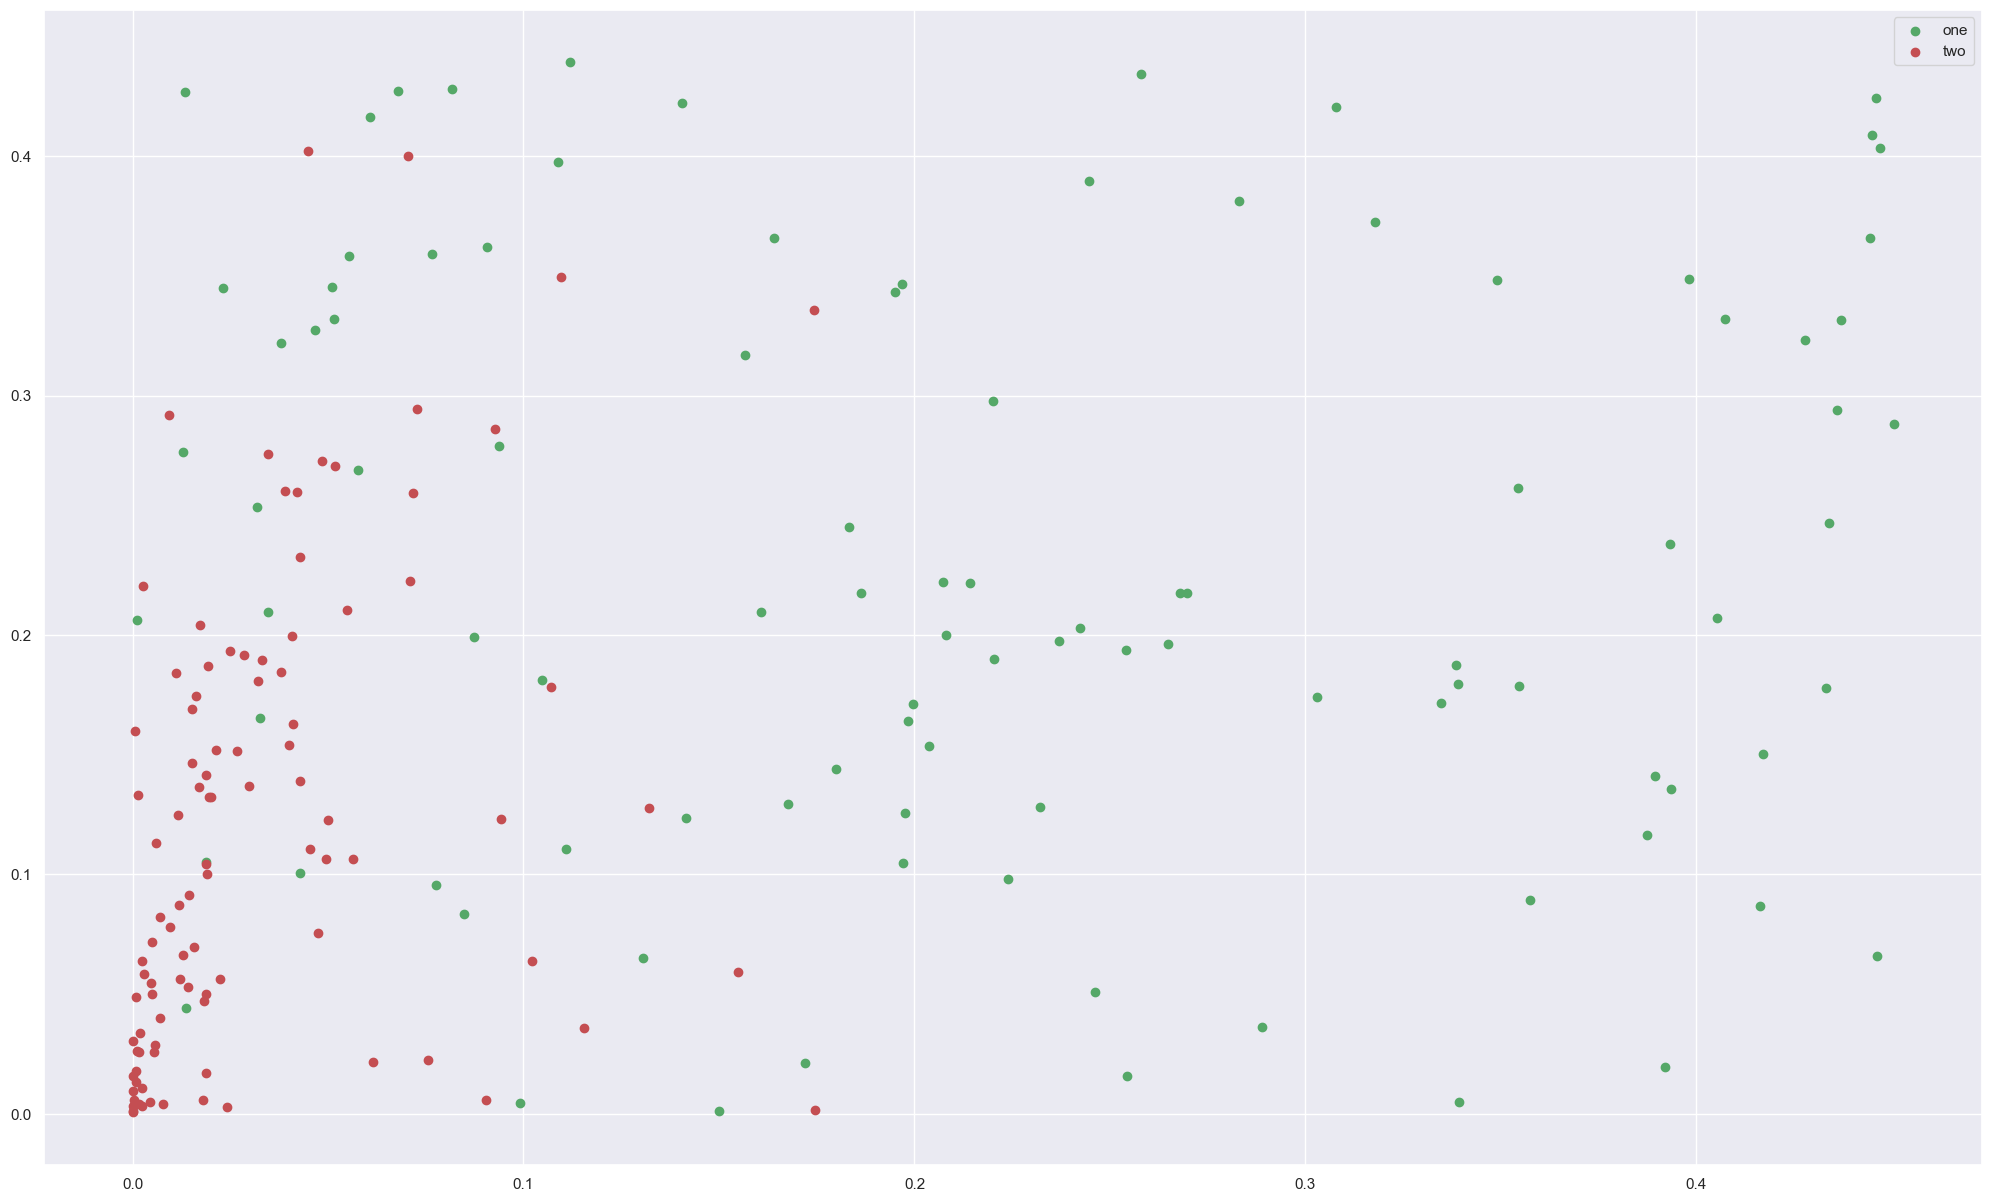

In [81]:
# Za ovaj primjer kreirat ćemo sintetički skup podataka
x1 = np.random.rand(100,2)/2.2
x2 = np.random.rand(100,2)
x2[:,0] = x2[:,0]*x1[:,1]*x1[:,1]
x2[:,1] = x2[:,1]*x1[:,1]

x = np.concatenate((x1,x2))
true = np.zeros((200,))
true[100:] = 1

df = pd.DataFrame({'x':x[:,0], 'y':x[:,1], 'true':true})
df = df.sample(frac=1).reset_index(drop=True)
XX = df.loc[:,['x', 'y']]
yy = df.loc[:,'true']

# Prikažimo podatke
plt.scatter(x1[:,0],x1[:,1],color='g', label='one')
plt.scatter(x2[:,0],x2[:,1],color='r', label='two')
plt.legend(loc='best')
plt.show()

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(XX, yy, test_size = 0.25)

classifier = KNeighborsClassifier(n_neighbors = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[29  4]
 [ 5 12]]


C:\Users\matij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


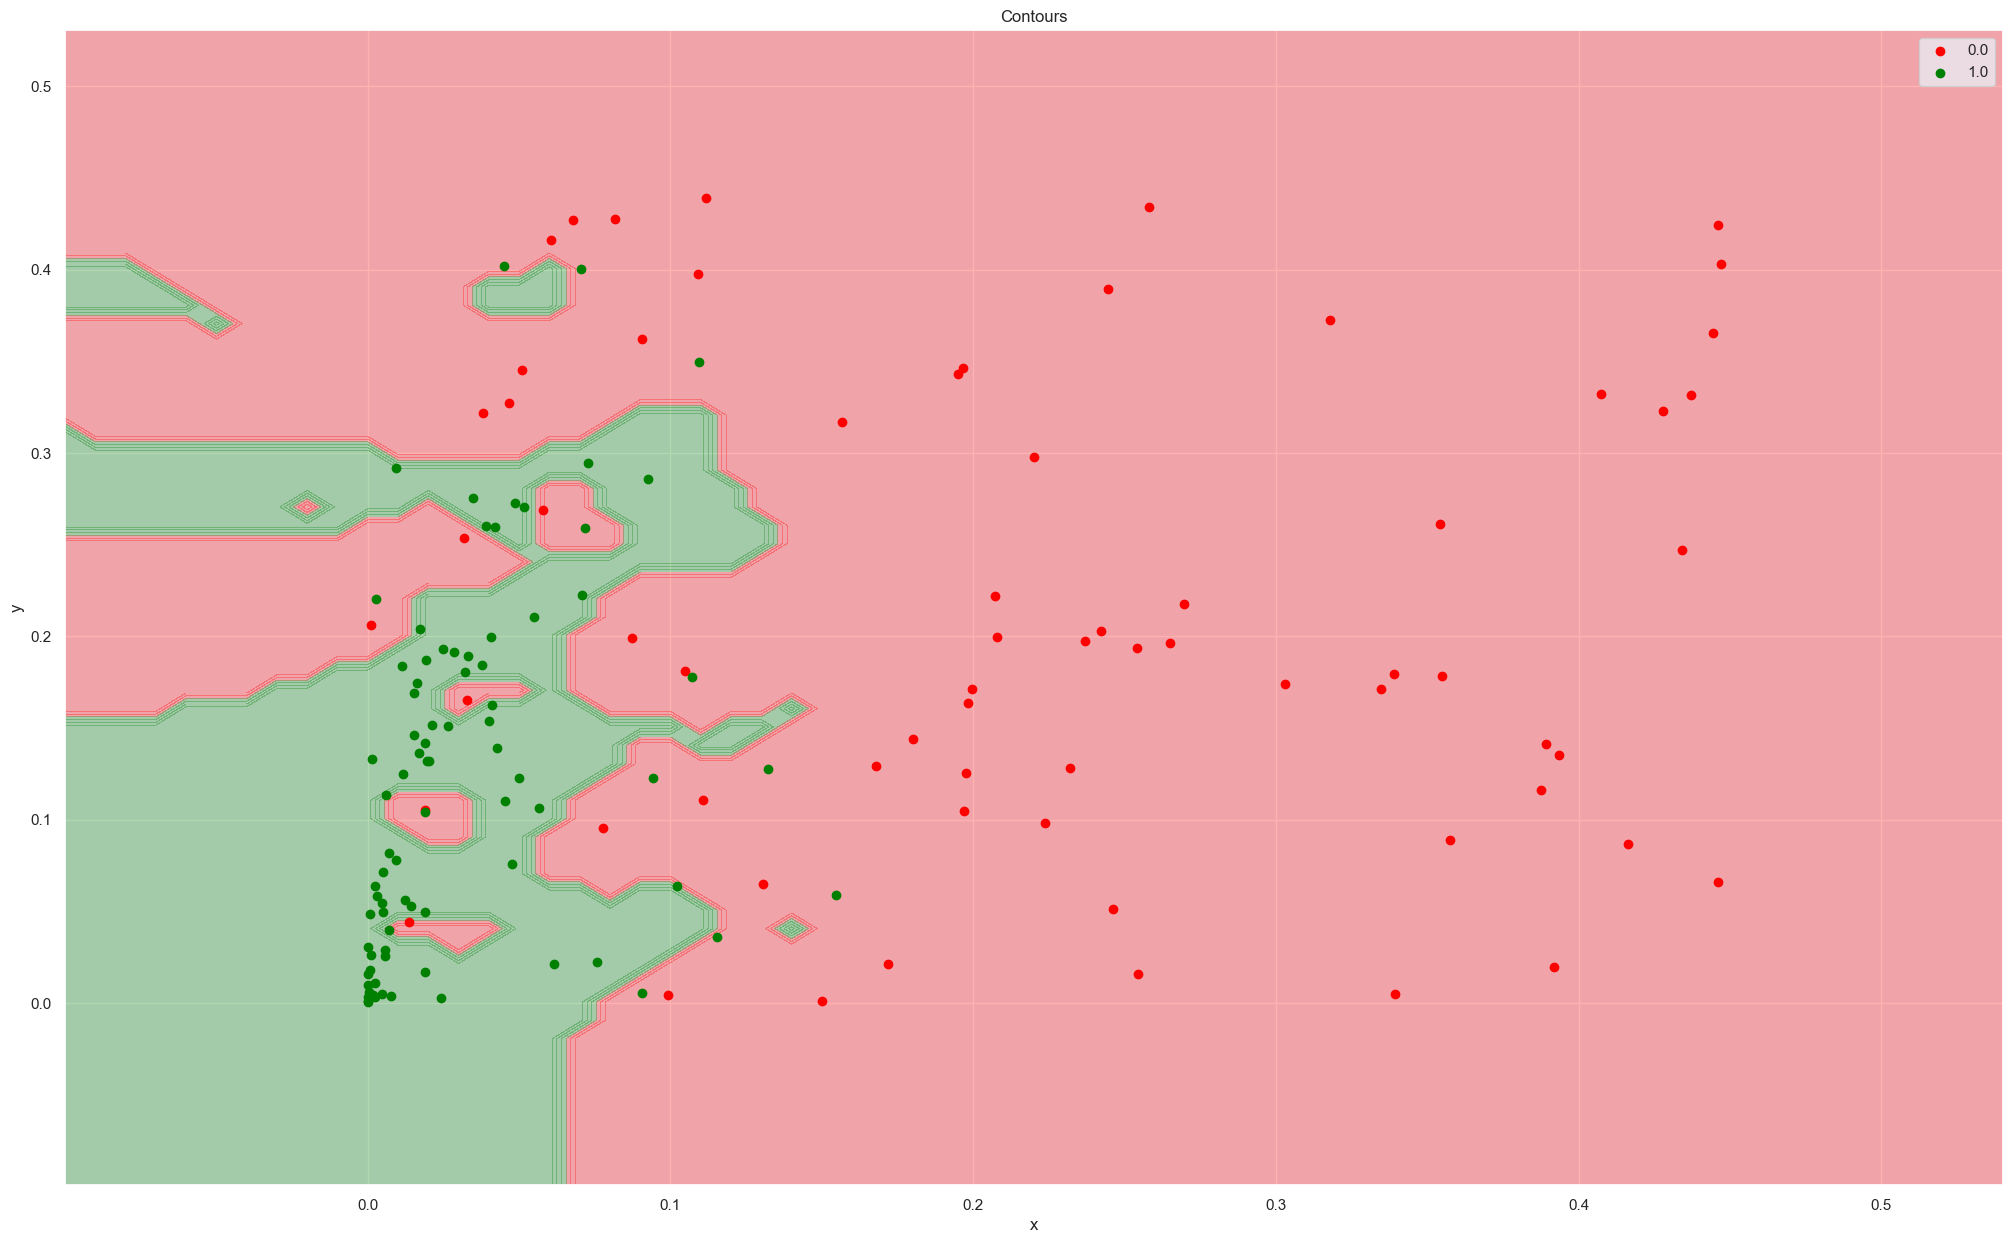

In [83]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train.values, y_train.values
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 0.1, stop = X_set[:, 0].max() + 0.1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 0.1, stop = X_set[:, 1].max() + 0.1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.3, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Contours')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.show()

In [84]:
X_train, X_test, y_train, y_test = train_test_split(XX, yy, test_size = 0.25)

classifier = KNeighborsClassifier(n_neighbors = 15)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[23  4]
 [ 3 20]]


C:\Users\matij\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


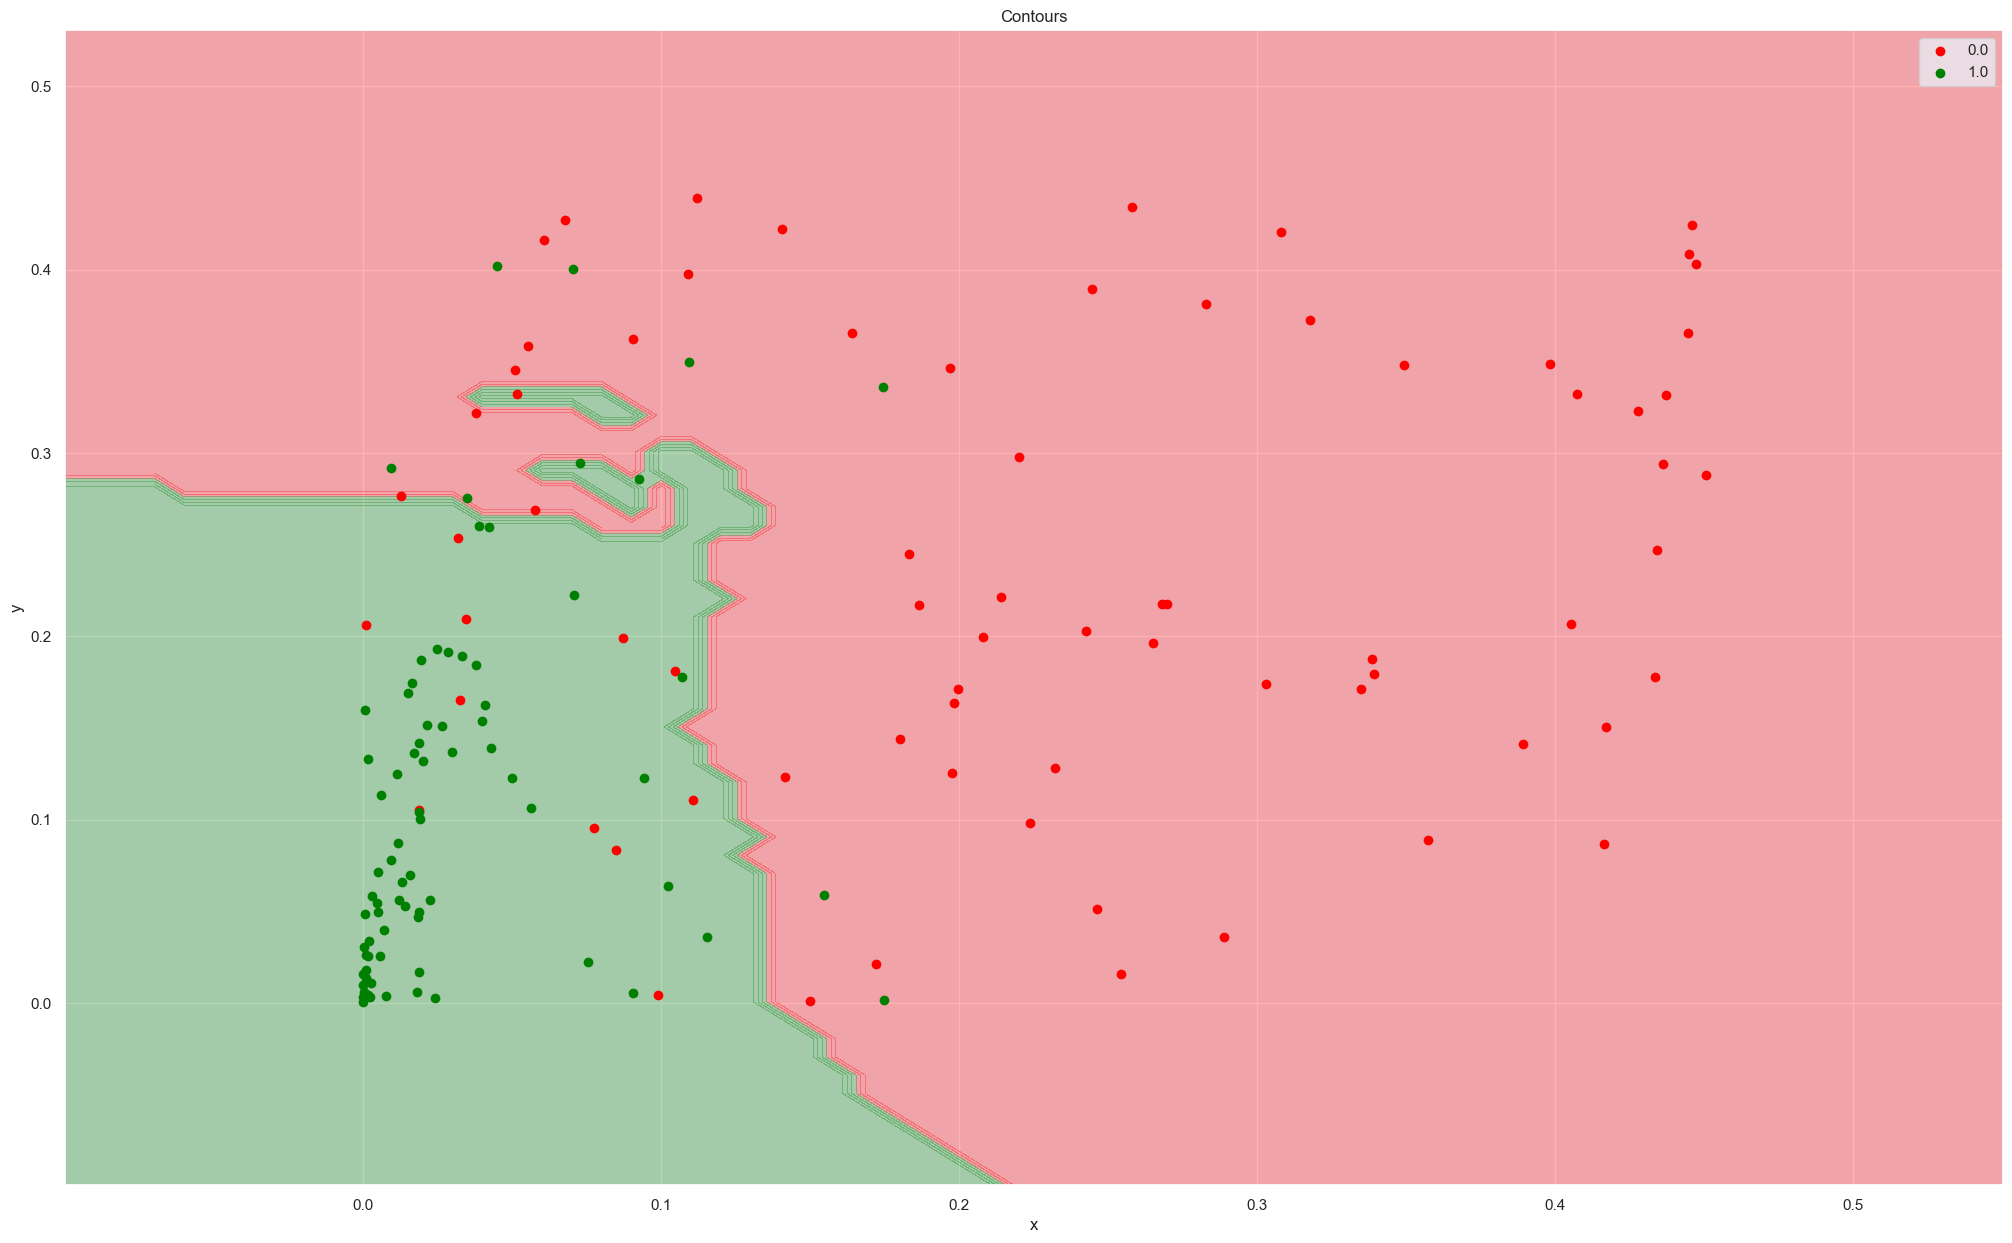

In [85]:
X_set, y_set = X_train.values, y_train.values
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 0.1, stop = X_set[:, 0].max() + 0.1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 0.1, stop = X_set[:, 1].max() + 0.1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.3, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Contours')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.show()

### 3D 
U sklopu ove vježbe nećemo prikazivati primjere 3D grafova. Za one koje zanimaju 3D grafovi - https://matplotlib.org/stable/gallery/index.html#mplot3d-examples-index

### Dodatni primjeri
Za one koji žele znati više, preporučamo službene tutorijale - https://matplotlib.org/stable/tutorials/index.html

# Seaborn
Biblioteka za vizualizaciju temeljena na Matplotlibu. Matplotlib može sve što može Seaborn (i puno više od toga), ali Seaborn zahtijeva manje linija kôda za isti rezultat.  
Dokumentacija: https://seaborn.pydata.org/

### Toplinska mapa
Dokumentacija: https://seaborn.pydata.org/generated/seaborn.heatmap.html

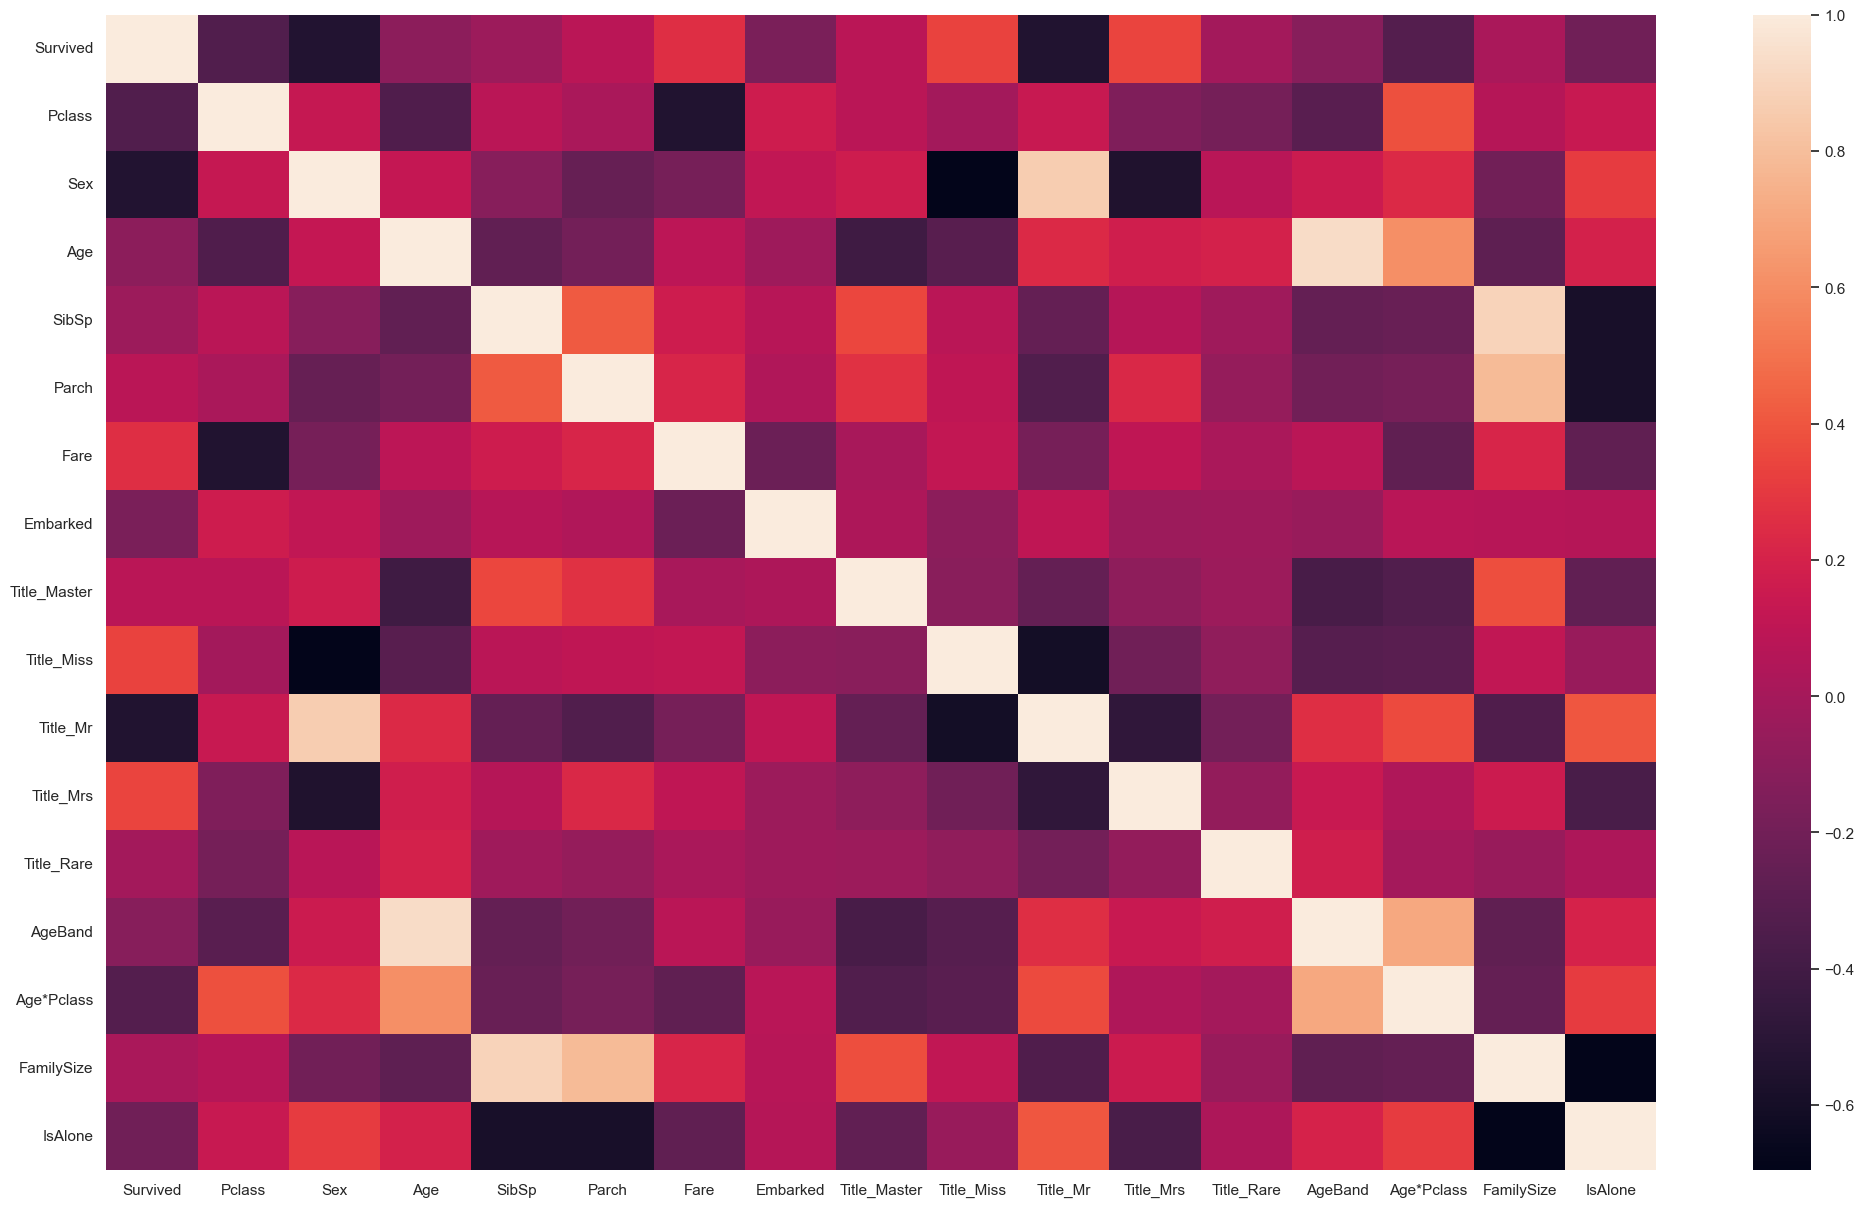

In [86]:
X_numeric = X.loc[:,~X.columns.isin(['Name', 'Ticket', 'Cabin', 'Title'])]
sns.heatmap(X_numeric.corr())
plt.show()

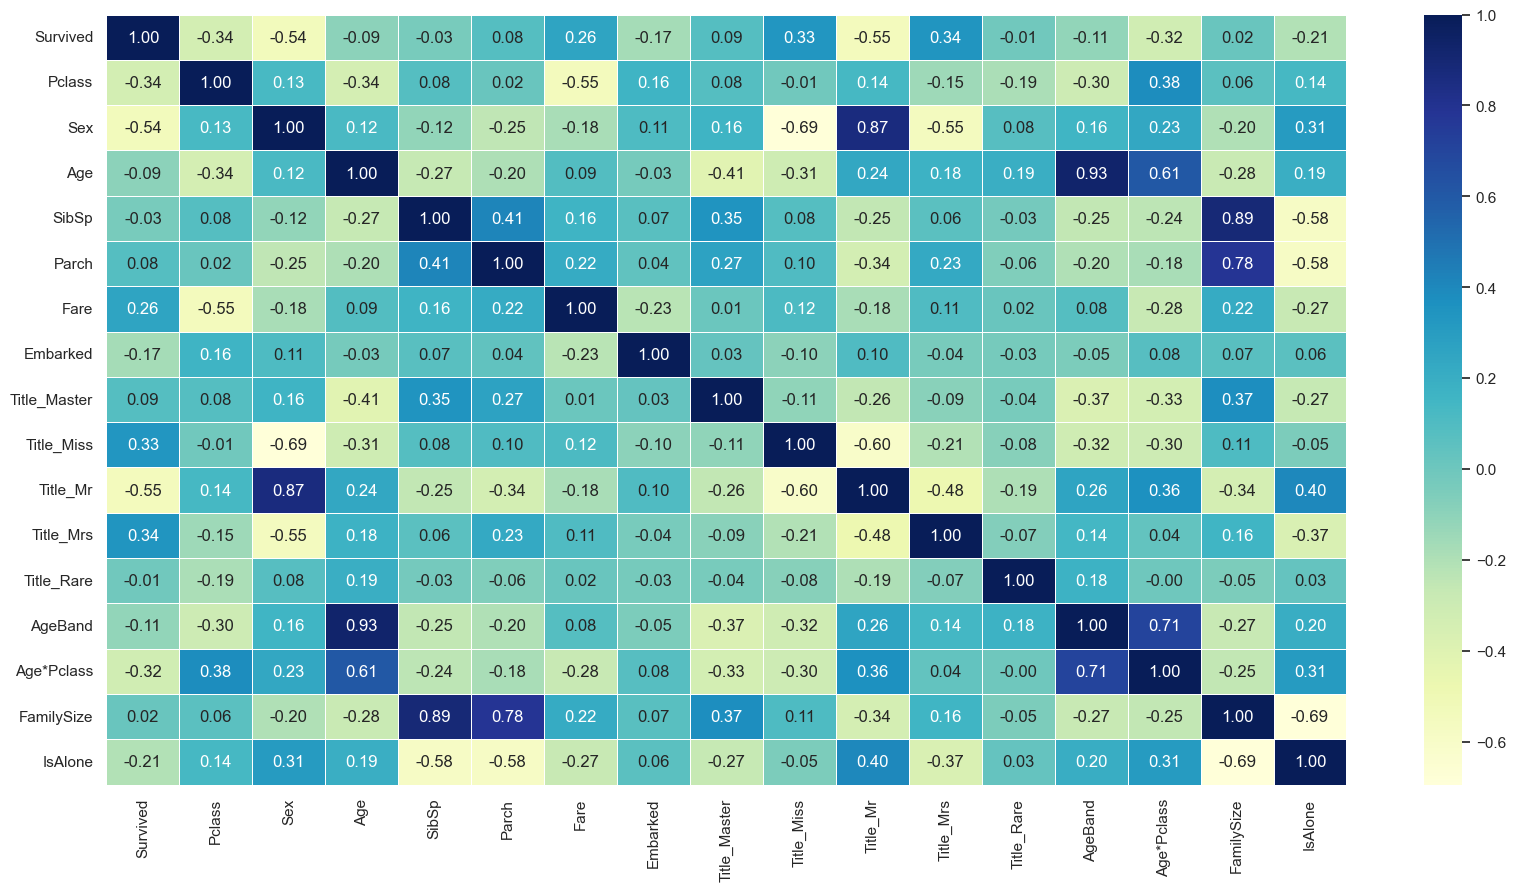

In [87]:
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(X_numeric.corr(), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
plt.show()

Korištenjem Seaborna možemo napraviti graf toplinske mape pomoću jedne linije koda, a na sljedećem linku možete vidjeti primjere koliko je linija koda potrebno za isti posao korištenjem Matplotliba - https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html

### Matrica dijagrama raspršenja
Dokumentacija: https://seaborn.pydata.org/generated/seaborn.pairplot.html

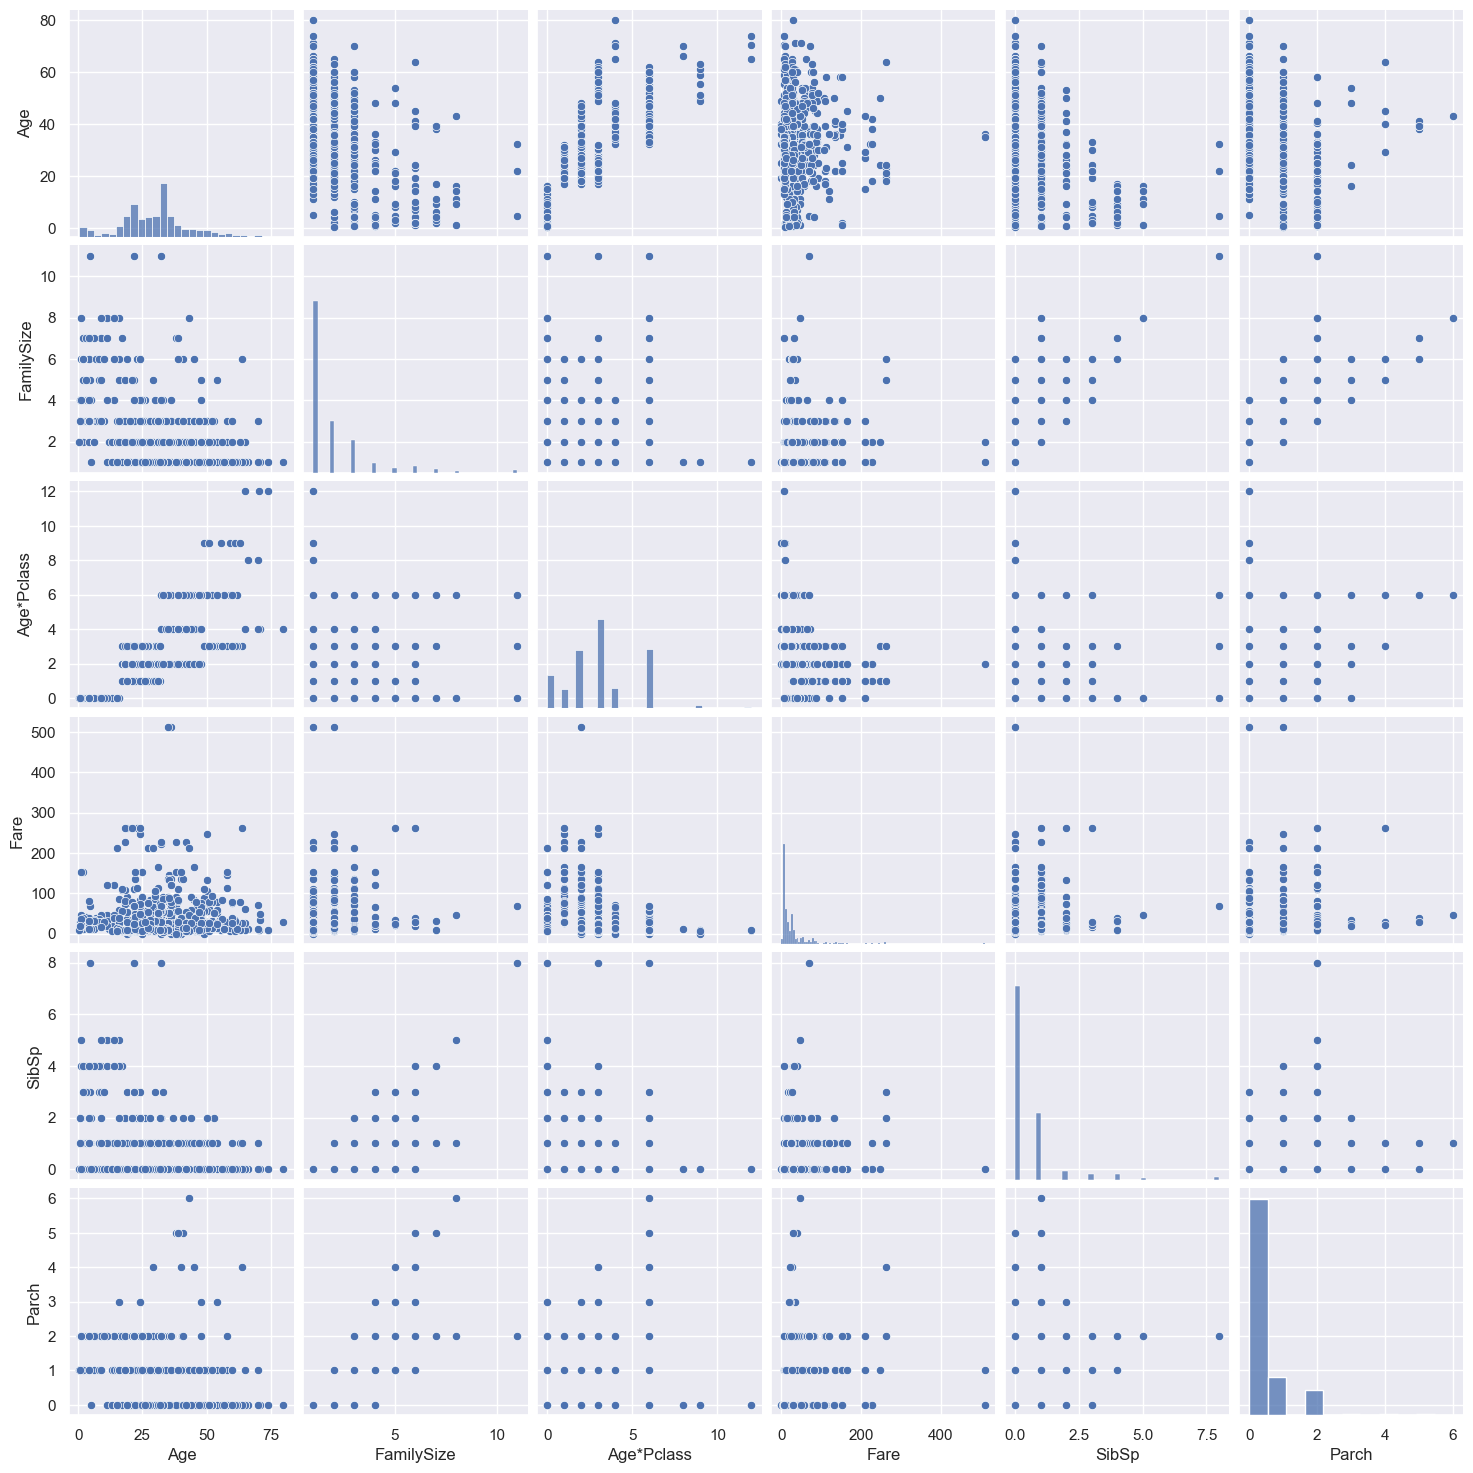

In [88]:
sns.set(rc={'figure.figsize':(25,15)})
sns.pairplot(X.loc[:,['Age', 'FamilySize', 'Age*Pclass', 'Fare', 'SibSp', 'Parch']])
plt.show()

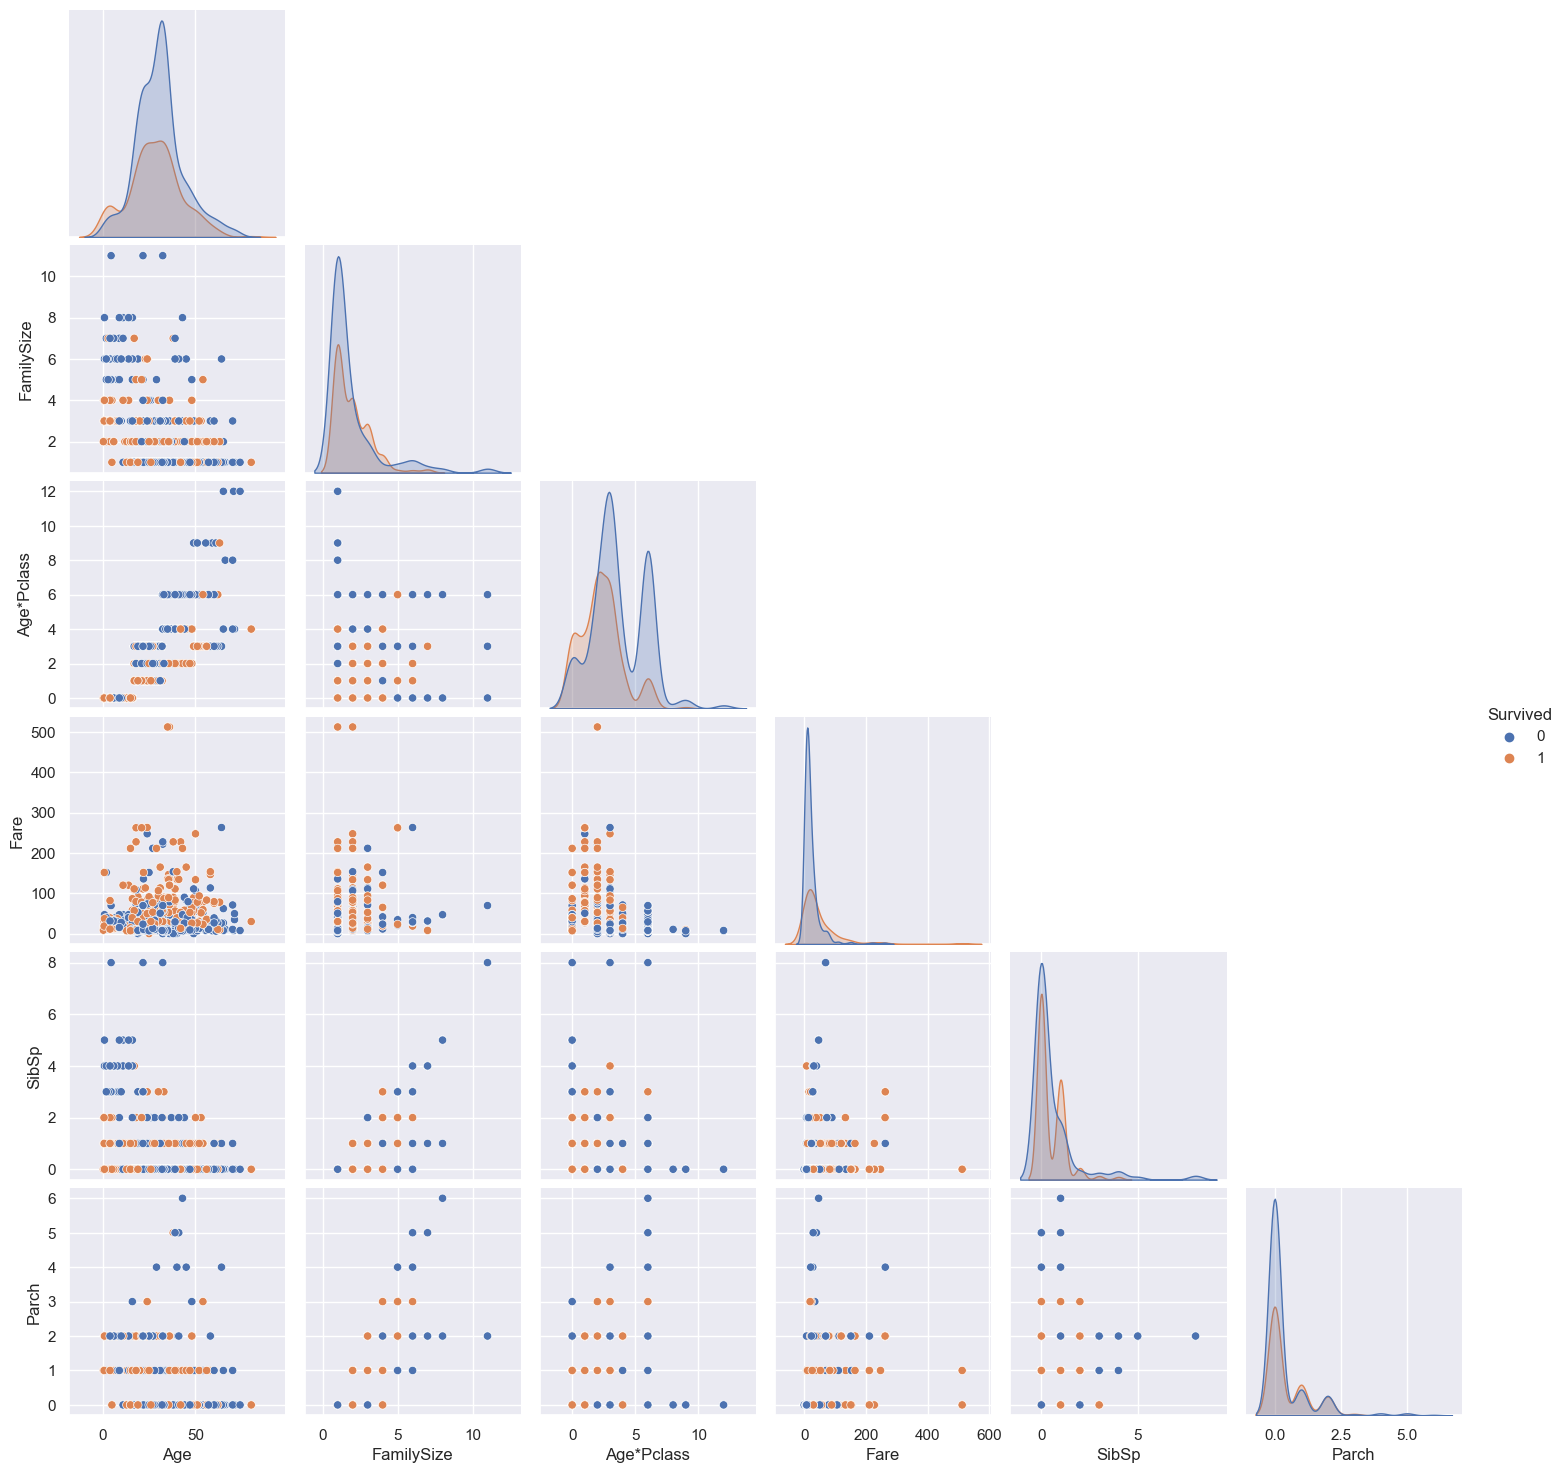

In [89]:
sns.set(rc={'figure.figsize':(25,15)})
sns.pairplot(X.loc[:,['Age', 'FamilySize', 'Age*Pclass', 'Fare', 'SibSp', 'Parch', 'Survived']], hue="Survived", corner=True)
plt.show()

### Violinski plot
Dokumentacija: https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot

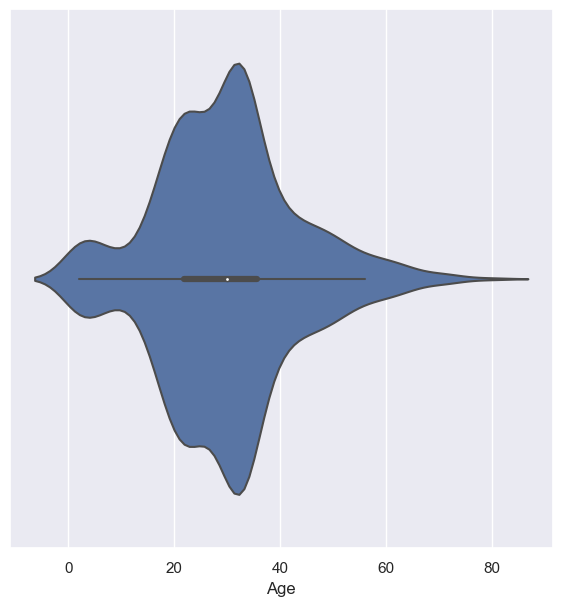

In [90]:
sns.set(rc={'figure.figsize':(7,7)})
sns.violinplot(x=X.Age)
plt.show()

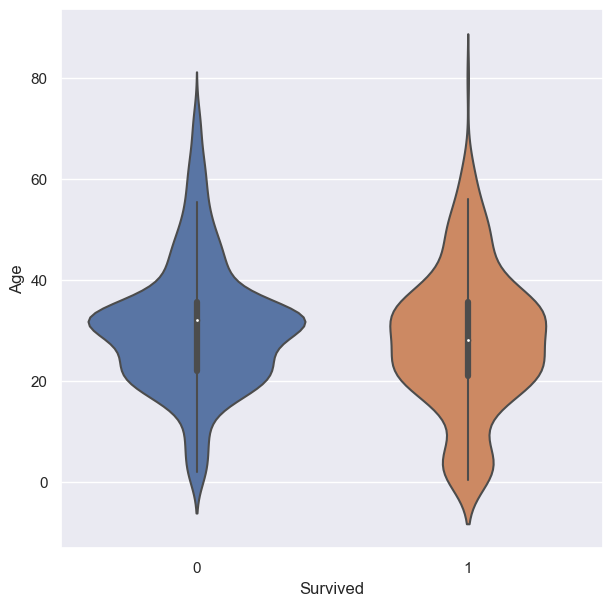

In [91]:
sns.violinplot(x="Survived", y="Age", data=X)
plt.show()

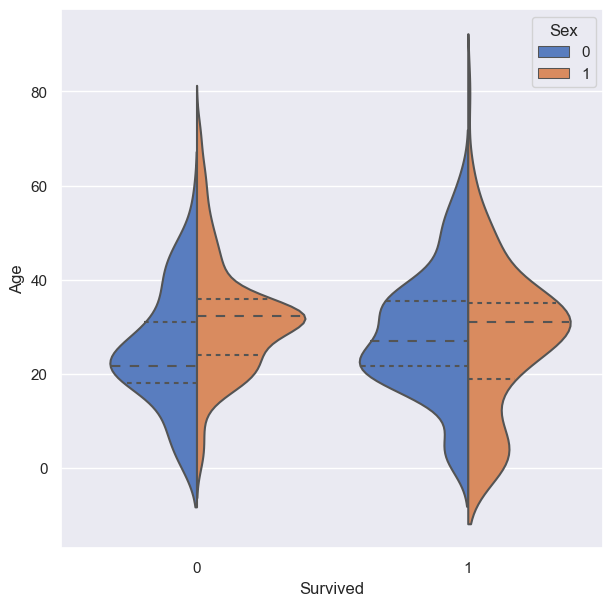

In [92]:
sns.violinplot(x="Survived", y="Age", hue="Sex", data=X, palette="muted", split=True, inner="quartile")
plt.show()

### Nepreklapajući raspršeni graf
Dokumentacija: https://seaborn.pydata.org/generated/seaborn.swarmplot.html#seaborn.swarmplot  
Pogledamo li raspršeni graf za značajke Age i Sex, vidimo jako mali broj točaka. To je zato što se velik broj točaka nalazi na istom mjestu i u takvim slučajevima možemo koristiti nepreklapajući raspršeni graf.

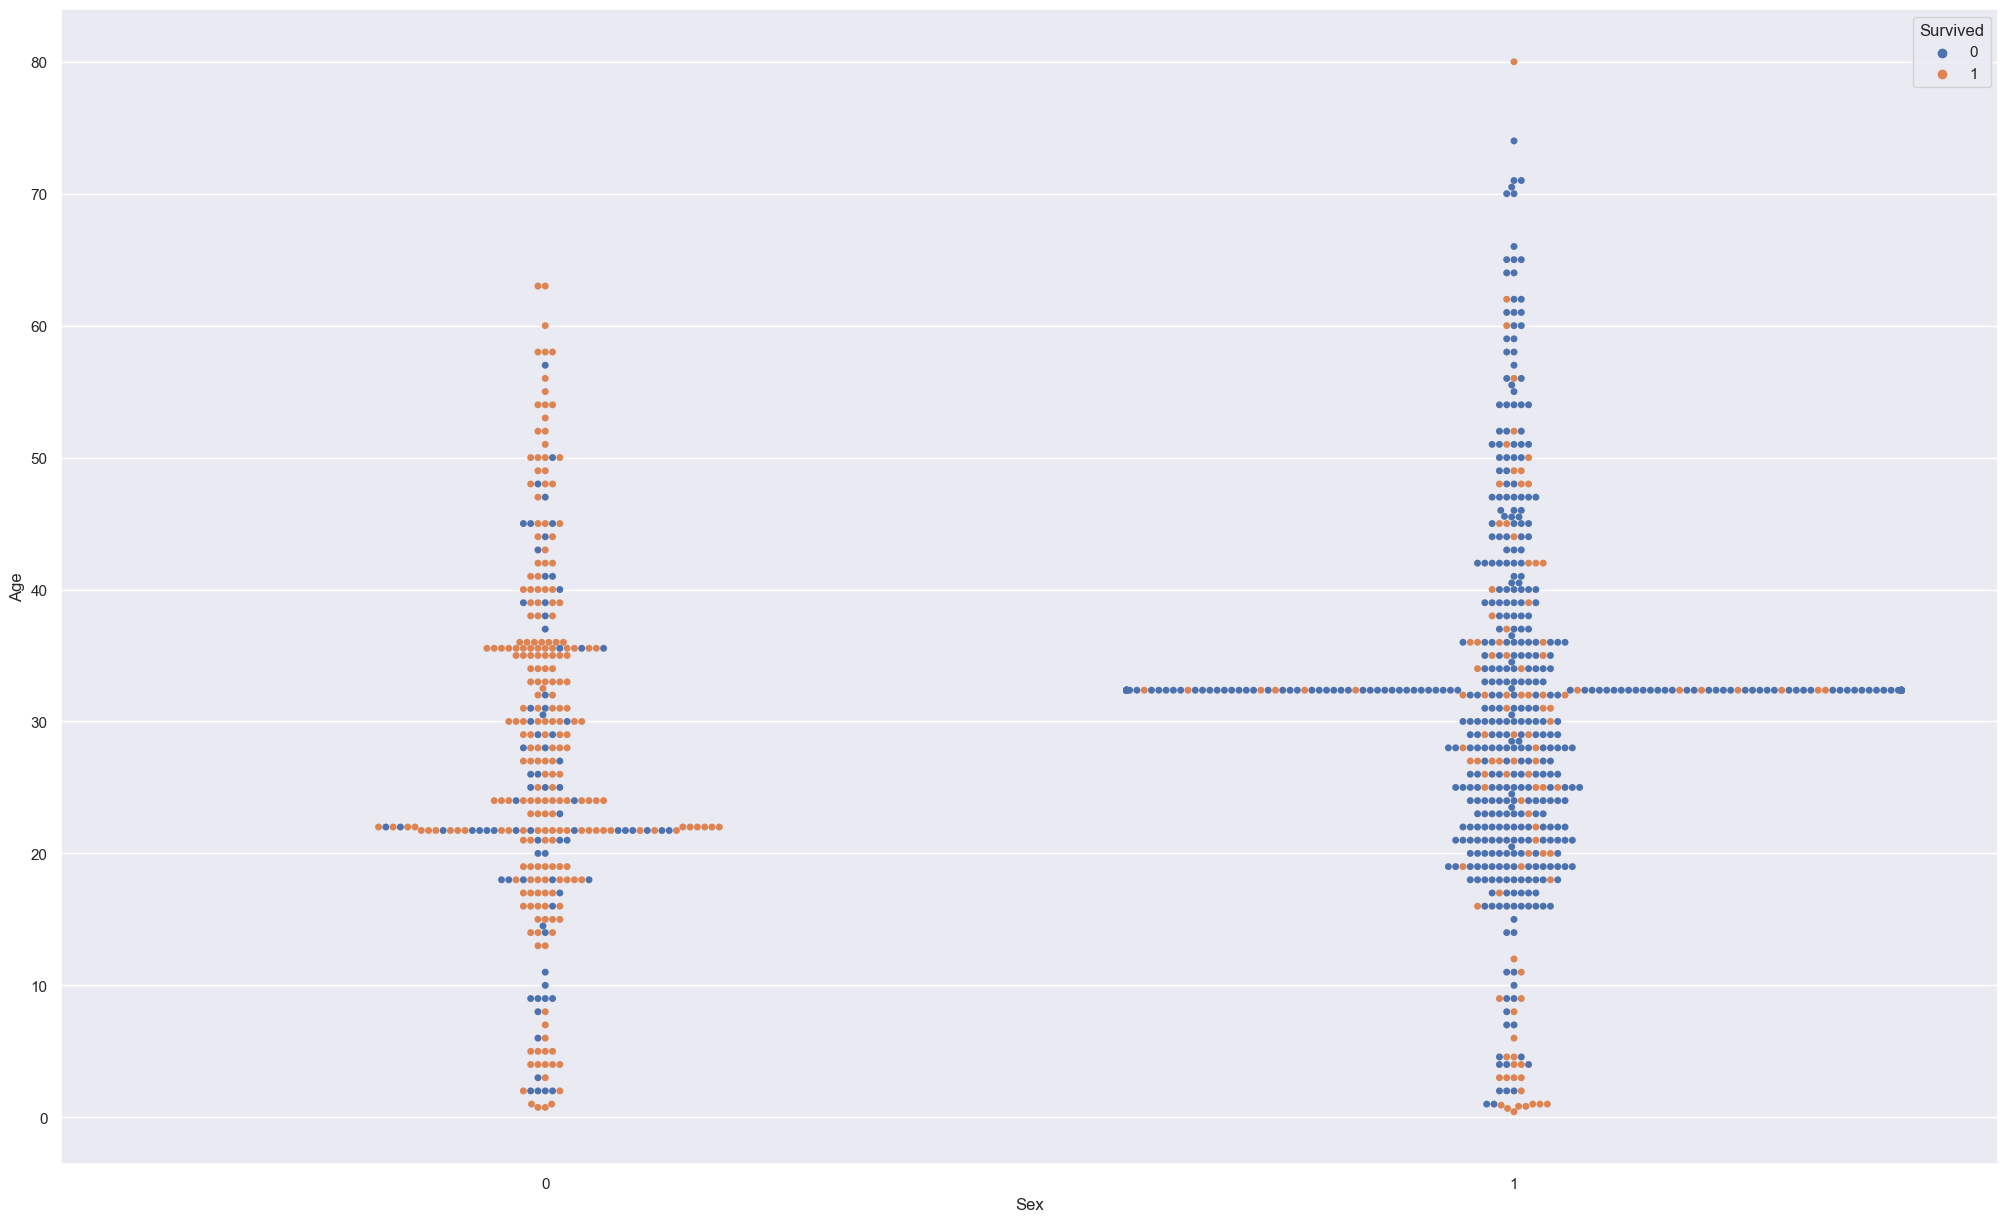

In [93]:
sns.set(rc={'figure.figsize':(25,15)})
sns.swarmplot(x='Sex', y="Age", data=X, hue="Survived")
plt.show()

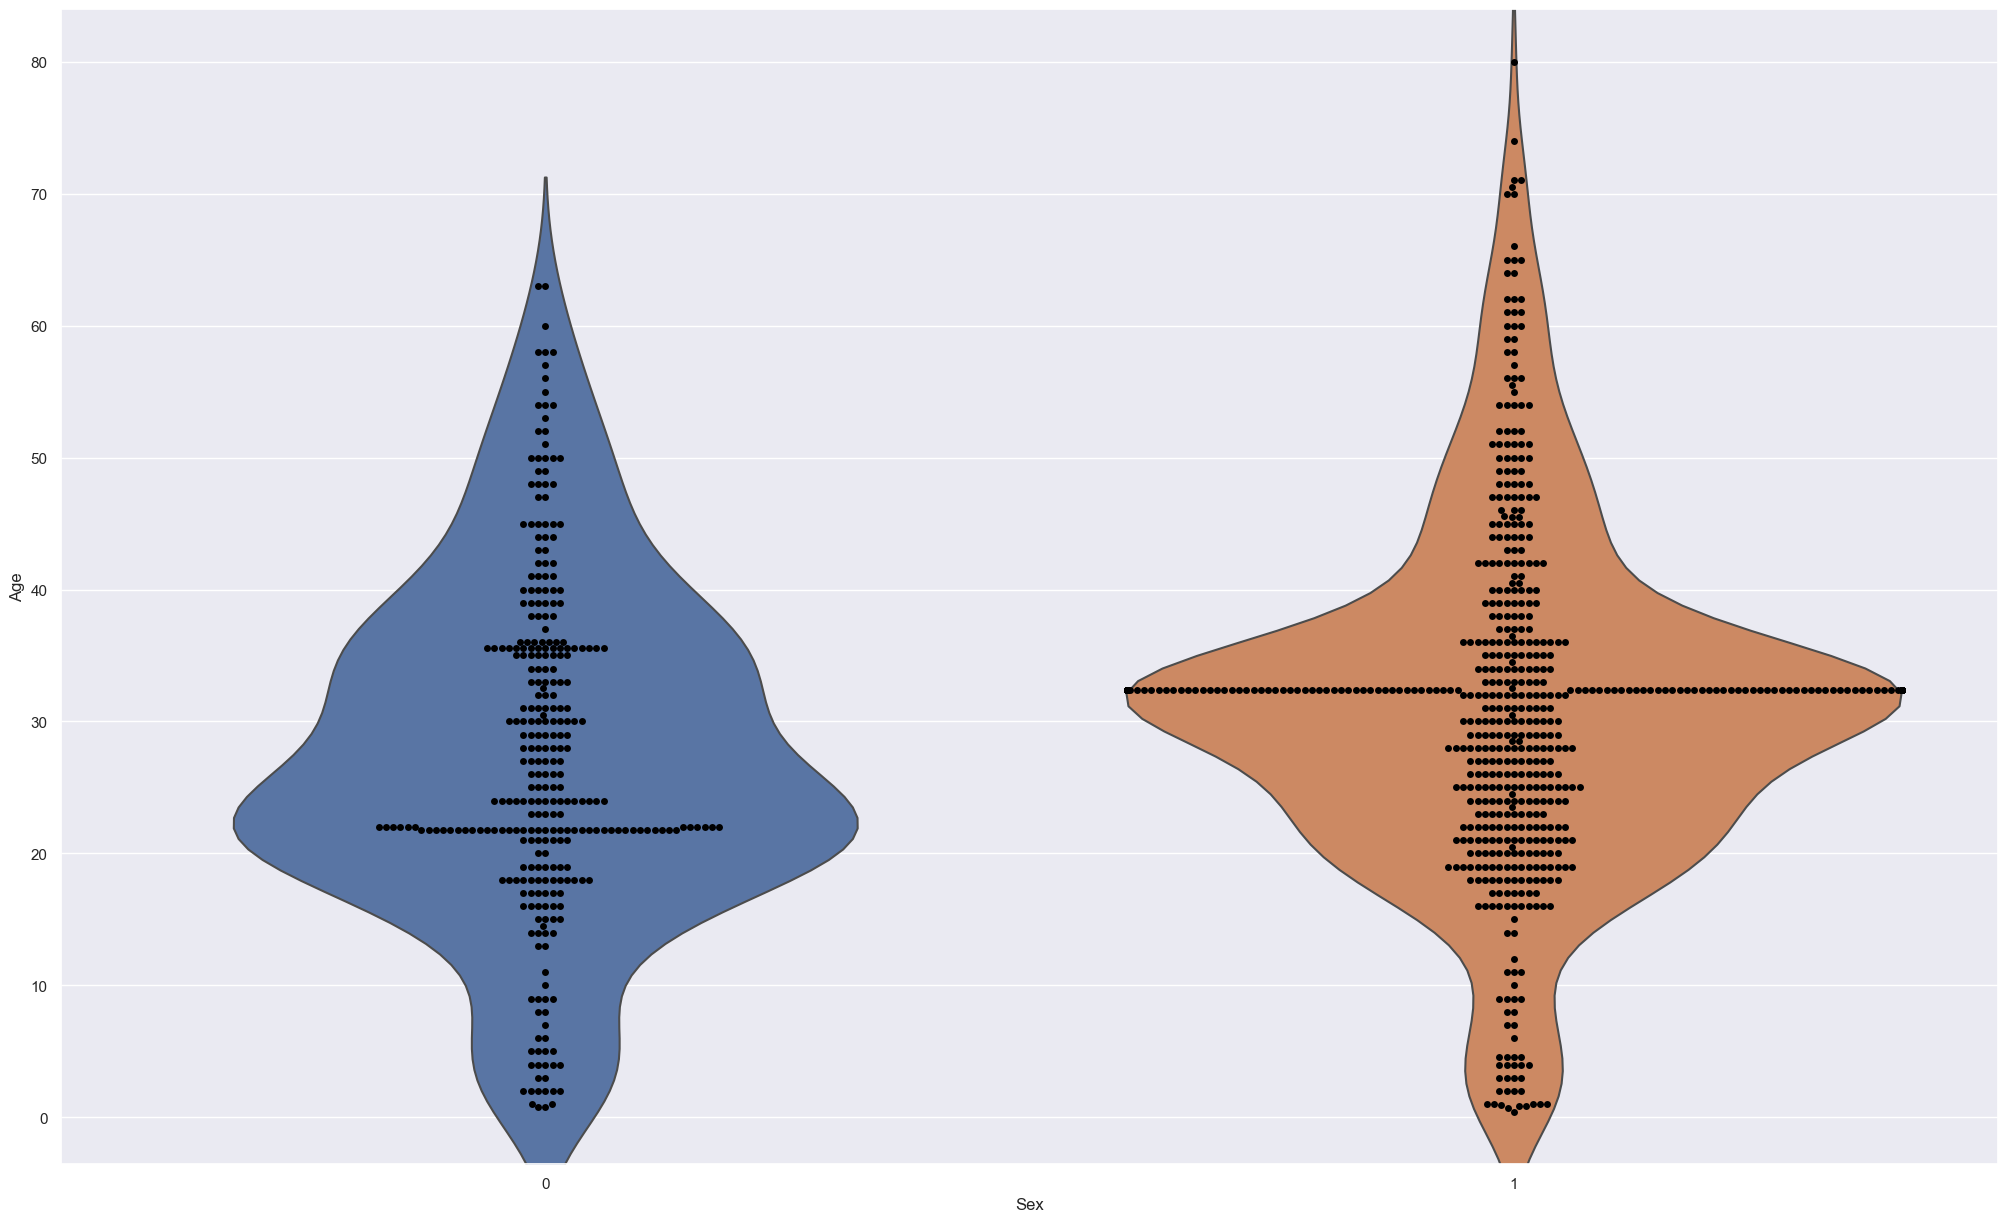

In [94]:
sns.violinplot(x="Sex", y="Age", data=X, inner=None)
sns.swarmplot(x='Sex', y="Age", data=X, color='black')
plt.show()

### Združeni dijagram
Dokumentacija: https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot

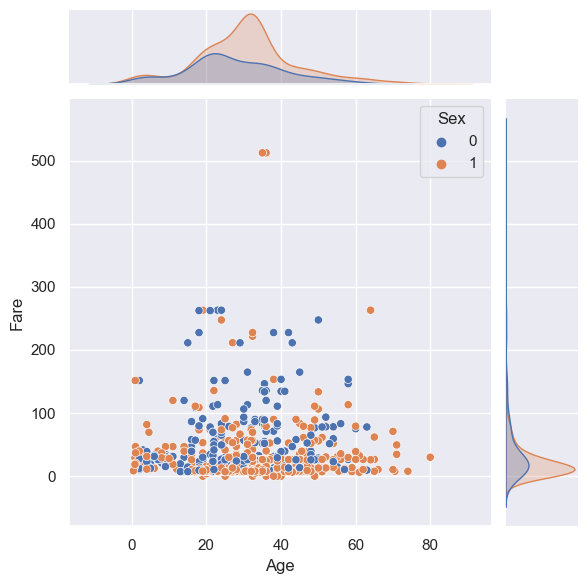

In [95]:
sns.jointplot(data=X, x="Age", y="Fare", hue="Sex")
plt.show()

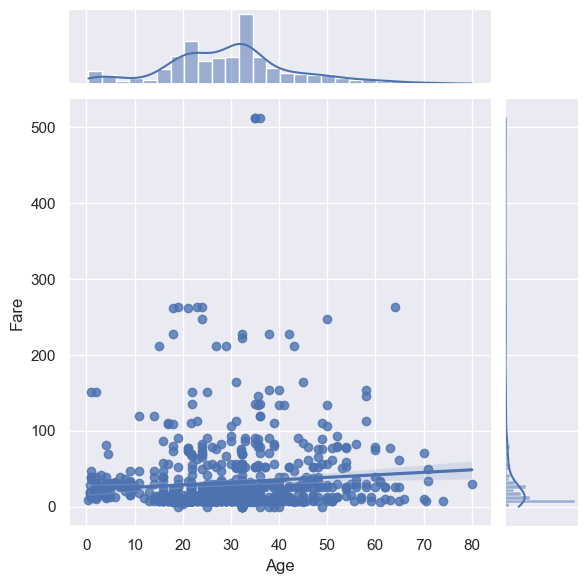

In [96]:
sns.jointplot(data=X, x="Age", y="Fare",kind="reg")
plt.show()

### Dodatni primjeri
https://seaborn.pydata.org/examples/index.html

# Plotly  
Plotly je biblioteka za izradu interaktivnih grafova visoke kvalitete.  
Dokumentacija: https://plotly.com/python/   
   
Preporuka je započeti rad s Plotlyem koristeći Plotly Express - sučelje visoke razine koje u pozadini koristi Plotly Graph Object. Plotly Express sadrži više od 30 funkcija za prikaz različitih grafova. Glavna prednost mu je jednostavnost i mala količina koda koja je potrebna za izrazito kvalitetne vizualizacije.

### Graf raspršenja  
Dokumentacija: https://plotly.com/python/line-and-scatter/  

In [97]:
X.Pclass.replace(1, "1.", inplace=True)
X.Pclass.replace(2, "2.", inplace=True)
X.Pclass.replace(3, "3.", inplace=True)

In [98]:
import plotly.express as px
fig = px.scatter(X, x="Age", y="Fare", color="Pclass")
fig.show()

In [99]:
fig = px.scatter(X, x="Age", y="Fare", color="Pclass", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()

ModuleNotFoundError: No module named 'statsmodels'

### Graf s paralelnim koordinatama  
Dokumentacija: https://plotly.com/python/parallel-coordinates-plot/ 

In [ ]:
X_tmp = X.loc[:, ['FamilySize', 'Age', 'Fare', 'Age*Pclass', 'Embarked']]
fig = px.parallel_coordinates(X_tmp, color="FamilySize", labels={"family_size": "FamilySize",
                  "age": "Age", "fare": "Fare",
                  "age_pclass": "Age*Pclass", "embarked": "Embarked", },
                    color_continuous_scale=px.colors.diverging.Tealrose, 
                    color_continuous_midpoint=1.5,
                    range_color=[0,11])
fig.show()

### Graf stablastog grananja  
Dokumentacija: https://plotly.com/python/treemaps/ 

In [ ]:
X.Embarked.replace(0, "C", inplace=True)
X.Embarked.replace(1, "S", inplace=True)
X.Embarked.replace(2, "P", inplace=True)

X_tmp = X.loc[:, ['Pclass', 'Embarked', 'Age']]

In [ ]:
fig = px.treemap(X_tmp, path=[px.Constant('Svi'), 'Embarked', 'Pclass'], values='Age', color='Age')
fig.show()

### Konture gustoće podataka  
Dokumentacija: https://plotly.com/python/2d-histogram-contour/ 

In [ ]:
fig = px.density_contour(X, x="Age", y="Fare", facet_col="Pclass", color="Sex", marginal_x="histogram")
fig.show()

### 3D raspršeni dijagram  
Dokumentacija: https://plotly.com/python/3d-scatter-plots/ 

In [ ]:
fig = px.scatter_3d(X, x='Age', y='Fare', z='Age*Pclass',
              color='Survived', opacity=0.5)
fig.show()

### Mape obojenih poligona  
Dokumentacija: https://plotly.com/python/choropleth-maps/ 

In [ ]:
df = px.data.gapminder()
fig = px.choropleth(df, locations="iso_alpha", color="lifeExp", hover_name="country", animation_frame="year", range_color=[20,80])
fig.show()